In [ ]:
from sklearn import datasets

In [ ]:
X, y = datasets.make_regression(n_samples=250, n_features=2, noise=20, random_state=0, bias=50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import numpy as np
o_train = np.ones([X_train.shape[0],1], X_train.dtype )
o_test = np.ones([X_test.shape[0], 1], X_test.dtype)
X_train = np.concatenate((o_train, X_train), axis=1)
X_test = np.concatenate((o_test, X_test), axis=1)

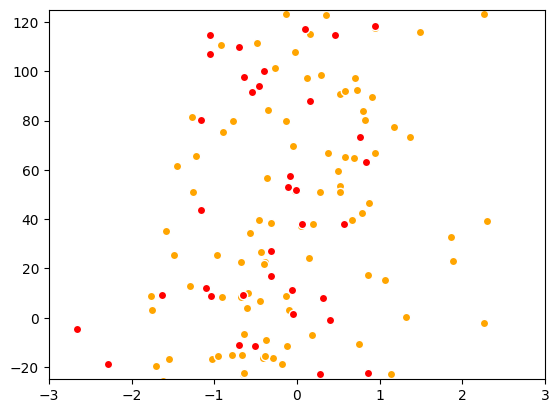

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,1], y_train, c='orange', edgecolors='white')
plt.scatter(X_test[:, 1], y_test, c='red', edgecolors='white')
plt.ylim((-25, 125))
plt.xlim((-3, 3))
plt.show()

In [ ]:
THETA = np.zeros([3, 1], dtype=np.float32)

In [ ]:
lr_sto = 0.01
lr_bat = 0.0001
# Epoch
Epoch = 200

In [ ]:
def hypothesis(x, θ):
  _hypothesis = np.matmul(θ.T, x)
  return _hypothesis

In [ ]:
def cost_function(h_x, y):
  J = 1/2*(h_x-y)*(h_x-y)
  return J

In [ ]:
def batch_UpdateWeights(θ, lr, gradient):
  θ = θ - lr*gradient
  return θ

In [ ]:
loss = 0

In [ ]:
loss=0
for i in range(Epoch):
  gradient = np.zeros([3, 1], dtype=np.float32)
  for x,y in zip(X_train, y_train):
    h_x = hypothesis(x,THETA)
    loss = cost_function(h_x, y)
    x = np.reshape(x, THETA.shape)
    gradient += (h_x-y)*x
  THETA = batch_UpdateWeights(THETA, lr_bat, gradient)
  print("[{0}/{1}], loss: {2}".format(i, Epoch, loss[0]/(y_train.shape[0])))

[0/200], loss: 63.434975496666176
[1/200], loss: 61.36262926914855
[2/200], loss: 59.35412953935838
[3/200], loss: 57.407575028650875
[4/200], loss: 55.52112189979171
[5/200], loss: 53.692977819604366
[6/200], loss: 51.92140361149147
[7/200], loss: 50.204712084818965
[8/200], loss: 48.541265612756625
[9/200], loss: 46.92947201060015
[10/200], loss: 45.36778791000159
[11/200], loss: 43.85471587392037
[12/200], loss: 42.388799851140476
[13/200], loss: 40.96862704010675
[14/200], loss: 39.59282974740585
[15/200], loss: 38.26007512155591
[16/200], loss: 36.9690734706565
[17/200], loss: 35.71856916590064
[18/200], loss: 34.5073464575127
[19/200], loss: 33.3342259871851
[20/200], loss: 32.198059612989795
[21/200], loss: 31.097736518022607
[22/200], loss: 30.03217609359171
[23/200], loss: 29.000331721016057
[24/200], loss: 28.001184565942623
[25/200], loss: 27.033750032823715
[26/200], loss: 26.097066287713943
[27/200], loss: 25.190207405214284
[28/200], loss: 24.312270610162397
[29/200], los

In [ ]:
print(THETA)

[[45.03227 ]
 [45.611538]
 [94.79559 ]]


In [ ]:
py = THETA[1,0] * X_test[:,1] + THETA[2,0]*X_test[:,2] + THETA[0,0]

In [ ]:
py

array([ 151.7070571 ,  -37.56325661,   -1.91304072, -176.89223441,
        309.44900679,  -72.14064307,  -40.18540968,  -42.85364814,
         83.04701565,   13.76266141,  -79.06504355,  117.25054709,
        176.20190033,  150.62722242, -165.59294634,  125.01385697,
         64.75583676,  293.342329  ,   41.54838984,  -61.80247568,
        199.63146619,  120.57476233,  200.06336155,  184.36497588,
        167.09439661,  118.69253582,   77.64656954,   63.05024646,
        286.36807976, -153.0094439 ,  -24.02276952,   52.34577417,
         37.38640366,   80.50107413,  107.04077602,  -21.77578092,
        -87.41022494,  -28.86142694,  -43.17719649,  194.34819461,
        136.67543942,   77.85288815,   62.31515738,   80.32314834,
         14.82083841,   -1.98364999,  -23.29299892,   83.67908544,
         62.14021316,  -63.47215855,  230.64423128,   62.22863465,
         68.78050998,   -1.70108024,  -39.52607305,  264.02451447,
        -22.07245339,  289.06232039,   77.66266614,  150.28424

In [ ]:
y_test

array([ 127.38567862,  -34.23729998,  -10.99034696, -186.12900387,
        296.1189587 ,  -67.64861517,  -40.93301997,  -39.41932905,
         52.86670774,    9.13264977,  -30.4420363 ,  114.81418192,
        184.48858361,  135.61312892, -155.03763261,  145.7824331 ,
          8.59985866,  301.58546752,   26.9754291 ,  -44.68061881,
        167.74160804,  127.75269965,  200.5040099 ,  173.28840519,
        134.96708108,  135.20669471,  107.04486763,   63.30613181,
        288.19367462, -133.96245241,    9.06810707,   38.2144518 ,
         17.09273743,   37.88925321,  109.75859182,  -11.38137144,
        -71.01479394,  -22.80138818,  -75.61088436,  157.98080083,
        131.02013306,   88.00137152,   51.92431607,   80.18301108,
        -22.59205596,   -0.91708735,    8.11015016,   97.7660966 ,
         91.67905788,  -71.49078357,  191.00558972,   57.40263976,
         43.57017193,   12.2198838 ,  -18.67868812,  313.37370199,
         -4.58523735,  235.69114565,  118.32970959,  149.66248

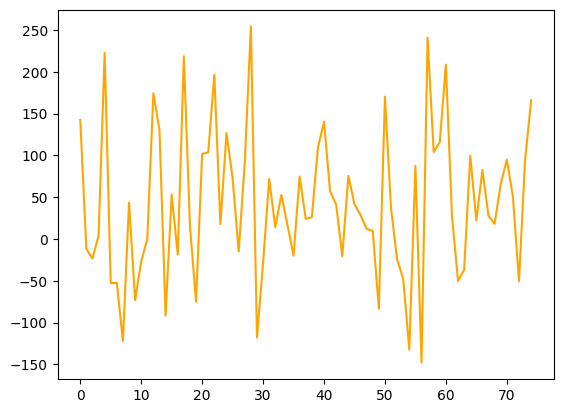

In [ ]:
plt.plot(py, c='orange')
plt.show()

In [ ]:
def update_parameters(THETA, h_x, x, y, lr):

	x = np.reshape(x, THETA.shape)
	THETA = THETA - lr *(h_x - y) *x
	return THETA

[1/200], loss: 47941.20586499881
[1/200], loss: 594.6089216760956
[1/200], loss: 8350.714842353924
[1/200], loss: 2378.2418569123174
[1/200], loss: 46.44580133004135
[1/200], loss: 2541.0227696543966
[1/200], loss: 30.583045610823774
[1/200], loss: 1279.9252093073003
[1/200], loss: 1059.1417679680078
[1/200], loss: 160.60453869737265
[1/200], loss: 37.93342749156628
[1/200], loss: 7740.922782822743
[1/200], loss: 88.79315379292997
[1/200], loss: 650.129897369006
[1/200], loss: 11398.916543966941
[1/200], loss: 236.86295008531678
[1/200], loss: 648.2738600692934
[1/200], loss: 4634.970689413328
[1/200], loss: 1767.7667265807584
[1/200], loss: 6042.611412105573
[1/200], loss: 2139.5709690536773
[1/200], loss: 229.69664865143932
[1/200], loss: 37.749336154653875
[1/200], loss: 181.88961068171392
[1/200], loss: 1823.5000345333685
[1/200], loss: 2627.7056680445744
[1/200], loss: 4667.715120683898
[1/200], loss: 12.51427184551533
[1/200], loss: 10166.049973142462
[1/200], loss: 3783.63281623

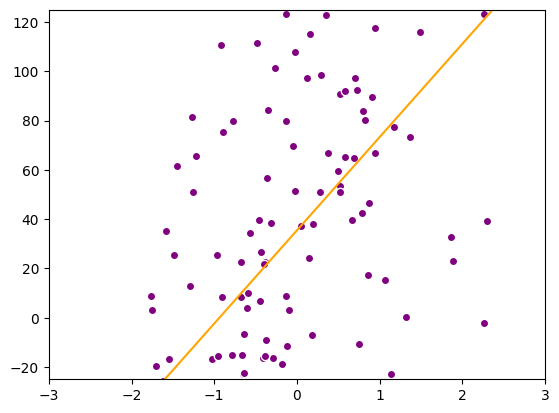

[2/200], loss: 1840.053754761844
[2/200], loss: 1.5883065403369778
[2/200], loss: 1045.1026473235502
[2/200], loss: 46.200010782297376
[2/200], loss: 77.45309547342612
[2/200], loss: 887.900156847712
[2/200], loss: 341.40701025485356
[2/200], loss: 210.2497418079173
[2/200], loss: 186.8565184750829
[2/200], loss: 0.3956782012628744
[2/200], loss: 357.15650403108054
[2/200], loss: 495.44318084554016
[2/200], loss: 89.15092375780908
[2/200], loss: 103.00651547640165
[2/200], loss: 1259.880705460724
[2/200], loss: 8.636148526961753
[2/200], loss: 482.5281397753947
[2/200], loss: 651.8587261872291
[2/200], loss: 112.15121340886505
[2/200], loss: 360.56421662206776
[2/200], loss: 873.1751916728538
[2/200], loss: 24.115934986471235
[2/200], loss: 173.37271819577776
[2/200], loss: 47.070480272067876
[2/200], loss: 559.0476664910607
[2/200], loss: 777.8647089752991
[2/200], loss: 807.4664425467537
[2/200], loss: 1.2131798115862957
[2/200], loss: 451.2167753227965
[2/200], loss: 8.0240701077697

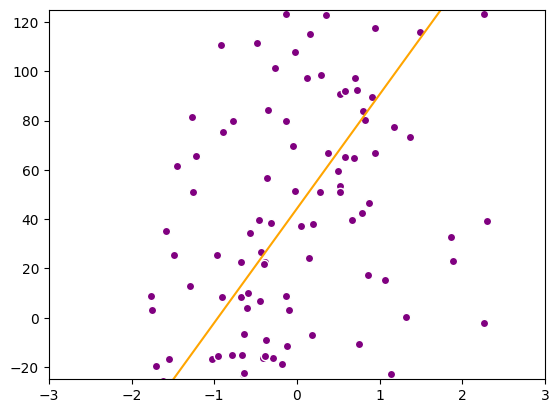

[3/200], loss: 17.776917470746312
[3/200], loss: 58.8822375436645
[3/200], loss: 346.5609530339112
[3/200], loss: 11.340535350737047
[3/200], loss: 78.94998778313973
[3/200], loss: 616.655310613833
[3/200], loss: 423.1913194869362
[3/200], loss: 85.48223722165882
[3/200], loss: 505.07735303006456
[3/200], loss: 2.478771732940964
[3/200], loss: 644.5782839433928
[3/200], loss: 78.97253538916151
[3/200], loss: 167.9383400928157
[3/200], loss: 34.57841991708231
[3/200], loss: 383.00941852391605
[3/200], loss: 2.00889131046081
[3/200], loss: 422.01848853749897
[3/200], loss: 247.05497265241942
[3/200], loss: 9.94049124074555
[3/200], loss: 52.39996412240748
[3/200], loss: 725.6158846909981
[3/200], loss: 3.8761504688659194
[3/200], loss: 237.8479225445094
[3/200], loss: 139.01847243375448
[3/200], loss: 413.90611271957965
[3/200], loss: 494.930706903362
[3/200], loss: 373.9612928085012
[3/200], loss: 6.8025030700454
[3/200], loss: 11.648092061071802
[3/200], loss: 259.3260023406698
[3/200]

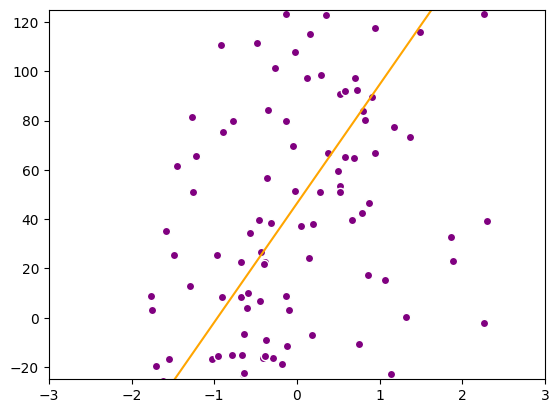

[4/200], loss: 18.486889385243543
[4/200], loss: 84.8357158249629
[4/200], loss: 239.4822969111581
[4/200], loss: 33.217399254459515
[4/200], loss: 78.50933309284818
[4/200], loss: 560.5805791256273
[4/200], loss: 437.50598690180556
[4/200], loss: 63.9882822539413
[4/200], loss: 585.2018237093758
[4/200], loss: 3.9945282545672867
[4/200], loss: 727.9985584339634
[4/200], loss: 37.352240491471605
[4/200], loss: 186.0159628625273
[4/200], loss: 22.971733449920997
[4/200], loss: 256.8212665407679
[4/200], loss: 1.6513009539477403
[4/200], loss: 405.0845712797079
[4/200], loss: 181.83531092555222
[4/200], loss: 2.052138416843198
[4/200], loss: 23.424711757117834
[4/200], loss: 704.2278049895335
[4/200], loss: 1.4637298258749036
[4/200], loss: 257.0818095602815
[4/200], loss: 167.59930321996558
[4/200], loss: 390.57387412265666
[4/200], loss: 437.85002522395513
[4/200], loss: 299.0896756967737
[4/200], loss: 9.084815802662689
[4/200], loss: 0.3229955450527614
[4/200], loss: 356.793123935373

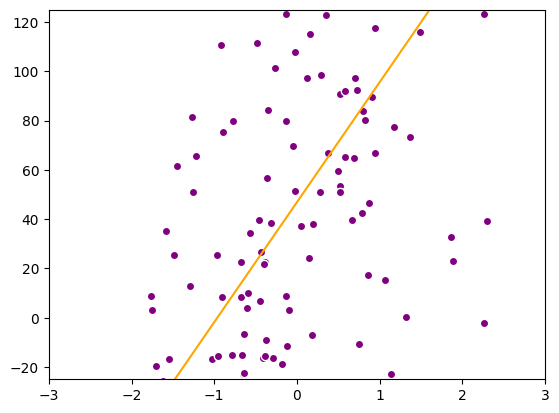

[5/200], loss: 38.15976361205867
[5/200], loss: 91.57912698474831
[5/200], loss: 217.93210973233005
[5/200], loss: 39.917805899625634
[5/200], loss: 78.32199146780174
[5/200], loss: 548.1529951293468
[5/200], loss: 439.9377974691575
[5/200], loss: 59.45282519386135
[5/200], loss: 601.8807684395949
[5/200], loss: 4.342454347936081
[5/200], loss: 748.5636895503987
[5/200], loss: 30.543229028566575
[5/200], loss: 189.7311267810116
[5/200], loss: 20.510603806226978
[5/200], loss: 232.20444768945228
[5/200], loss: 1.6628810002250551
[5/200], loss: 400.7477947714436
[5/200], loss: 168.50091624844026
[5/200], loss: 1.0818688032116264
[5/200], loss: 18.848773891427797
[5/200], loss: 701.08534340119
[5/200], loss: 1.0497959347105386
[5/200], loss: 262.0236732084621
[5/200], loss: 174.5433716015557
[5/200], loss: 386.4464299615373
[5/200], loss: 425.2173901467573
[5/200], loss: 283.4830603626719
[5/200], loss: 9.70290314154775
[5/200], loss: 2.1177839694378857
[5/200], loss: 379.5314102586398
[5

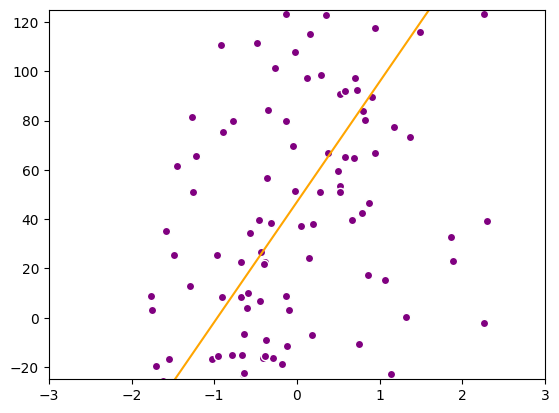

[6/200], loss: 43.45216945006649
[6/200], loss: 93.16489035358666
[6/200], loss: 213.21544605646383
[6/200], loss: 41.53595257380206
[6/200], loss: 78.27095336793083
[6/200], loss: 545.3679489532609
[6/200], loss: 440.35754470115927
[6/200], loss: 58.441174655858674
[6/200], loss: 605.3015861425324
[6/200], loss: 4.41647848924444
[6/200], loss: 753.3887400434313
[6/200], loss: 29.178582893497712
[6/200], loss: 190.49593687381875
[6/200], loss: 19.95061437195341
[6/200], loss: 226.9124013475572
[6/200], loss: 1.6798728452012552
[6/200], loss: 399.6912633072318
[6/200], loss: 165.57992025415965
[6/200], loss: 0.9052515804578818
[6/200], loss: 17.947698570628653
[6/200], loss: 700.6448098152034
[6/200], loss: 0.9620060215930589
[6/200], loss: 263.2180557699
[6/200], loss: 176.13876447719565
[6/200], loss: 385.6890815536775
[6/200], loss: 422.3726926570916
[6/200], loss: 280.06236596594886
[6/200], loss: 9.852987135750153
[6/200], loss: 2.7307818454843673
[6/200], loss: 384.510993727302
[6

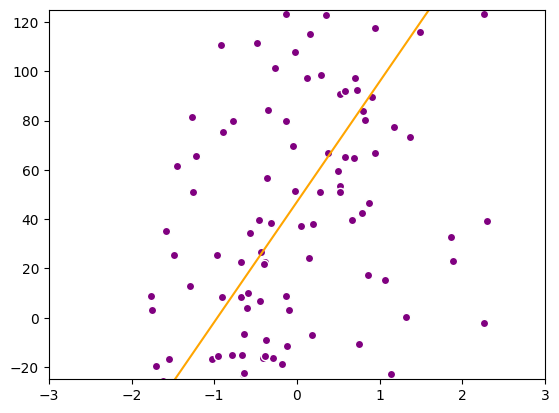

[7/200], loss: 44.66755647316345
[7/200], loss: 93.52711736822503
[7/200], loss: 212.16465550507377
[7/200], loss: 41.907090750836815
[7/200], loss: 78.25880930309943
[7/200], loss: 544.7449672722922
[7/200], loss: 440.4318376882101
[7/200], loss: 58.21373538844554
[7/200], loss: 606.0106933999149
[7/200], loss: 4.432280002935464
[7/200], loss: 754.4974844764594
[7/200], loss: 28.88865821536816
[7/200], loss: 190.6558904404382
[7/200], loss: 19.822160578734213
[7/200], loss: 225.74789178824827
[7/200], loss: 1.6860315360913742
[7/200], loss: 399.4418490831258
[7/200], loss: 164.93087577927054
[7/200], loss: 0.8677474514486371
[7/200], loss: 17.75843225379683
[7/200], loss: 700.5889925575146
[7/200], loss: 0.9422262262821487
[7/200], loss: 263.49798550570694
[7/200], loss: 176.4988947433939
[7/200], loss: 385.54643395558327
[7/200], loss: 421.7327673691943
[7/200], loss: 279.3048472189952
[7/200], loss: 9.88798001181119
[7/200], loss: 2.877494745432935
[7/200], loss: 385.59399864540427


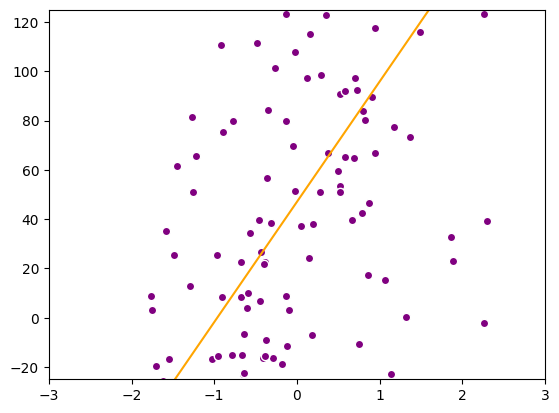

[8/200], loss: 44.93843207065502
[8/200], loss: 93.60890065394682
[8/200], loss: 211.9301656742082
[8/200], loss: 41.99088782557411
[8/200], loss: 78.25608431479543
[8/200], loss: 544.6060682012082
[8/200], loss: 440.4453591781039
[8/200], loss: 58.16272278856418
[8/200], loss: 606.1596461484164
[8/200], loss: 4.435692273717695
[8/200], loss: 754.7493693696211
[8/200], loss: 28.825944714131417
[8/200], loss: 190.68983954006805
[8/200], loss: 19.79287771306808
[8/200], loss: 225.49036946783704
[8/200], loss: 1.6877894065294903
[8/200], loss: 399.3841587135693
[8/200], loss: 164.78645359489335
[8/200], loss: 0.8594688673299109
[8/200], loss: 17.717842272687122
[8/200], loss: 700.5834708905251
[8/200], loss: 0.9377366454673194
[8/200], loss: 263.5624199997008
[8/200], loss: 176.57958151377724
[8/200], loss: 385.5189089061626
[8/200], loss: 421.58936583995336
[8/200], loss: 279.13687415642767
[8/200], loss: 9.895983106090654
[8/200], loss: 2.9105707267706995
[8/200], loss: 385.830159393475

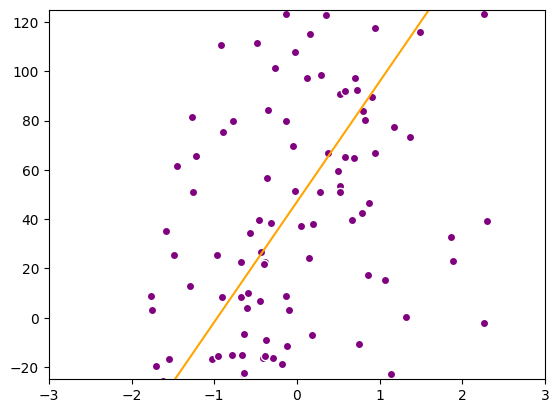

[9/200], loss: 44.99843162262546
[9/200], loss: 93.62725122472425
[9/200], loss: 211.87791162194074
[9/200], loss: 42.00968169165845
[9/200], loss: 78.25548947721063
[9/200], loss: 544.5751782734798
[9/200], loss: 440.44789156748413
[9/200], loss: 58.151320375290474
[9/200], loss: 606.1913020057265
[9/200], loss: 4.4364359944276845
[9/200], loss: 754.806173171103
[9/200], loss: 28.81227540224932
[9/200], loss: 190.6971282062816
[9/200], loss: 19.78625101457432
[9/200], loss: 225.433369488546
[9/200], loss: 1.688243303973892
[9/200], loss: 399.37099341612844
[9/200], loss: 164.75434889749076
[9/200], loss: 0.8576284427130048
[9/200], loss: 17.70905400605018
[9/200], loss: 700.5833687153096
[9/200], loss: 0.9367219034169256
[9/200], loss: 263.57707990338724
[9/200], loss: 176.59758596887679
[9/200], loss: 385.5134748522193
[9/200], loss: 421.5573397278639
[9/200], loss: 279.09964108593306
[9/200], loss: 9.897793559798435
[9/200], loss: 2.917930790244685
[9/200], loss: 385.8818394296419
[

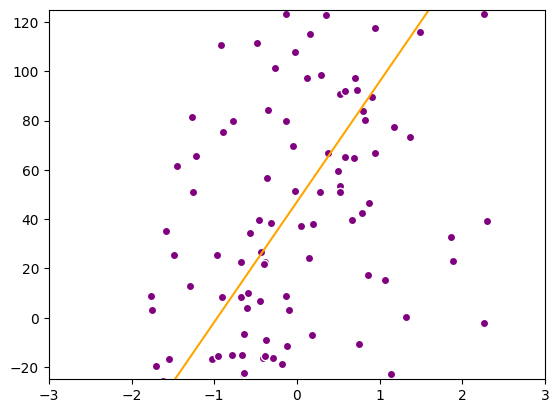

[10/200], loss: 45.01170615323713
[10/200], loss: 93.63135249541621
[10/200], loss: 211.86628625382778
[10/200], loss: 42.01388068731301
[10/200], loss: 78.25536120680499
[10/200], loss: 544.5683204764035
[10/200], loss: 440.4483792524416
[10/200], loss: 58.148778796891655
[10/200], loss: 606.1980937905903
[10/200], loss: 4.436599097905737
[10/200], loss: 754.818918000458
[10/200], loss: 28.80928286834115
[10/200], loss: 190.69870640111142
[10/200], loss: 19.784760221508105
[10/200], loss: 225.42075224039638
[10/200], loss: 1.688354409346029
[10/200], loss: 399.3680162167392
[10/200], loss: 164.74722020038587
[10/200], loss: 0.8572192230898718
[10/200], loss: 17.707139991171438
[10/200], loss: 700.5835296402278
[10/200], loss: 0.9364937458425342
[10/200], loss: 263.5803890105513
[10/200], loss: 176.60159326960888
[10/200], loss: 385.5123792837639
[10/200], loss: 421.5502054467133
[10/200], loss: 279.0913920718497
[10/200], loss: 9.898200310192019
[10/200], loss: 2.919563273820737
[10/2

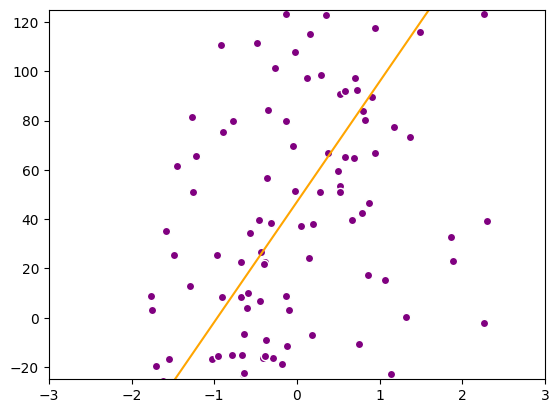

[11/200], loss: 45.014642696709934
[11/200], loss: 93.63226662053633
[11/200], loss: 211.86370332239352
[11/200], loss: 42.01481644544774
[11/200], loss: 78.25533365737378
[11/200], loss: 544.5667997045484
[11/200], loss: 440.4484756320666
[11/200], loss: 58.14821343758761
[11/200], loss: 606.1995619218353
[11/200], loss: 4.436635006744301
[11/200], loss: 754.8217670566468
[11/200], loss: 28.80862578817139
[11/200], loss: 190.69905023856214
[11/200], loss: 19.784426310656823
[11/200], loss: 225.41795951975632
[11/200], loss: 1.6883807477510084
[11/200], loss: 399.36734714678363
[11/200], loss: 164.7456387380289
[11/200], loss: 0.8571283222489215
[11/200], loss: 17.706721396155956
[11/200], loss: 700.583595330537
[11/200], loss: 0.9364426627581856
[11/200], loss: 263.58113184976963
[11/200], loss: 176.60248366932103
[11/200], loss: 385.5121542642458
[11/200], loss: 421.5486190925397
[11/200], loss: 279.08956518534296
[11/200], loss: 9.898291277795826
[11/200], loss: 2.919925008772443
[1

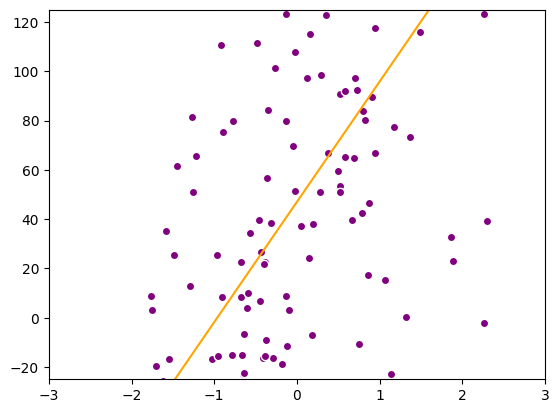

[12/200], loss: 45.015292352835374
[12/200], loss: 93.63246997450237
[12/200], loss: 211.86313002792818
[12/200], loss: 42.01502460085227
[12/200], loss: 78.2553277379494
[12/200], loss: 544.5664627051132
[12/200], loss: 440.44849512201444
[12/200], loss: 58.14808785928141
[12/200], loss: 606.199881122039
[12/200], loss: 4.436642931037553
[12/200], loss: 754.8224022605676
[12/200], loss: 28.80848120529009
[12/200], loss: 190.69912548265762
[12/200], loss: 19.7843517601412
[12/200], loss: 225.41734141196494
[12/200], loss: 1.688386863991002
[12/200], loss: 399.3671974393933
[12/200], loss: 164.7452881331279
[12/200], loss: 0.8571081494724062
[12/200], loss: 17.70662956871842
[12/200], loss: 700.5836147961905
[12/200], loss: 0.9364312614439353
[12/200], loss: 263.58129795356024
[12/200], loss: 176.60268127991486
[12/200], loss: 385.51210730870827
[12/200], loss: 421.5482668186606
[12/200], loss: 279.08916069254934
[12/200], loss: 9.898311559099888
[12/200], loss: 2.9200051308774038
[12/2

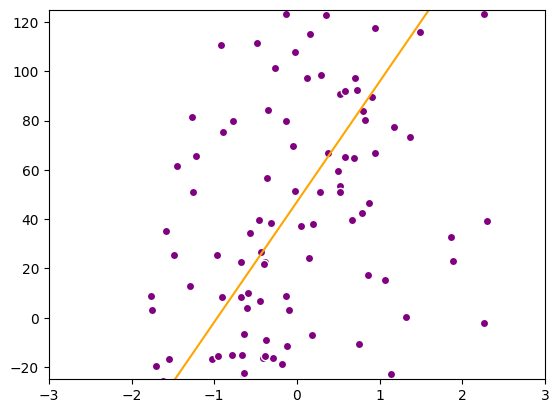

[13/200], loss: 45.015436089444535
[13/200], loss: 93.63251514906608
[13/200], loss: 211.86300287868286
[13/200], loss: 42.01507084228066
[13/200], loss: 78.2553264626791
[13/200], loss: 544.566388061534
[13/200], loss: 440.4484991413382
[13/200], loss: 58.148059994434206
[13/200], loss: 606.1999508307379
[13/200], loss: 4.4366446821827346
[13/200], loss: 754.8225436055935
[13/200], loss: 28.808449342516322
[13/200], loss: 190.69914200116332
[13/200], loss: 19.784335154522616
[13/200], loss: 225.41720461282853
[13/200], loss: 1.6883882647302129
[13/200], loss: 399.3671640444623
[13/200], loss: 164.74521044266848
[13/200], loss: 0.8571036760280799
[13/200], loss: 17.706609378607258
[13/200], loss: 700.5836199113969
[13/200], loss: 0.9364287225803113
[13/200], loss: 263.5813349914456
[13/200], loss: 176.60272510082888
[13/200], loss: 385.5120973808426
[13/200], loss: 421.54818866442884
[13/200], loss: 279.0890711481998
[13/200], loss: 9.89831607112335
[13/200], loss: 2.9200228732265225
[

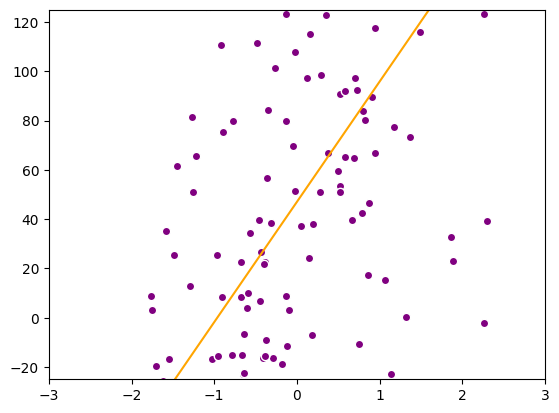

[14/200], loss: 45.015467893406765
[14/200], loss: 93.63252517432635
[14/200], loss: 211.86297469445813
[14/200], loss: 42.015081104634916
[14/200], loss: 78.25532618694098
[14/200], loss: 544.5663715333092
[14/200], loss: 440.4484999837403
[14/200], loss: 58.1480538159816
[14/200], loss: 606.19996610537
[14/200], loss: 4.436645069466083
[14/200], loss: 754.8225750126618
[14/200], loss: 28.808442312788323
[14/200], loss: 190.69914563574602
[14/200], loss: 19.784331462049888
[14/200], loss: 225.41717433729067
[14/200], loss: 1.6883885824644063
[14/200], loss: 399.36715661139306
[14/200], loss: 164.74519323324125
[14/200], loss: 0.8571026845544236
[14/200], loss: 17.706604931892414
[14/200], loss: 700.583621175672
[14/200], loss: 0.93642815816014
[14/200], loss: 263.58134323345837
[14/200], loss: 176.60273481272023
[14/200], loss: 385.5120952594135
[14/200], loss: 421.54817133712453
[14/200], loss: 279.0890513274823
[14/200], loss: 9.89831707341523
[14/200], loss: 2.9200268014866126
[14/

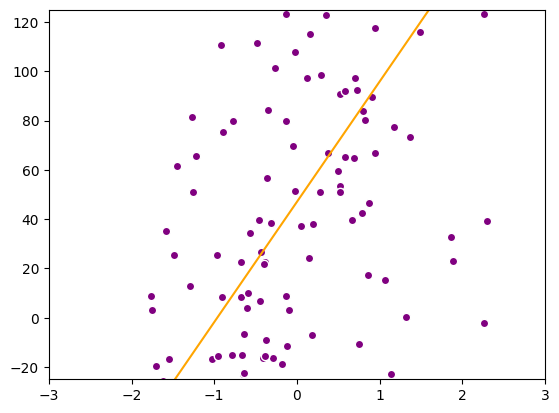

[15/200], loss: 45.01547493089219
[15/200], loss: 93.63252739751817
[15/200], loss: 211.8629684496657
[15/200], loss: 42.015083380500826
[15/200], loss: 78.25532612709442
[15/200], loss: 544.5663678741913
[15/200], loss: 440.448500162603
[15/200], loss: 58.148052446757454
[15/200], loss: 606.1999694608454
[15/200], loss: 4.4366451551555395
[15/200], loss: 754.8225819840234
[15/200], loss: 28.808440760577373
[15/200], loss: 190.6991464367659
[15/200], loss: 19.784330642008356
[15/200], loss: 225.4171676369917
[15/200], loss: 1.6883886540512998
[15/200], loss: 399.3671549595265
[15/200], loss: 164.74518942209104
[15/200], loss: 0.8571024648962593
[15/200], loss: 17.706603951308185
[15/200], loss: 700.5836214771284
[15/200], loss: 0.9364280328342438
[15/200], loss: 263.5813450648526
[15/200], loss: 176.60273696426253
[15/200], loss: 385.5120948022825
[15/200], loss: 421.54816749742304
[15/200], loss: 279.0890469404518
[15/200], loss: 9.89831729582646
[15/200], loss: 2.9200276711259425
[15

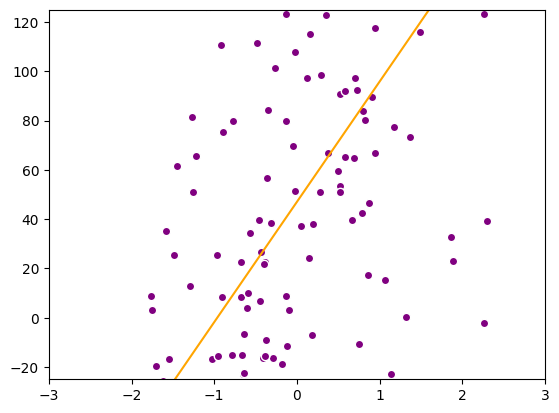

[16/200], loss: 45.015476488183374
[16/200], loss: 93.63252789026488
[16/200], loss: 211.86296706643017
[16/200], loss: 42.015083884943934
[16/200], loss: 78.25532611405824
[16/200], loss: 544.5663670642141
[16/200], loss: 440.4485002009678
[16/200], loss: 58.148052143434406
[16/200], loss: 606.1999701993622
[16/200], loss: 4.43664517411924
[16/200], loss: 754.8225835302397
[16/200], loss: 28.808440417632326
[16/200], loss: 190.699146613506
[16/200], loss: 19.78433046005729
[16/200], loss: 225.4171661541561
[16/200], loss: 1.6883886701022486
[16/200], loss: 399.3671545928435
[16/200], loss: 164.7451885782387
[16/200], loss: 0.857102416245751
[16/200], loss: 17.706603734869837
[16/200], loss: 700.5836215473901
[16/200], loss: 0.9364280050309627
[16/200], loss: 263.5813454713562
[16/200], loss: 176.60273744077102
[16/200], loss: 385.5120947031344
[16/200], loss: 421.5481666468529
[16/200], loss: 279.0890459694889
[16/200], loss: 9.898317345143042
[16/200], loss: 2.920027863630575
[16/200

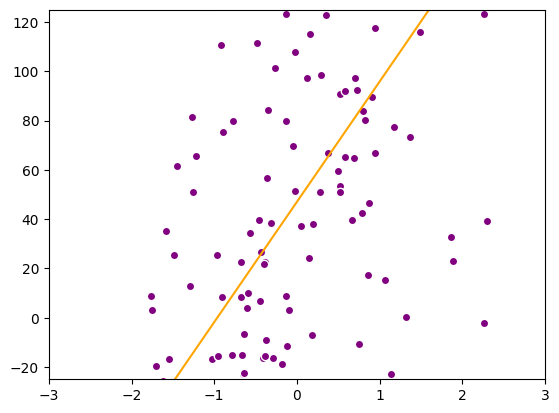

[17/200], loss: 45.015476832800516
[17/200], loss: 93.63252799943359
[17/200], loss: 211.86296676010988
[17/200], loss: 42.01508399670843
[17/200], loss: 78.2553261112098
[17/200], loss: 544.5663668849323
[17/200], loss: 440.44850020926293
[17/200], loss: 58.148052076257756
[17/200], loss: 606.1999703621401
[17/200], loss: 4.436645178316578
[17/200], loss: 754.8225838729861
[17/200], loss: 28.80844034182777
[17/200], loss: 190.69914665253597
[17/200], loss: 19.784330419713463
[17/200], loss: 225.41716582599108
[17/200], loss: 1.6883886736883371
[17/200], loss: 399.36715451151406
[17/200], loss: 164.74518839141967
[17/200], loss: 0.8571024054727644
[17/200], loss: 17.70660368706297
[17/200], loss: 700.583621563517
[17/200], loss: 0.9364279988668872
[17/200], loss: 263.581345561514
[17/200], loss: 176.60273754628318
[17/200], loss: 385.5120946815195
[17/200], loss: 421.5481664584826
[17/200], loss: 279.08904575459474
[17/200], loss: 9.8983173560724
[17/200], loss: 2.9200279062411982
[17/

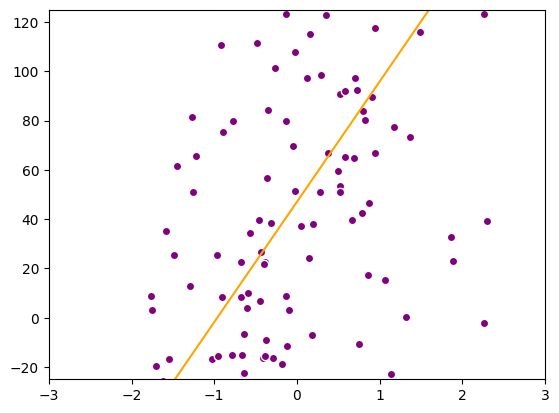

[18/200], loss: 45.0154769090634
[18/200], loss: 93.63252802361318
[18/200], loss: 211.86296669228597
[18/200], loss: 42.01508402146352
[18/200], loss: 78.25532611058523
[18/200], loss: 544.5663668452517
[18/200], loss: 440.448500211067
[18/200], loss: 58.148052061383154
[18/200], loss: 606.1999703980563
[18/200], loss: 4.436645179245604
[18/200], loss: 754.8225839489298
[18/200], loss: 28.808440325066606
[18/200], loss: 190.69914666116009
[18/200], loss: 19.784330410772533
[18/200], loss: 225.41716575336537
[18/200], loss: 1.6883886744876047
[18/200], loss: 399.3671544934856
[18/200], loss: 164.74518835006404
[18/200], loss: 0.8571024030875949
[18/200], loss: 17.706603676498222
[18/200], loss: 700.583621567181
[18/200], loss: 0.9364279975009164
[18/200], loss: 263.5813455814989
[18/200], loss: 176.60273756964332
[18/200], loss: 385.5120946767897
[18/200], loss: 421.5481664167729
[18/200], loss: 279.0890457070345
[18/200], loss: 9.898317358493689
[18/200], loss: 2.9200279156724718
[18/

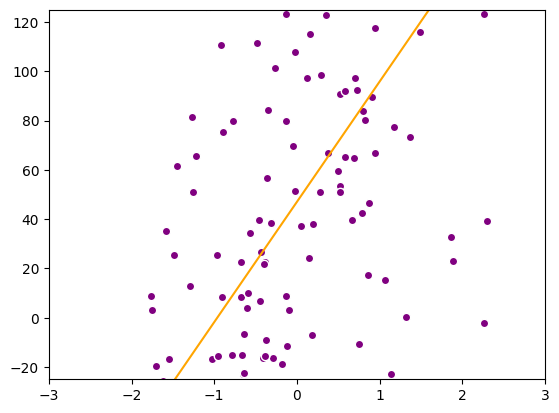

[19/200], loss: 45.01547692593934
[19/200], loss: 93.63252802896767
[19/200], loss: 211.86296667727095
[19/200], loss: 42.01508402694559
[19/200], loss: 78.25532611044754
[19/200], loss: 544.5663668364687
[19/200], loss: 440.4485002114593
[19/200], loss: 58.14805205808957
[19/200], loss: 606.1999704059838
[19/200], loss: 4.436645179451017
[19/200], loss: 754.8225839657528
[19/200], loss: 28.808440321360564
[19/200], loss: 190.69914666306505
[19/200], loss: 19.784330408791572
[19/200], loss: 225.41716573729366
[19/200], loss: 1.6883886746654664
[19/200], loss: 399.3671544894899
[19/200], loss: 164.74518834091006
[19/200], loss: 0.8571024025595398
[19/200], loss: 17.706603674163148
[19/200], loss: 700.5836215680093
[19/200], loss: 0.9364279971982781
[19/200], loss: 263.5813455859277
[19/200], loss: 176.60273757481482
[19/200], loss: 385.5120946757535
[19/200], loss: 421.54816640753876
[19/200], loss: 279.08904569650923
[19/200], loss: 9.898317359030068
[19/200], loss: 2.920027917759725
[

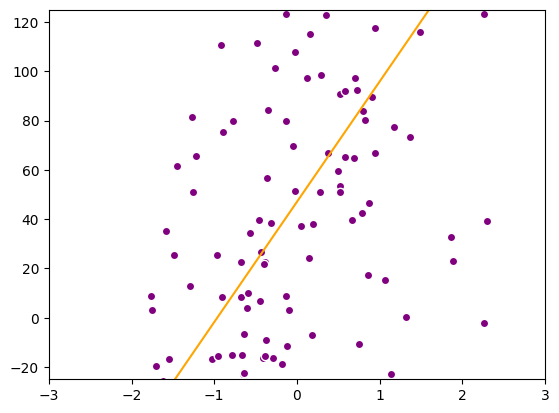

[20/200], loss: 45.015476929674385
[20/200], loss: 93.63252803015334
[20/200], loss: 211.8629666739464
[20/200], loss: 42.01508402815943
[20/200], loss: 78.25532611041714
[20/200], loss: 544.5663668345243
[20/200], loss: 440.44850021154537
[20/200], loss: 58.14805205736048
[20/200], loss: 606.1999704077368
[20/200], loss: 4.4366451794965025
[20/200], loss: 754.822583969478
[20/200], loss: 28.80844032054033
[20/200], loss: 190.69914666348646
[20/200], loss: 19.78433040835284
[20/200], loss: 225.41716573373557
[20/200], loss: 1.6883886747049244
[20/200], loss: 399.36715448860525
[20/200], loss: 164.74518833888357
[20/200], loss: 0.8571024024426387
[20/200], loss: 17.706603673646526
[20/200], loss: 700.5836215681938
[20/200], loss: 0.9364279971312607
[20/200], loss: 263.58134558690836
[20/200], loss: 176.60273757595965
[20/200], loss: 385.5120946755248
[20/200], loss: 421.5481664054944
[20/200], loss: 279.0890456941792
[20/200], loss: 9.898317359148812
[20/200], loss: 2.9200279182219027
[

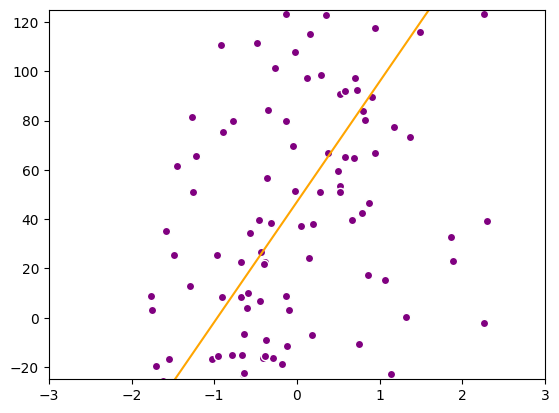

[21/200], loss: 45.015476930500675
[21/200], loss: 93.63252803041587
[21/200], loss: 211.8629666732107
[21/200], loss: 42.0150840284283
[21/200], loss: 78.25532611041048
[21/200], loss: 544.566366834094
[21/200], loss: 440.4485002115639
[21/200], loss: 58.148052057199024
[21/200], loss: 606.1999704081228
[21/200], loss: 4.436645179506545
[21/200], loss: 754.8225839703035
[21/200], loss: 28.808440320359328
[21/200], loss: 190.6991466635793
[21/200], loss: 19.78433040825558
[21/200], loss: 225.41716573294863
[21/200], loss: 1.6883886747137509
[21/200], loss: 399.36715448840846
[21/200], loss: 164.74518833843473
[21/200], loss: 0.8571024024167392
[21/200], loss: 17.706603673532616
[21/200], loss: 700.5836215682369
[21/200], loss: 0.936427997116383
[21/200], loss: 263.5813455871261
[21/200], loss: 176.6027375762135
[21/200], loss: 385.51209467547545
[21/200], loss: 421.5481664050411
[21/200], loss: 279.08904569366314
[21/200], loss: 9.898317359175202
[21/200], loss: 2.920027918324174
[21/2

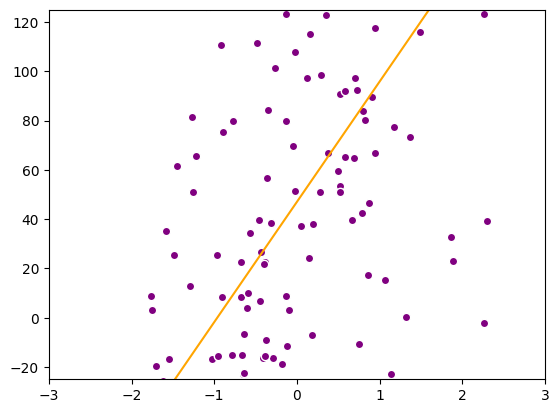

[22/200], loss: 45.01547693068352
[22/200], loss: 93.63252803047382
[22/200], loss: 211.86296667304805
[22/200], loss: 42.0150840284877
[22/200], loss: 78.25532611040967
[22/200], loss: 544.5663668340002
[22/200], loss: 440.4485002115694
[22/200], loss: 58.148052057163625
[22/200], loss: 606.1999704082104
[22/200], loss: 4.436645179508937
[22/200], loss: 754.8225839704852
[22/200], loss: 28.80844032031877
[22/200], loss: 190.69914666360083
[22/200], loss: 19.78433040823413
[22/200], loss: 225.41716573277483
[22/200], loss: 1.6883886747156833
[22/200], loss: 399.36715448836594
[22/200], loss: 164.74518833833594
[22/200], loss: 0.8571024024110458
[22/200], loss: 17.706603673507075
[22/200], loss: 700.5836215682455
[22/200], loss: 0.9364279971131547
[22/200], loss: 263.5813455871736
[22/200], loss: 176.6027375762688
[22/200], loss: 385.51209467546283
[22/200], loss: 421.5481664049421
[22/200], loss: 279.08904569355
[22/200], loss: 9.89831735918082
[22/200], loss: 2.9200279183467712
[22/20

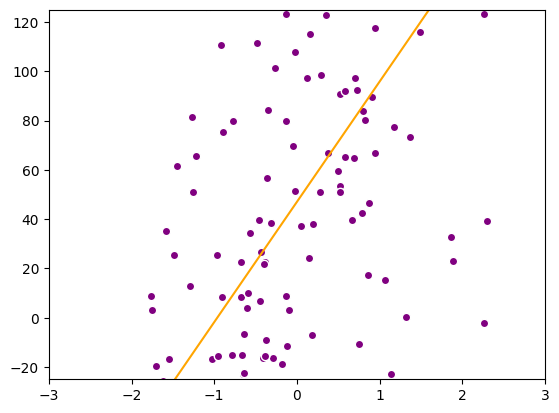

[23/200], loss: 45.01547693072451
[23/200], loss: 93.63252803048645
[23/200], loss: 211.8629666730121
[23/200], loss: 42.01508402850086
[23/200], loss: 78.25532611040985
[23/200], loss: 544.56636683398
[23/200], loss: 440.4485002115709
[23/200], loss: 58.148052057155965
[23/200], loss: 606.1999704082273
[23/200], loss: 4.436645179509497
[23/200], loss: 754.8225839705264
[23/200], loss: 28.808440320309707
[23/200], loss: 190.69914666360594
[23/200], loss: 19.78433040822939
[23/200], loss: 225.4171657327368
[23/200], loss: 1.6883886747161274
[23/200], loss: 399.3671544883569
[23/200], loss: 164.74518833831453
[23/200], loss: 0.8571024024098178
[23/200], loss: 17.706603673501494
[23/200], loss: 700.5836215682476
[23/200], loss: 0.9364279971124352
[23/200], loss: 263.5813455871839
[23/200], loss: 176.60273757628082
[23/200], loss: 385.5120946754603
[23/200], loss: 421.5481664049204
[23/200], loss: 279.0890456935255
[23/200], loss: 9.898317359182055
[23/200], loss: 2.9200279183516478
[23/20

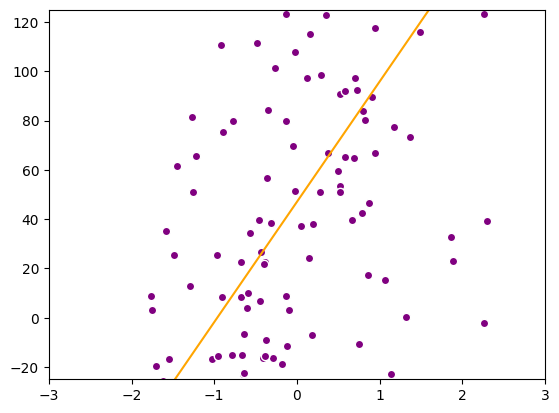

[24/200], loss: 45.015476930733676
[24/200], loss: 93.63252803048928
[24/200], loss: 211.8629666730042
[24/200], loss: 42.01508402850372
[24/200], loss: 78.25532611040941
[24/200], loss: 544.5663668339746
[24/200], loss: 440.4485002115709
[24/200], loss: 58.148052057154125
[24/200], loss: 606.1999704082326
[24/200], loss: 4.436645179509635
[24/200], loss: 754.8225839705352
[24/200], loss: 28.80844032030766
[24/200], loss: 190.69914666360705
[24/200], loss: 19.784330408228364
[24/200], loss: 225.41716573272777
[24/200], loss: 1.6883886747161796
[24/200], loss: 399.3671544883548
[24/200], loss: 164.74518833830936
[24/200], loss: 0.8571024024095202
[24/200], loss: 17.706603673500055
[24/200], loss: 700.5836215682482
[24/200], loss: 0.9364279971122601
[24/200], loss: 263.5813455871865
[24/200], loss: 176.60273757628403
[24/200], loss: 385.51209467546005
[24/200], loss: 421.5481664049148
[24/200], loss: 279.08904569351915
[24/200], loss: 9.898317359182395
[24/200], loss: 2.920027918352884
[

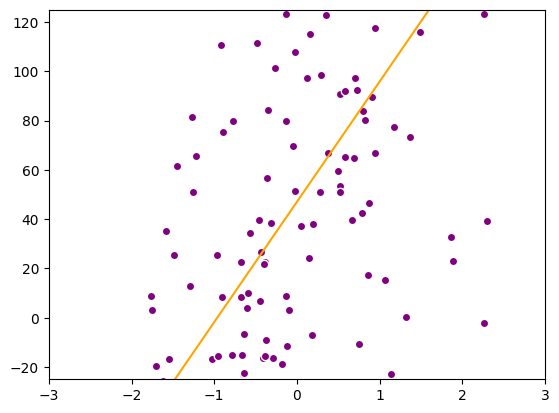

[25/200], loss: 45.01547693073638
[25/200], loss: 93.63252803049006
[25/200], loss: 211.86296667300155
[25/200], loss: 42.01508402850464
[25/200], loss: 78.25532611040985
[25/200], loss: 544.5663668339739
[25/200], loss: 440.4485002115719
[25/200], loss: 58.14805205715382
[25/200], loss: 606.1999704082357
[25/200], loss: 4.436645179509773
[25/200], loss: 754.8225839705368
[25/200], loss: 28.808440320306797
[25/200], loss: 190.69914666360802
[25/200], loss: 19.78433040822823
[25/200], loss: 225.41716573272535
[25/200], loss: 1.6883886747161534
[25/200], loss: 399.36715448835474
[25/200], loss: 164.74518833830808
[25/200], loss: 0.8571024024094457
[25/200], loss: 17.706603673499465
[25/200], loss: 700.583621568247
[25/200], loss: 0.9364279971122407
[25/200], loss: 263.58134558718666
[25/200], loss: 176.60273757628454
[25/200], loss: 385.5120946754591
[25/200], loss: 421.5481664049138
[25/200], loss: 279.08904569351745
[25/200], loss: 9.898317359182427
[25/200], loss: 2.9200279183532274
[

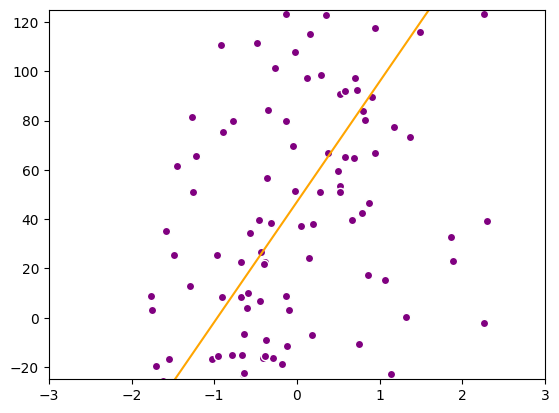

[26/200], loss: 45.01547693073746
[26/200], loss: 93.63252803049035
[26/200], loss: 211.86296667300127
[26/200], loss: 42.01508402850464
[26/200], loss: 78.25532611040941
[26/200], loss: 544.566366833973
[26/200], loss: 440.4485002115713
[26/200], loss: 58.148052057153514
[26/200], loss: 606.1999704082357
[26/200], loss: 4.436645179509667
[26/200], loss: 754.8225839705374
[26/200], loss: 28.808440320306687
[26/200], loss: 190.69914666360748
[26/200], loss: 19.784330408228094
[26/200], loss: 225.41716573272475
[26/200], loss: 1.6883886747161274
[26/200], loss: 399.3671544883544
[26/200], loss: 164.74518833830783
[26/200], loss: 0.8571024024094271
[26/200], loss: 17.706603673499295
[26/200], loss: 700.583621568247
[26/200], loss: 0.9364279971122407
[26/200], loss: 263.58134558718683
[26/200], loss: 176.60273757628482
[26/200], loss: 385.5120946754591
[26/200], loss: 421.5481664049134
[26/200], loss: 279.0890456935171
[26/200], loss: 9.898317359182498
[26/200], loss: 2.9200279183532962
[2

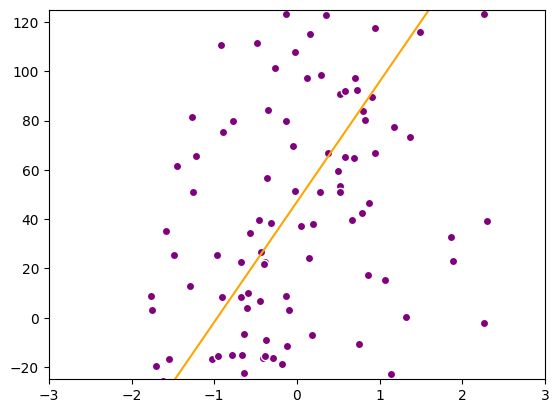

[27/200], loss: 45.01547693073692
[27/200], loss: 93.63252803049035
[27/200], loss: 211.86296667300127
[27/200], loss: 42.01508402850464
[27/200], loss: 78.25532611040923
[27/200], loss: 544.5663668339728
[27/200], loss: 440.44850021157106
[27/200], loss: 58.148052057153514
[27/200], loss: 606.1999704082357
[27/200], loss: 4.4366451795096244
[27/200], loss: 754.8225839705368
[27/200], loss: 28.808440320306797
[27/200], loss: 190.69914666360734
[27/200], loss: 19.784330408228094
[27/200], loss: 225.41716573272475
[27/200], loss: 1.6883886747161012
[27/200], loss: 399.36715448835423
[27/200], loss: 164.74518833830783
[27/200], loss: 0.8571024024094271
[27/200], loss: 17.706603673499295
[27/200], loss: 700.5836215682465
[27/200], loss: 0.9364279971122407
[27/200], loss: 263.58134558718683
[27/200], loss: 176.60273757628497
[27/200], loss: 385.5120946754591
[27/200], loss: 421.5481664049134
[27/200], loss: 279.08904569351677
[27/200], loss: 9.898317359182514
[27/200], loss: 2.9200279183532

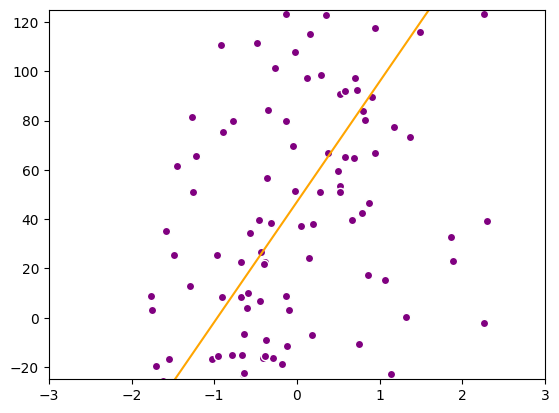

[28/200], loss: 45.01547693073746
[28/200], loss: 93.63252803049035
[28/200], loss: 211.86296667300127
[28/200], loss: 42.01508402850464
[28/200], loss: 78.25532611040941
[28/200], loss: 544.566366833973
[28/200], loss: 440.4485002115713
[28/200], loss: 58.148052057153514
[28/200], loss: 606.1999704082357
[28/200], loss: 4.436645179509667
[28/200], loss: 754.8225839705374
[28/200], loss: 28.808440320306687
[28/200], loss: 190.69914666360748
[28/200], loss: 19.784330408228094
[28/200], loss: 225.41716573272475
[28/200], loss: 1.6883886747161274
[28/200], loss: 399.3671544883544
[28/200], loss: 164.74518833830783
[28/200], loss: 0.8571024024094271
[28/200], loss: 17.706603673499295
[28/200], loss: 700.583621568247
[28/200], loss: 0.9364279971122407
[28/200], loss: 263.58134558718683
[28/200], loss: 176.60273757628482
[28/200], loss: 385.5120946754591
[28/200], loss: 421.5481664049134
[28/200], loss: 279.0890456935171
[28/200], loss: 9.898317359182498
[28/200], loss: 2.9200279183532962
[2

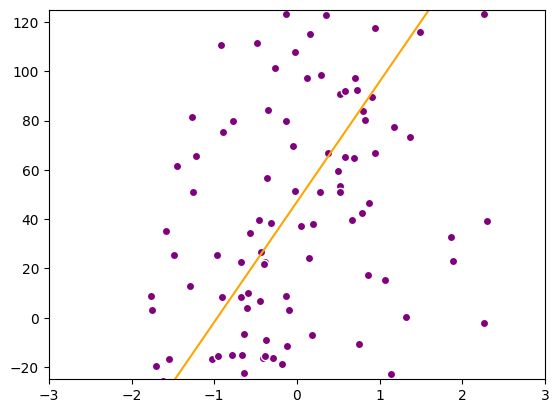

[29/200], loss: 45.01547693073692
[29/200], loss: 93.63252803049035
[29/200], loss: 211.86296667300127
[29/200], loss: 42.01508402850464
[29/200], loss: 78.25532611040923
[29/200], loss: 544.5663668339728
[29/200], loss: 440.44850021157106
[29/200], loss: 58.148052057153514
[29/200], loss: 606.1999704082357
[29/200], loss: 4.4366451795096244
[29/200], loss: 754.8225839705368
[29/200], loss: 28.808440320306797
[29/200], loss: 190.69914666360734
[29/200], loss: 19.784330408228094
[29/200], loss: 225.41716573272475
[29/200], loss: 1.6883886747161012
[29/200], loss: 399.36715448835423
[29/200], loss: 164.74518833830783
[29/200], loss: 0.8571024024094271
[29/200], loss: 17.706603673499295
[29/200], loss: 700.5836215682465
[29/200], loss: 0.9364279971122407
[29/200], loss: 263.58134558718683
[29/200], loss: 176.60273757628497
[29/200], loss: 385.5120946754591
[29/200], loss: 421.5481664049134
[29/200], loss: 279.08904569351677
[29/200], loss: 9.898317359182514
[29/200], loss: 2.9200279183532

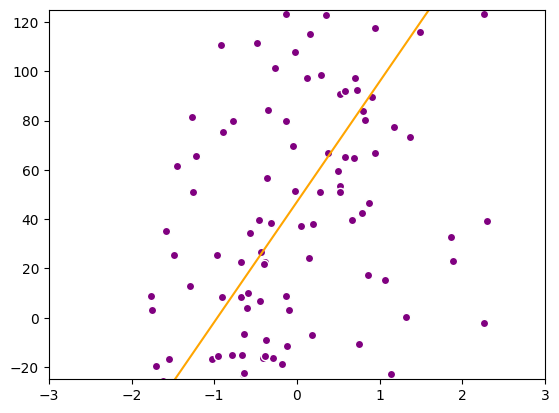

[30/200], loss: 45.01547693073746
[30/200], loss: 93.63252803049035
[30/200], loss: 211.86296667300127
[30/200], loss: 42.01508402850464
[30/200], loss: 78.25532611040941
[30/200], loss: 544.566366833973
[30/200], loss: 440.4485002115713
[30/200], loss: 58.148052057153514
[30/200], loss: 606.1999704082357
[30/200], loss: 4.436645179509667
[30/200], loss: 754.8225839705374
[30/200], loss: 28.808440320306687
[30/200], loss: 190.69914666360748
[30/200], loss: 19.784330408228094
[30/200], loss: 225.41716573272475
[30/200], loss: 1.6883886747161274
[30/200], loss: 399.3671544883544
[30/200], loss: 164.74518833830783
[30/200], loss: 0.8571024024094271
[30/200], loss: 17.706603673499295
[30/200], loss: 700.583621568247
[30/200], loss: 0.9364279971122407
[30/200], loss: 263.58134558718683
[30/200], loss: 176.60273757628482
[30/200], loss: 385.5120946754591
[30/200], loss: 421.5481664049134
[30/200], loss: 279.0890456935171
[30/200], loss: 9.898317359182498
[30/200], loss: 2.9200279183532962
[3

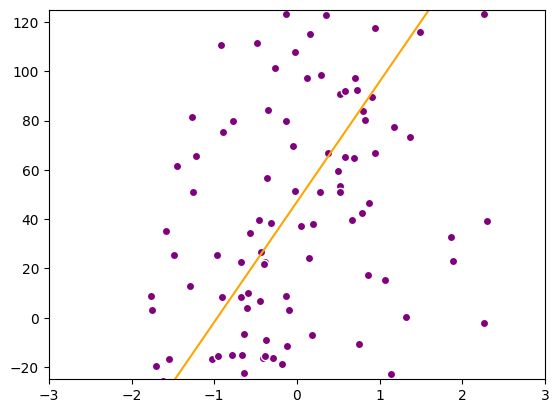

[31/200], loss: 45.01547693073692
[31/200], loss: 93.63252803049035
[31/200], loss: 211.86296667300127
[31/200], loss: 42.01508402850464
[31/200], loss: 78.25532611040923
[31/200], loss: 544.5663668339728
[31/200], loss: 440.44850021157106
[31/200], loss: 58.148052057153514
[31/200], loss: 606.1999704082357
[31/200], loss: 4.4366451795096244
[31/200], loss: 754.8225839705368
[31/200], loss: 28.808440320306797
[31/200], loss: 190.69914666360734
[31/200], loss: 19.784330408228094
[31/200], loss: 225.41716573272475
[31/200], loss: 1.6883886747161012
[31/200], loss: 399.36715448835423
[31/200], loss: 164.74518833830783
[31/200], loss: 0.8571024024094271
[31/200], loss: 17.706603673499295
[31/200], loss: 700.5836215682465
[31/200], loss: 0.9364279971122407
[31/200], loss: 263.58134558718683
[31/200], loss: 176.60273757628497
[31/200], loss: 385.5120946754591
[31/200], loss: 421.5481664049134
[31/200], loss: 279.08904569351677
[31/200], loss: 9.898317359182514
[31/200], loss: 2.9200279183532

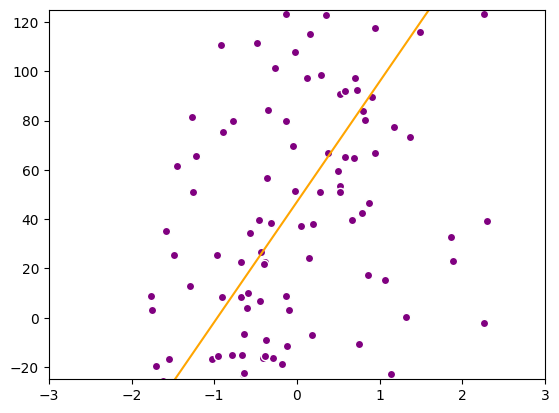

[32/200], loss: 45.01547693073746
[32/200], loss: 93.63252803049035
[32/200], loss: 211.86296667300127
[32/200], loss: 42.01508402850464
[32/200], loss: 78.25532611040941
[32/200], loss: 544.566366833973
[32/200], loss: 440.4485002115713
[32/200], loss: 58.148052057153514
[32/200], loss: 606.1999704082357
[32/200], loss: 4.436645179509667
[32/200], loss: 754.8225839705374
[32/200], loss: 28.808440320306687
[32/200], loss: 190.69914666360748
[32/200], loss: 19.784330408228094
[32/200], loss: 225.41716573272475
[32/200], loss: 1.6883886747161274
[32/200], loss: 399.3671544883544
[32/200], loss: 164.74518833830783
[32/200], loss: 0.8571024024094271
[32/200], loss: 17.706603673499295
[32/200], loss: 700.583621568247
[32/200], loss: 0.9364279971122407
[32/200], loss: 263.58134558718683
[32/200], loss: 176.60273757628482
[32/200], loss: 385.5120946754591
[32/200], loss: 421.5481664049134
[32/200], loss: 279.0890456935171
[32/200], loss: 9.898317359182498
[32/200], loss: 2.9200279183532962
[3

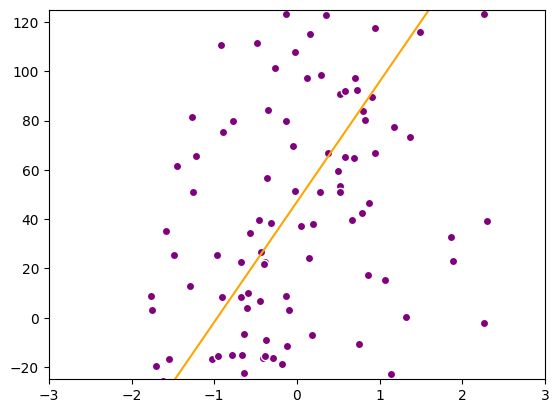

[33/200], loss: 45.01547693073692
[33/200], loss: 93.63252803049035
[33/200], loss: 211.86296667300127
[33/200], loss: 42.01508402850464
[33/200], loss: 78.25532611040923
[33/200], loss: 544.5663668339728
[33/200], loss: 440.44850021157106
[33/200], loss: 58.148052057153514
[33/200], loss: 606.1999704082357
[33/200], loss: 4.4366451795096244
[33/200], loss: 754.8225839705368
[33/200], loss: 28.808440320306797
[33/200], loss: 190.69914666360734
[33/200], loss: 19.784330408228094
[33/200], loss: 225.41716573272475
[33/200], loss: 1.6883886747161012
[33/200], loss: 399.36715448835423
[33/200], loss: 164.74518833830783
[33/200], loss: 0.8571024024094271
[33/200], loss: 17.706603673499295
[33/200], loss: 700.5836215682465
[33/200], loss: 0.9364279971122407
[33/200], loss: 263.58134558718683
[33/200], loss: 176.60273757628497
[33/200], loss: 385.5120946754591
[33/200], loss: 421.5481664049134
[33/200], loss: 279.08904569351677
[33/200], loss: 9.898317359182514
[33/200], loss: 2.9200279183532

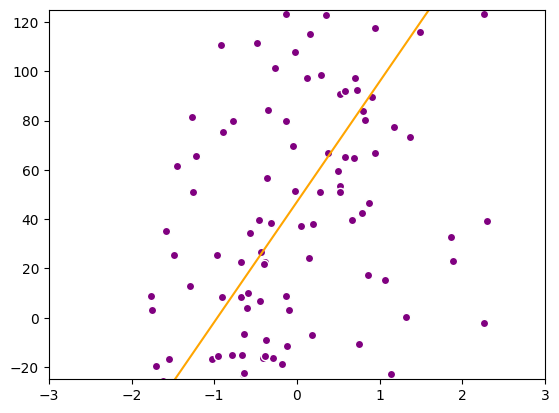

[34/200], loss: 45.01547693073746
[34/200], loss: 93.63252803049035
[34/200], loss: 211.86296667300127
[34/200], loss: 42.01508402850464
[34/200], loss: 78.25532611040941
[34/200], loss: 544.566366833973
[34/200], loss: 440.4485002115713
[34/200], loss: 58.148052057153514
[34/200], loss: 606.1999704082357
[34/200], loss: 4.436645179509667
[34/200], loss: 754.8225839705374
[34/200], loss: 28.808440320306687
[34/200], loss: 190.69914666360748
[34/200], loss: 19.784330408228094
[34/200], loss: 225.41716573272475
[34/200], loss: 1.6883886747161274
[34/200], loss: 399.3671544883544
[34/200], loss: 164.74518833830783
[34/200], loss: 0.8571024024094271
[34/200], loss: 17.706603673499295
[34/200], loss: 700.583621568247
[34/200], loss: 0.9364279971122407
[34/200], loss: 263.58134558718683
[34/200], loss: 176.60273757628482
[34/200], loss: 385.5120946754591
[34/200], loss: 421.5481664049134
[34/200], loss: 279.0890456935171
[34/200], loss: 9.898317359182498
[34/200], loss: 2.9200279183532962
[3

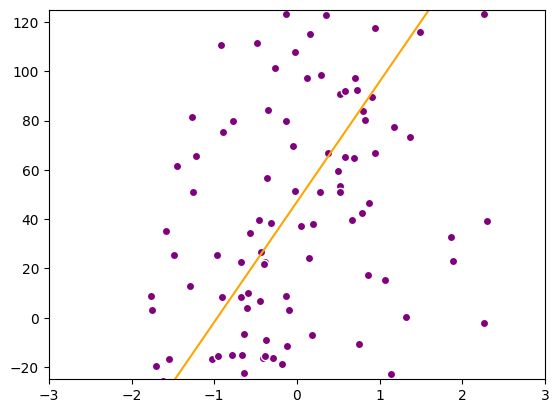

[35/200], loss: 45.01547693073692
[35/200], loss: 93.63252803049035
[35/200], loss: 211.86296667300127
[35/200], loss: 42.01508402850464
[35/200], loss: 78.25532611040923
[35/200], loss: 544.5663668339728
[35/200], loss: 440.44850021157106
[35/200], loss: 58.148052057153514
[35/200], loss: 606.1999704082357
[35/200], loss: 4.4366451795096244
[35/200], loss: 754.8225839705368
[35/200], loss: 28.808440320306797
[35/200], loss: 190.69914666360734
[35/200], loss: 19.784330408228094
[35/200], loss: 225.41716573272475
[35/200], loss: 1.6883886747161012
[35/200], loss: 399.36715448835423
[35/200], loss: 164.74518833830783
[35/200], loss: 0.8571024024094271
[35/200], loss: 17.706603673499295
[35/200], loss: 700.5836215682465
[35/200], loss: 0.9364279971122407
[35/200], loss: 263.58134558718683
[35/200], loss: 176.60273757628497
[35/200], loss: 385.5120946754591
[35/200], loss: 421.5481664049134
[35/200], loss: 279.08904569351677
[35/200], loss: 9.898317359182514
[35/200], loss: 2.9200279183532

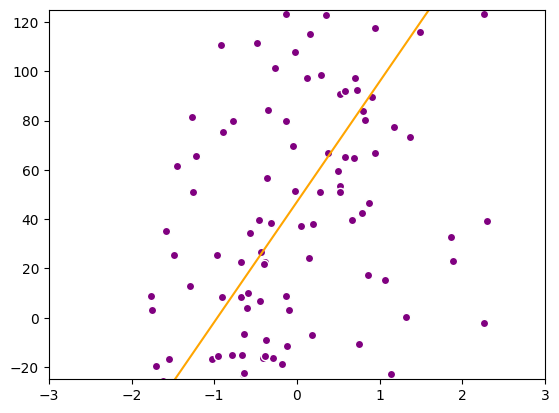

[36/200], loss: 45.01547693073746
[36/200], loss: 93.63252803049035
[36/200], loss: 211.86296667300127
[36/200], loss: 42.01508402850464
[36/200], loss: 78.25532611040941
[36/200], loss: 544.566366833973
[36/200], loss: 440.4485002115713
[36/200], loss: 58.148052057153514
[36/200], loss: 606.1999704082357
[36/200], loss: 4.436645179509667
[36/200], loss: 754.8225839705374
[36/200], loss: 28.808440320306687
[36/200], loss: 190.69914666360748
[36/200], loss: 19.784330408228094
[36/200], loss: 225.41716573272475
[36/200], loss: 1.6883886747161274
[36/200], loss: 399.3671544883544
[36/200], loss: 164.74518833830783
[36/200], loss: 0.8571024024094271
[36/200], loss: 17.706603673499295
[36/200], loss: 700.583621568247
[36/200], loss: 0.9364279971122407
[36/200], loss: 263.58134558718683
[36/200], loss: 176.60273757628482
[36/200], loss: 385.5120946754591
[36/200], loss: 421.5481664049134
[36/200], loss: 279.0890456935171
[36/200], loss: 9.898317359182498
[36/200], loss: 2.9200279183532962
[3

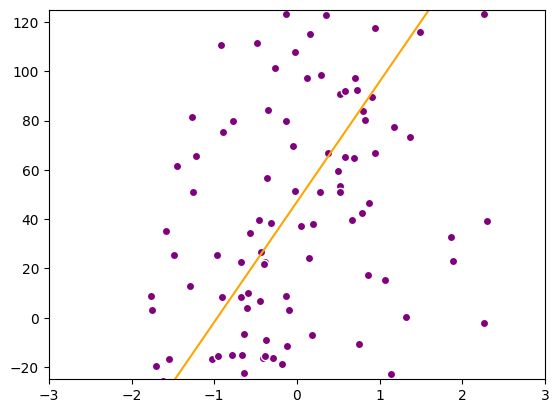

[37/200], loss: 45.01547693073692
[37/200], loss: 93.63252803049035
[37/200], loss: 211.86296667300127
[37/200], loss: 42.01508402850464
[37/200], loss: 78.25532611040923
[37/200], loss: 544.5663668339728
[37/200], loss: 440.44850021157106
[37/200], loss: 58.148052057153514
[37/200], loss: 606.1999704082357
[37/200], loss: 4.4366451795096244
[37/200], loss: 754.8225839705368
[37/200], loss: 28.808440320306797
[37/200], loss: 190.69914666360734
[37/200], loss: 19.784330408228094
[37/200], loss: 225.41716573272475
[37/200], loss: 1.6883886747161012
[37/200], loss: 399.36715448835423
[37/200], loss: 164.74518833830783
[37/200], loss: 0.8571024024094271
[37/200], loss: 17.706603673499295
[37/200], loss: 700.5836215682465
[37/200], loss: 0.9364279971122407
[37/200], loss: 263.58134558718683
[37/200], loss: 176.60273757628497
[37/200], loss: 385.5120946754591
[37/200], loss: 421.5481664049134
[37/200], loss: 279.08904569351677
[37/200], loss: 9.898317359182514
[37/200], loss: 2.9200279183532

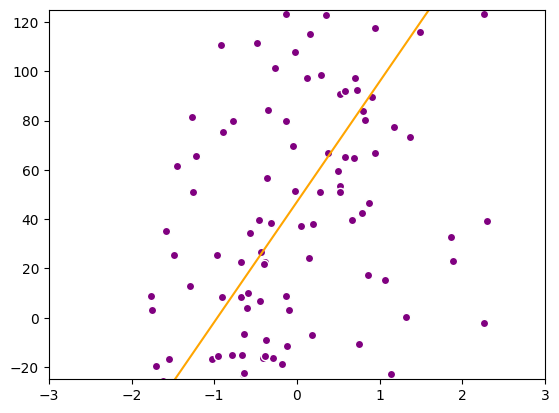

[38/200], loss: 45.01547693073746
[38/200], loss: 93.63252803049035
[38/200], loss: 211.86296667300127
[38/200], loss: 42.01508402850464
[38/200], loss: 78.25532611040941
[38/200], loss: 544.566366833973
[38/200], loss: 440.4485002115713
[38/200], loss: 58.148052057153514
[38/200], loss: 606.1999704082357
[38/200], loss: 4.436645179509667
[38/200], loss: 754.8225839705374
[38/200], loss: 28.808440320306687
[38/200], loss: 190.69914666360748
[38/200], loss: 19.784330408228094
[38/200], loss: 225.41716573272475
[38/200], loss: 1.6883886747161274
[38/200], loss: 399.3671544883544
[38/200], loss: 164.74518833830783
[38/200], loss: 0.8571024024094271
[38/200], loss: 17.706603673499295
[38/200], loss: 700.583621568247
[38/200], loss: 0.9364279971122407
[38/200], loss: 263.58134558718683
[38/200], loss: 176.60273757628482
[38/200], loss: 385.5120946754591
[38/200], loss: 421.5481664049134
[38/200], loss: 279.0890456935171
[38/200], loss: 9.898317359182498
[38/200], loss: 2.9200279183532962
[3

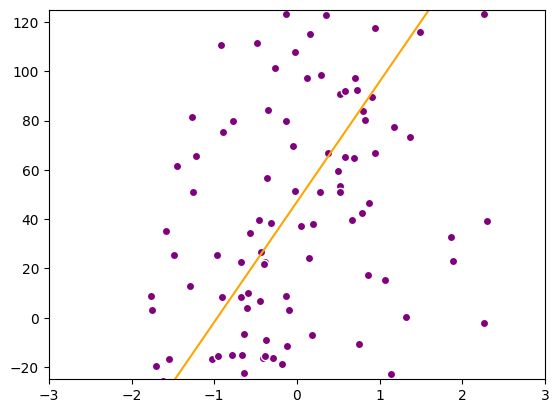

[39/200], loss: 45.01547693073692
[39/200], loss: 93.63252803049035
[39/200], loss: 211.86296667300127
[39/200], loss: 42.01508402850464
[39/200], loss: 78.25532611040923
[39/200], loss: 544.5663668339728
[39/200], loss: 440.44850021157106
[39/200], loss: 58.148052057153514
[39/200], loss: 606.1999704082357
[39/200], loss: 4.4366451795096244
[39/200], loss: 754.8225839705368
[39/200], loss: 28.808440320306797
[39/200], loss: 190.69914666360734
[39/200], loss: 19.784330408228094
[39/200], loss: 225.41716573272475
[39/200], loss: 1.6883886747161012
[39/200], loss: 399.36715448835423
[39/200], loss: 164.74518833830783
[39/200], loss: 0.8571024024094271
[39/200], loss: 17.706603673499295
[39/200], loss: 700.5836215682465
[39/200], loss: 0.9364279971122407
[39/200], loss: 263.58134558718683
[39/200], loss: 176.60273757628497
[39/200], loss: 385.5120946754591
[39/200], loss: 421.5481664049134
[39/200], loss: 279.08904569351677
[39/200], loss: 9.898317359182514
[39/200], loss: 2.9200279183532

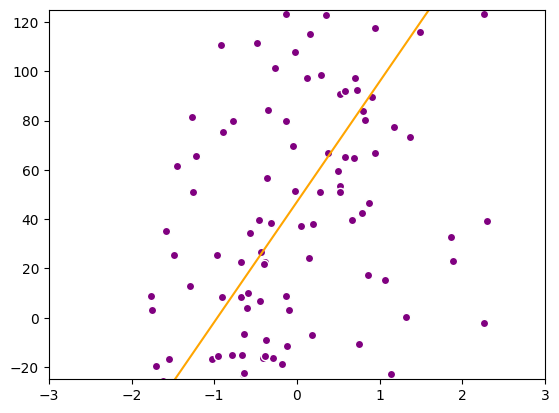

[40/200], loss: 45.01547693073746
[40/200], loss: 93.63252803049035
[40/200], loss: 211.86296667300127
[40/200], loss: 42.01508402850464
[40/200], loss: 78.25532611040941
[40/200], loss: 544.566366833973
[40/200], loss: 440.4485002115713
[40/200], loss: 58.148052057153514
[40/200], loss: 606.1999704082357
[40/200], loss: 4.436645179509667
[40/200], loss: 754.8225839705374
[40/200], loss: 28.808440320306687
[40/200], loss: 190.69914666360748
[40/200], loss: 19.784330408228094
[40/200], loss: 225.41716573272475
[40/200], loss: 1.6883886747161274
[40/200], loss: 399.3671544883544
[40/200], loss: 164.74518833830783
[40/200], loss: 0.8571024024094271
[40/200], loss: 17.706603673499295
[40/200], loss: 700.583621568247
[40/200], loss: 0.9364279971122407
[40/200], loss: 263.58134558718683
[40/200], loss: 176.60273757628482
[40/200], loss: 385.5120946754591
[40/200], loss: 421.5481664049134
[40/200], loss: 279.0890456935171
[40/200], loss: 9.898317359182498
[40/200], loss: 2.9200279183532962
[4

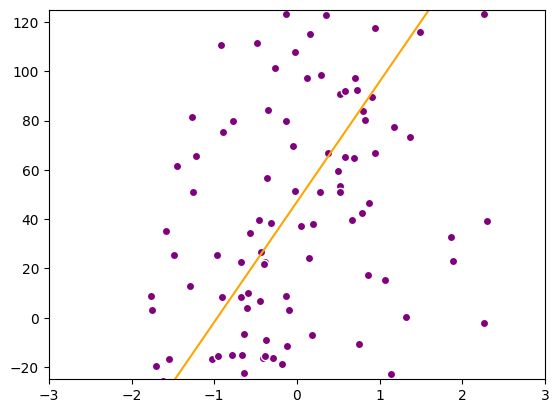

[41/200], loss: 45.01547693073692
[41/200], loss: 93.63252803049035
[41/200], loss: 211.86296667300127
[41/200], loss: 42.01508402850464
[41/200], loss: 78.25532611040923
[41/200], loss: 544.5663668339728
[41/200], loss: 440.44850021157106
[41/200], loss: 58.148052057153514
[41/200], loss: 606.1999704082357
[41/200], loss: 4.4366451795096244
[41/200], loss: 754.8225839705368
[41/200], loss: 28.808440320306797
[41/200], loss: 190.69914666360734
[41/200], loss: 19.784330408228094
[41/200], loss: 225.41716573272475
[41/200], loss: 1.6883886747161012
[41/200], loss: 399.36715448835423
[41/200], loss: 164.74518833830783
[41/200], loss: 0.8571024024094271
[41/200], loss: 17.706603673499295
[41/200], loss: 700.5836215682465
[41/200], loss: 0.9364279971122407
[41/200], loss: 263.58134558718683
[41/200], loss: 176.60273757628497
[41/200], loss: 385.5120946754591
[41/200], loss: 421.5481664049134
[41/200], loss: 279.08904569351677
[41/200], loss: 9.898317359182514
[41/200], loss: 2.9200279183532

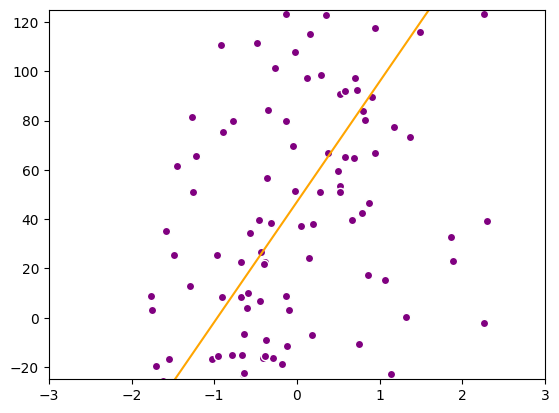

[42/200], loss: 45.01547693073746
[42/200], loss: 93.63252803049035
[42/200], loss: 211.86296667300127
[42/200], loss: 42.01508402850464
[42/200], loss: 78.25532611040941
[42/200], loss: 544.566366833973
[42/200], loss: 440.4485002115713
[42/200], loss: 58.148052057153514
[42/200], loss: 606.1999704082357
[42/200], loss: 4.436645179509667
[42/200], loss: 754.8225839705374
[42/200], loss: 28.808440320306687
[42/200], loss: 190.69914666360748
[42/200], loss: 19.784330408228094
[42/200], loss: 225.41716573272475
[42/200], loss: 1.6883886747161274
[42/200], loss: 399.3671544883544
[42/200], loss: 164.74518833830783
[42/200], loss: 0.8571024024094271
[42/200], loss: 17.706603673499295
[42/200], loss: 700.583621568247
[42/200], loss: 0.9364279971122407
[42/200], loss: 263.58134558718683
[42/200], loss: 176.60273757628482
[42/200], loss: 385.5120946754591
[42/200], loss: 421.5481664049134
[42/200], loss: 279.0890456935171
[42/200], loss: 9.898317359182498
[42/200], loss: 2.9200279183532962
[4

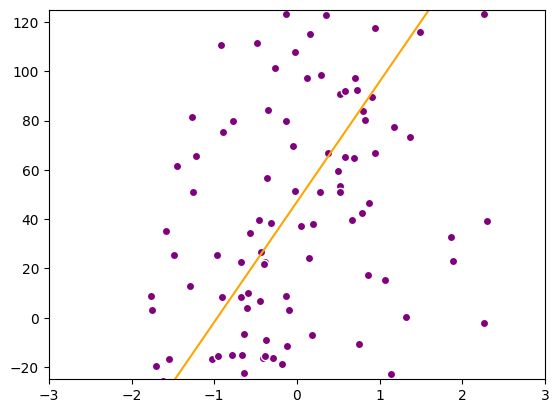

[43/200], loss: 45.01547693073692
[43/200], loss: 93.63252803049035
[43/200], loss: 211.86296667300127
[43/200], loss: 42.01508402850464
[43/200], loss: 78.25532611040923
[43/200], loss: 544.5663668339728
[43/200], loss: 440.44850021157106
[43/200], loss: 58.148052057153514
[43/200], loss: 606.1999704082357
[43/200], loss: 4.4366451795096244
[43/200], loss: 754.8225839705368
[43/200], loss: 28.808440320306797
[43/200], loss: 190.69914666360734
[43/200], loss: 19.784330408228094
[43/200], loss: 225.41716573272475
[43/200], loss: 1.6883886747161012
[43/200], loss: 399.36715448835423
[43/200], loss: 164.74518833830783
[43/200], loss: 0.8571024024094271
[43/200], loss: 17.706603673499295
[43/200], loss: 700.5836215682465
[43/200], loss: 0.9364279971122407
[43/200], loss: 263.58134558718683
[43/200], loss: 176.60273757628497
[43/200], loss: 385.5120946754591
[43/200], loss: 421.5481664049134
[43/200], loss: 279.08904569351677
[43/200], loss: 9.898317359182514
[43/200], loss: 2.9200279183532

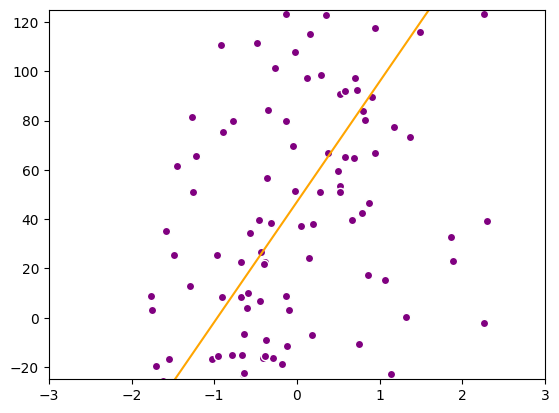

[44/200], loss: 45.01547693073746
[44/200], loss: 93.63252803049035
[44/200], loss: 211.86296667300127
[44/200], loss: 42.01508402850464
[44/200], loss: 78.25532611040941
[44/200], loss: 544.566366833973
[44/200], loss: 440.4485002115713
[44/200], loss: 58.148052057153514
[44/200], loss: 606.1999704082357
[44/200], loss: 4.436645179509667
[44/200], loss: 754.8225839705374
[44/200], loss: 28.808440320306687
[44/200], loss: 190.69914666360748
[44/200], loss: 19.784330408228094
[44/200], loss: 225.41716573272475
[44/200], loss: 1.6883886747161274
[44/200], loss: 399.3671544883544
[44/200], loss: 164.74518833830783
[44/200], loss: 0.8571024024094271
[44/200], loss: 17.706603673499295
[44/200], loss: 700.583621568247
[44/200], loss: 0.9364279971122407
[44/200], loss: 263.58134558718683
[44/200], loss: 176.60273757628482
[44/200], loss: 385.5120946754591
[44/200], loss: 421.5481664049134
[44/200], loss: 279.0890456935171
[44/200], loss: 9.898317359182498
[44/200], loss: 2.9200279183532962
[4

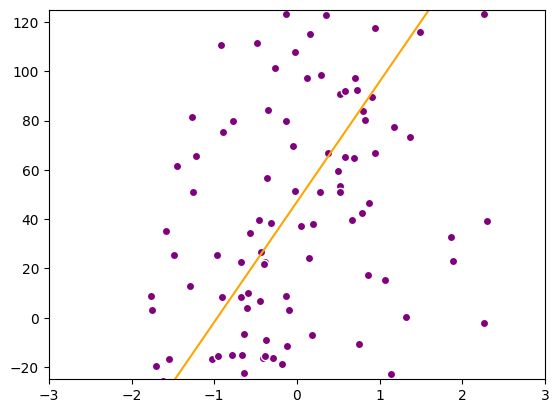

[45/200], loss: 45.01547693073692
[45/200], loss: 93.63252803049035
[45/200], loss: 211.86296667300127
[45/200], loss: 42.01508402850464
[45/200], loss: 78.25532611040923
[45/200], loss: 544.5663668339728
[45/200], loss: 440.44850021157106
[45/200], loss: 58.148052057153514
[45/200], loss: 606.1999704082357
[45/200], loss: 4.4366451795096244
[45/200], loss: 754.8225839705368
[45/200], loss: 28.808440320306797
[45/200], loss: 190.69914666360734
[45/200], loss: 19.784330408228094
[45/200], loss: 225.41716573272475
[45/200], loss: 1.6883886747161012
[45/200], loss: 399.36715448835423
[45/200], loss: 164.74518833830783
[45/200], loss: 0.8571024024094271
[45/200], loss: 17.706603673499295
[45/200], loss: 700.5836215682465
[45/200], loss: 0.9364279971122407
[45/200], loss: 263.58134558718683
[45/200], loss: 176.60273757628497
[45/200], loss: 385.5120946754591
[45/200], loss: 421.5481664049134
[45/200], loss: 279.08904569351677
[45/200], loss: 9.898317359182514
[45/200], loss: 2.9200279183532

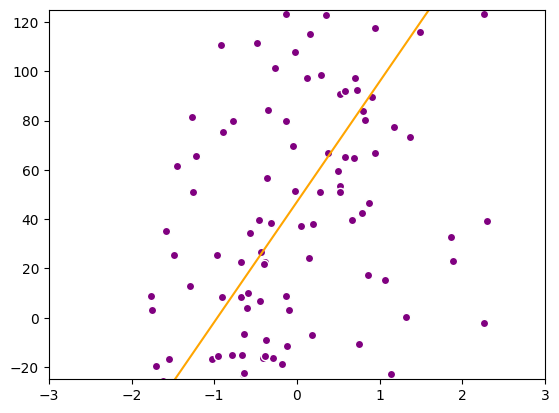

[46/200], loss: 45.01547693073746
[46/200], loss: 93.63252803049035
[46/200], loss: 211.86296667300127
[46/200], loss: 42.01508402850464
[46/200], loss: 78.25532611040941
[46/200], loss: 544.566366833973
[46/200], loss: 440.4485002115713
[46/200], loss: 58.148052057153514
[46/200], loss: 606.1999704082357
[46/200], loss: 4.436645179509667
[46/200], loss: 754.8225839705374
[46/200], loss: 28.808440320306687
[46/200], loss: 190.69914666360748
[46/200], loss: 19.784330408228094
[46/200], loss: 225.41716573272475
[46/200], loss: 1.6883886747161274
[46/200], loss: 399.3671544883544
[46/200], loss: 164.74518833830783
[46/200], loss: 0.8571024024094271
[46/200], loss: 17.706603673499295
[46/200], loss: 700.583621568247
[46/200], loss: 0.9364279971122407
[46/200], loss: 263.58134558718683
[46/200], loss: 176.60273757628482
[46/200], loss: 385.5120946754591
[46/200], loss: 421.5481664049134
[46/200], loss: 279.0890456935171
[46/200], loss: 9.898317359182498
[46/200], loss: 2.9200279183532962
[4

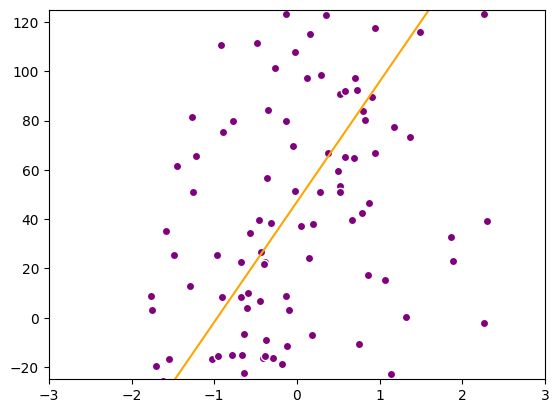

[47/200], loss: 45.01547693073692
[47/200], loss: 93.63252803049035
[47/200], loss: 211.86296667300127
[47/200], loss: 42.01508402850464
[47/200], loss: 78.25532611040923
[47/200], loss: 544.5663668339728
[47/200], loss: 440.44850021157106
[47/200], loss: 58.148052057153514
[47/200], loss: 606.1999704082357
[47/200], loss: 4.4366451795096244
[47/200], loss: 754.8225839705368
[47/200], loss: 28.808440320306797
[47/200], loss: 190.69914666360734
[47/200], loss: 19.784330408228094
[47/200], loss: 225.41716573272475
[47/200], loss: 1.6883886747161012
[47/200], loss: 399.36715448835423
[47/200], loss: 164.74518833830783
[47/200], loss: 0.8571024024094271
[47/200], loss: 17.706603673499295
[47/200], loss: 700.5836215682465
[47/200], loss: 0.9364279971122407
[47/200], loss: 263.58134558718683
[47/200], loss: 176.60273757628497
[47/200], loss: 385.5120946754591
[47/200], loss: 421.5481664049134
[47/200], loss: 279.08904569351677
[47/200], loss: 9.898317359182514
[47/200], loss: 2.9200279183532

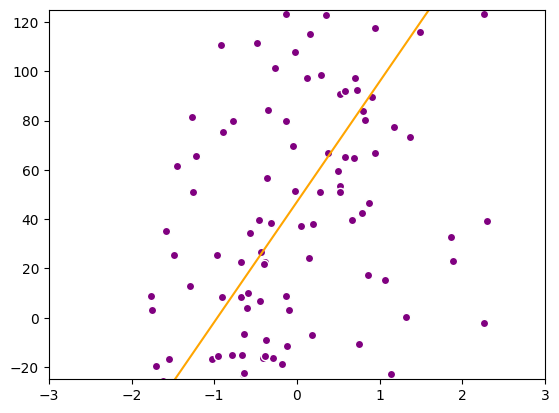

[48/200], loss: 45.01547693073746
[48/200], loss: 93.63252803049035
[48/200], loss: 211.86296667300127
[48/200], loss: 42.01508402850464
[48/200], loss: 78.25532611040941
[48/200], loss: 544.566366833973
[48/200], loss: 440.4485002115713
[48/200], loss: 58.148052057153514
[48/200], loss: 606.1999704082357
[48/200], loss: 4.436645179509667
[48/200], loss: 754.8225839705374
[48/200], loss: 28.808440320306687
[48/200], loss: 190.69914666360748
[48/200], loss: 19.784330408228094
[48/200], loss: 225.41716573272475
[48/200], loss: 1.6883886747161274
[48/200], loss: 399.3671544883544
[48/200], loss: 164.74518833830783
[48/200], loss: 0.8571024024094271
[48/200], loss: 17.706603673499295
[48/200], loss: 700.583621568247
[48/200], loss: 0.9364279971122407
[48/200], loss: 263.58134558718683
[48/200], loss: 176.60273757628482
[48/200], loss: 385.5120946754591
[48/200], loss: 421.5481664049134
[48/200], loss: 279.0890456935171
[48/200], loss: 9.898317359182498
[48/200], loss: 2.9200279183532962
[4

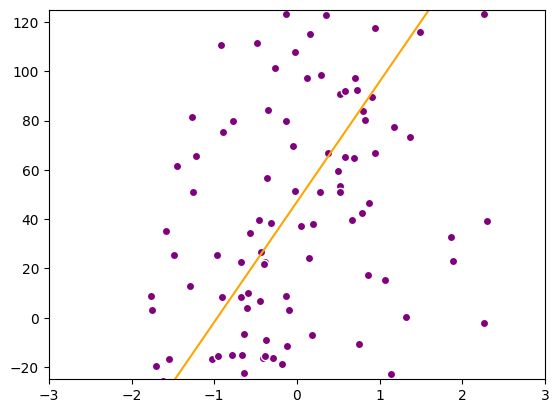

[49/200], loss: 45.01547693073692
[49/200], loss: 93.63252803049035
[49/200], loss: 211.86296667300127
[49/200], loss: 42.01508402850464
[49/200], loss: 78.25532611040923
[49/200], loss: 544.5663668339728
[49/200], loss: 440.44850021157106
[49/200], loss: 58.148052057153514
[49/200], loss: 606.1999704082357
[49/200], loss: 4.4366451795096244
[49/200], loss: 754.8225839705368
[49/200], loss: 28.808440320306797
[49/200], loss: 190.69914666360734
[49/200], loss: 19.784330408228094
[49/200], loss: 225.41716573272475
[49/200], loss: 1.6883886747161012
[49/200], loss: 399.36715448835423
[49/200], loss: 164.74518833830783
[49/200], loss: 0.8571024024094271
[49/200], loss: 17.706603673499295
[49/200], loss: 700.5836215682465
[49/200], loss: 0.9364279971122407
[49/200], loss: 263.58134558718683
[49/200], loss: 176.60273757628497
[49/200], loss: 385.5120946754591
[49/200], loss: 421.5481664049134
[49/200], loss: 279.08904569351677
[49/200], loss: 9.898317359182514
[49/200], loss: 2.9200279183532

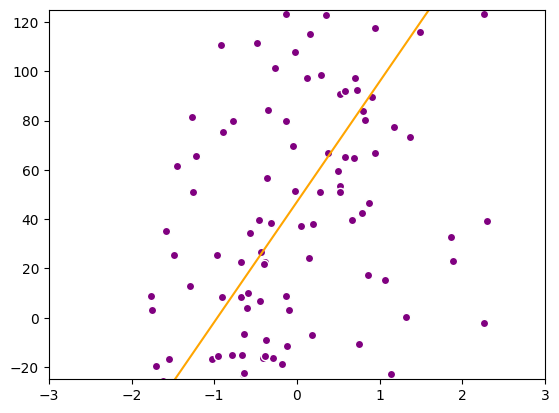

[50/200], loss: 45.01547693073746
[50/200], loss: 93.63252803049035
[50/200], loss: 211.86296667300127
[50/200], loss: 42.01508402850464
[50/200], loss: 78.25532611040941
[50/200], loss: 544.566366833973
[50/200], loss: 440.4485002115713
[50/200], loss: 58.148052057153514
[50/200], loss: 606.1999704082357
[50/200], loss: 4.436645179509667
[50/200], loss: 754.8225839705374
[50/200], loss: 28.808440320306687
[50/200], loss: 190.69914666360748
[50/200], loss: 19.784330408228094
[50/200], loss: 225.41716573272475
[50/200], loss: 1.6883886747161274
[50/200], loss: 399.3671544883544
[50/200], loss: 164.74518833830783
[50/200], loss: 0.8571024024094271
[50/200], loss: 17.706603673499295
[50/200], loss: 700.583621568247
[50/200], loss: 0.9364279971122407
[50/200], loss: 263.58134558718683
[50/200], loss: 176.60273757628482
[50/200], loss: 385.5120946754591
[50/200], loss: 421.5481664049134
[50/200], loss: 279.0890456935171
[50/200], loss: 9.898317359182498
[50/200], loss: 2.9200279183532962
[5

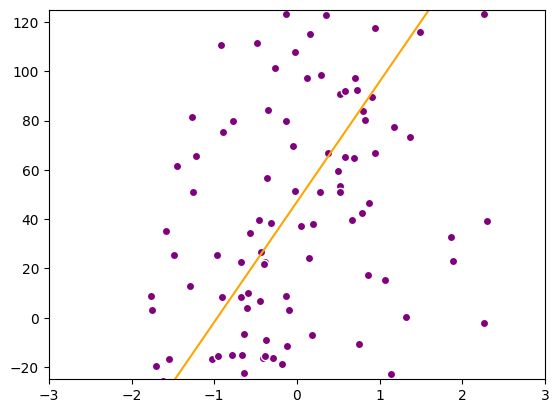

[51/200], loss: 45.01547693073692
[51/200], loss: 93.63252803049035
[51/200], loss: 211.86296667300127
[51/200], loss: 42.01508402850464
[51/200], loss: 78.25532611040923
[51/200], loss: 544.5663668339728
[51/200], loss: 440.44850021157106
[51/200], loss: 58.148052057153514
[51/200], loss: 606.1999704082357
[51/200], loss: 4.4366451795096244
[51/200], loss: 754.8225839705368
[51/200], loss: 28.808440320306797
[51/200], loss: 190.69914666360734
[51/200], loss: 19.784330408228094
[51/200], loss: 225.41716573272475
[51/200], loss: 1.6883886747161012
[51/200], loss: 399.36715448835423
[51/200], loss: 164.74518833830783
[51/200], loss: 0.8571024024094271
[51/200], loss: 17.706603673499295
[51/200], loss: 700.5836215682465
[51/200], loss: 0.9364279971122407
[51/200], loss: 263.58134558718683
[51/200], loss: 176.60273757628497
[51/200], loss: 385.5120946754591
[51/200], loss: 421.5481664049134
[51/200], loss: 279.08904569351677
[51/200], loss: 9.898317359182514
[51/200], loss: 2.9200279183532

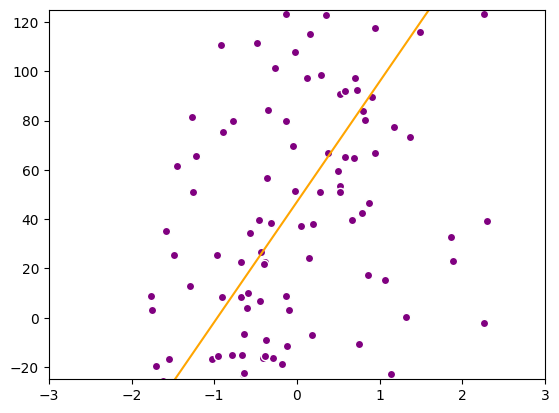

[52/200], loss: 45.01547693073746
[52/200], loss: 93.63252803049035
[52/200], loss: 211.86296667300127
[52/200], loss: 42.01508402850464
[52/200], loss: 78.25532611040941
[52/200], loss: 544.566366833973
[52/200], loss: 440.4485002115713
[52/200], loss: 58.148052057153514
[52/200], loss: 606.1999704082357
[52/200], loss: 4.436645179509667
[52/200], loss: 754.8225839705374
[52/200], loss: 28.808440320306687
[52/200], loss: 190.69914666360748
[52/200], loss: 19.784330408228094
[52/200], loss: 225.41716573272475
[52/200], loss: 1.6883886747161274
[52/200], loss: 399.3671544883544
[52/200], loss: 164.74518833830783
[52/200], loss: 0.8571024024094271
[52/200], loss: 17.706603673499295
[52/200], loss: 700.583621568247
[52/200], loss: 0.9364279971122407
[52/200], loss: 263.58134558718683
[52/200], loss: 176.60273757628482
[52/200], loss: 385.5120946754591
[52/200], loss: 421.5481664049134
[52/200], loss: 279.0890456935171
[52/200], loss: 9.898317359182498
[52/200], loss: 2.9200279183532962
[5

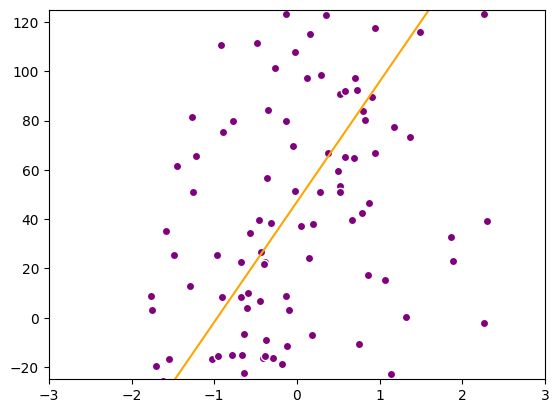

[53/200], loss: 45.01547693073692
[53/200], loss: 93.63252803049035
[53/200], loss: 211.86296667300127
[53/200], loss: 42.01508402850464
[53/200], loss: 78.25532611040923
[53/200], loss: 544.5663668339728
[53/200], loss: 440.44850021157106
[53/200], loss: 58.148052057153514
[53/200], loss: 606.1999704082357
[53/200], loss: 4.4366451795096244
[53/200], loss: 754.8225839705368
[53/200], loss: 28.808440320306797
[53/200], loss: 190.69914666360734
[53/200], loss: 19.784330408228094
[53/200], loss: 225.41716573272475
[53/200], loss: 1.6883886747161012
[53/200], loss: 399.36715448835423
[53/200], loss: 164.74518833830783
[53/200], loss: 0.8571024024094271
[53/200], loss: 17.706603673499295
[53/200], loss: 700.5836215682465
[53/200], loss: 0.9364279971122407
[53/200], loss: 263.58134558718683
[53/200], loss: 176.60273757628497
[53/200], loss: 385.5120946754591
[53/200], loss: 421.5481664049134
[53/200], loss: 279.08904569351677
[53/200], loss: 9.898317359182514
[53/200], loss: 2.9200279183532

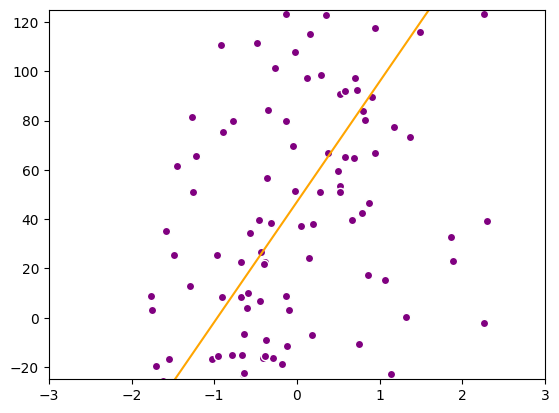

[54/200], loss: 45.01547693073746
[54/200], loss: 93.63252803049035
[54/200], loss: 211.86296667300127
[54/200], loss: 42.01508402850464
[54/200], loss: 78.25532611040941
[54/200], loss: 544.566366833973
[54/200], loss: 440.4485002115713
[54/200], loss: 58.148052057153514
[54/200], loss: 606.1999704082357
[54/200], loss: 4.436645179509667
[54/200], loss: 754.8225839705374
[54/200], loss: 28.808440320306687
[54/200], loss: 190.69914666360748
[54/200], loss: 19.784330408228094
[54/200], loss: 225.41716573272475
[54/200], loss: 1.6883886747161274
[54/200], loss: 399.3671544883544
[54/200], loss: 164.74518833830783
[54/200], loss: 0.8571024024094271
[54/200], loss: 17.706603673499295
[54/200], loss: 700.583621568247
[54/200], loss: 0.9364279971122407
[54/200], loss: 263.58134558718683
[54/200], loss: 176.60273757628482
[54/200], loss: 385.5120946754591
[54/200], loss: 421.5481664049134
[54/200], loss: 279.0890456935171
[54/200], loss: 9.898317359182498
[54/200], loss: 2.9200279183532962
[5

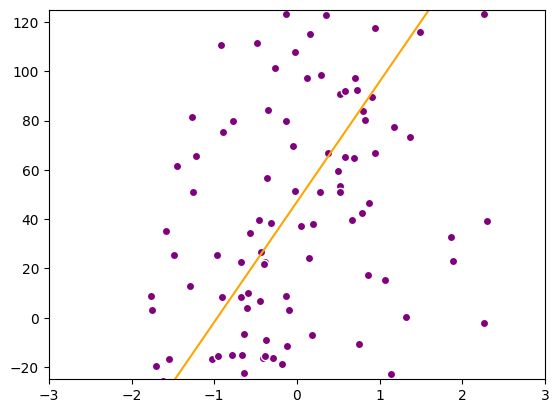

[55/200], loss: 45.01547693073692
[55/200], loss: 93.63252803049035
[55/200], loss: 211.86296667300127
[55/200], loss: 42.01508402850464
[55/200], loss: 78.25532611040923
[55/200], loss: 544.5663668339728
[55/200], loss: 440.44850021157106
[55/200], loss: 58.148052057153514
[55/200], loss: 606.1999704082357
[55/200], loss: 4.4366451795096244
[55/200], loss: 754.8225839705368
[55/200], loss: 28.808440320306797
[55/200], loss: 190.69914666360734
[55/200], loss: 19.784330408228094
[55/200], loss: 225.41716573272475
[55/200], loss: 1.6883886747161012
[55/200], loss: 399.36715448835423
[55/200], loss: 164.74518833830783
[55/200], loss: 0.8571024024094271
[55/200], loss: 17.706603673499295
[55/200], loss: 700.5836215682465
[55/200], loss: 0.9364279971122407
[55/200], loss: 263.58134558718683
[55/200], loss: 176.60273757628497
[55/200], loss: 385.5120946754591
[55/200], loss: 421.5481664049134
[55/200], loss: 279.08904569351677
[55/200], loss: 9.898317359182514
[55/200], loss: 2.9200279183532

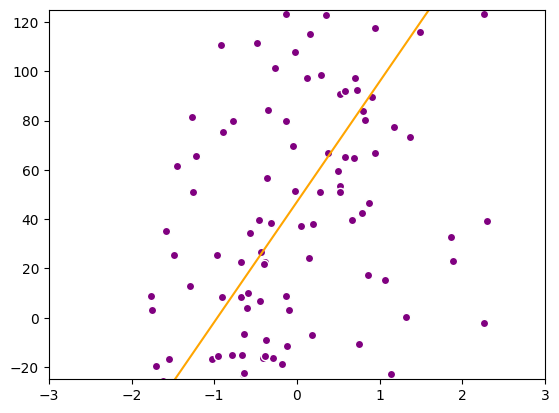

[56/200], loss: 45.01547693073746
[56/200], loss: 93.63252803049035
[56/200], loss: 211.86296667300127
[56/200], loss: 42.01508402850464
[56/200], loss: 78.25532611040941
[56/200], loss: 544.566366833973
[56/200], loss: 440.4485002115713
[56/200], loss: 58.148052057153514
[56/200], loss: 606.1999704082357
[56/200], loss: 4.436645179509667
[56/200], loss: 754.8225839705374
[56/200], loss: 28.808440320306687
[56/200], loss: 190.69914666360748
[56/200], loss: 19.784330408228094
[56/200], loss: 225.41716573272475
[56/200], loss: 1.6883886747161274
[56/200], loss: 399.3671544883544
[56/200], loss: 164.74518833830783
[56/200], loss: 0.8571024024094271
[56/200], loss: 17.706603673499295
[56/200], loss: 700.583621568247
[56/200], loss: 0.9364279971122407
[56/200], loss: 263.58134558718683
[56/200], loss: 176.60273757628482
[56/200], loss: 385.5120946754591
[56/200], loss: 421.5481664049134
[56/200], loss: 279.0890456935171
[56/200], loss: 9.898317359182498
[56/200], loss: 2.9200279183532962
[5

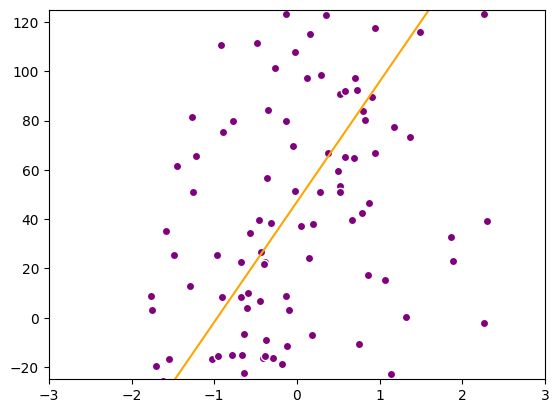

[57/200], loss: 45.01547693073692
[57/200], loss: 93.63252803049035
[57/200], loss: 211.86296667300127
[57/200], loss: 42.01508402850464
[57/200], loss: 78.25532611040923
[57/200], loss: 544.5663668339728
[57/200], loss: 440.44850021157106
[57/200], loss: 58.148052057153514
[57/200], loss: 606.1999704082357
[57/200], loss: 4.4366451795096244
[57/200], loss: 754.8225839705368
[57/200], loss: 28.808440320306797
[57/200], loss: 190.69914666360734
[57/200], loss: 19.784330408228094
[57/200], loss: 225.41716573272475
[57/200], loss: 1.6883886747161012
[57/200], loss: 399.36715448835423
[57/200], loss: 164.74518833830783
[57/200], loss: 0.8571024024094271
[57/200], loss: 17.706603673499295
[57/200], loss: 700.5836215682465
[57/200], loss: 0.9364279971122407
[57/200], loss: 263.58134558718683
[57/200], loss: 176.60273757628497
[57/200], loss: 385.5120946754591
[57/200], loss: 421.5481664049134
[57/200], loss: 279.08904569351677
[57/200], loss: 9.898317359182514
[57/200], loss: 2.9200279183532

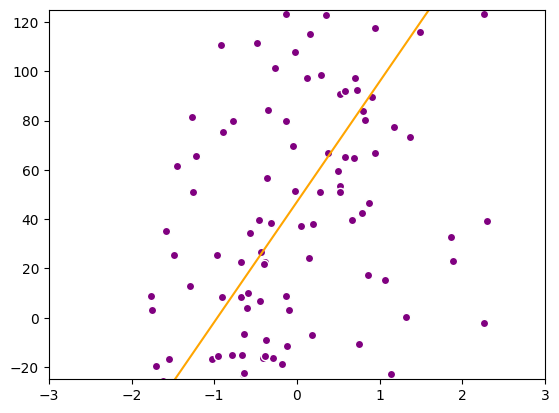

[58/200], loss: 45.01547693073746
[58/200], loss: 93.63252803049035
[58/200], loss: 211.86296667300127
[58/200], loss: 42.01508402850464
[58/200], loss: 78.25532611040941
[58/200], loss: 544.566366833973
[58/200], loss: 440.4485002115713
[58/200], loss: 58.148052057153514
[58/200], loss: 606.1999704082357
[58/200], loss: 4.436645179509667
[58/200], loss: 754.8225839705374
[58/200], loss: 28.808440320306687
[58/200], loss: 190.69914666360748
[58/200], loss: 19.784330408228094
[58/200], loss: 225.41716573272475
[58/200], loss: 1.6883886747161274
[58/200], loss: 399.3671544883544
[58/200], loss: 164.74518833830783
[58/200], loss: 0.8571024024094271
[58/200], loss: 17.706603673499295
[58/200], loss: 700.583621568247
[58/200], loss: 0.9364279971122407
[58/200], loss: 263.58134558718683
[58/200], loss: 176.60273757628482
[58/200], loss: 385.5120946754591
[58/200], loss: 421.5481664049134
[58/200], loss: 279.0890456935171
[58/200], loss: 9.898317359182498
[58/200], loss: 2.9200279183532962
[5

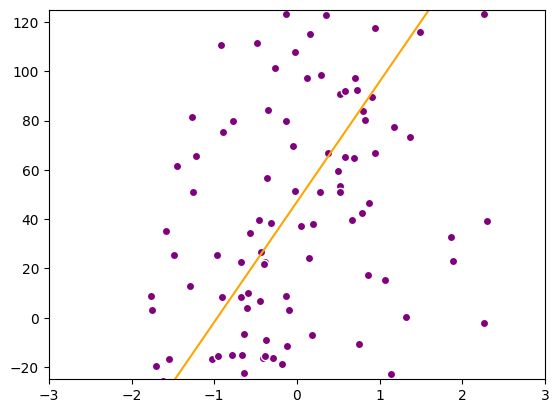

[59/200], loss: 45.01547693073692
[59/200], loss: 93.63252803049035
[59/200], loss: 211.86296667300127
[59/200], loss: 42.01508402850464
[59/200], loss: 78.25532611040923
[59/200], loss: 544.5663668339728
[59/200], loss: 440.44850021157106
[59/200], loss: 58.148052057153514
[59/200], loss: 606.1999704082357
[59/200], loss: 4.4366451795096244
[59/200], loss: 754.8225839705368
[59/200], loss: 28.808440320306797
[59/200], loss: 190.69914666360734
[59/200], loss: 19.784330408228094
[59/200], loss: 225.41716573272475
[59/200], loss: 1.6883886747161012
[59/200], loss: 399.36715448835423
[59/200], loss: 164.74518833830783
[59/200], loss: 0.8571024024094271
[59/200], loss: 17.706603673499295
[59/200], loss: 700.5836215682465
[59/200], loss: 0.9364279971122407
[59/200], loss: 263.58134558718683
[59/200], loss: 176.60273757628497
[59/200], loss: 385.5120946754591
[59/200], loss: 421.5481664049134
[59/200], loss: 279.08904569351677
[59/200], loss: 9.898317359182514
[59/200], loss: 2.9200279183532

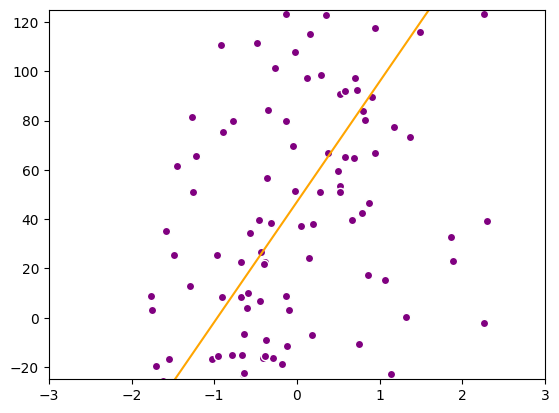

[60/200], loss: 45.01547693073746
[60/200], loss: 93.63252803049035
[60/200], loss: 211.86296667300127
[60/200], loss: 42.01508402850464
[60/200], loss: 78.25532611040941
[60/200], loss: 544.566366833973
[60/200], loss: 440.4485002115713
[60/200], loss: 58.148052057153514
[60/200], loss: 606.1999704082357
[60/200], loss: 4.436645179509667
[60/200], loss: 754.8225839705374
[60/200], loss: 28.808440320306687
[60/200], loss: 190.69914666360748
[60/200], loss: 19.784330408228094
[60/200], loss: 225.41716573272475
[60/200], loss: 1.6883886747161274
[60/200], loss: 399.3671544883544
[60/200], loss: 164.74518833830783
[60/200], loss: 0.8571024024094271
[60/200], loss: 17.706603673499295
[60/200], loss: 700.583621568247
[60/200], loss: 0.9364279971122407
[60/200], loss: 263.58134558718683
[60/200], loss: 176.60273757628482
[60/200], loss: 385.5120946754591
[60/200], loss: 421.5481664049134
[60/200], loss: 279.0890456935171
[60/200], loss: 9.898317359182498
[60/200], loss: 2.9200279183532962
[6

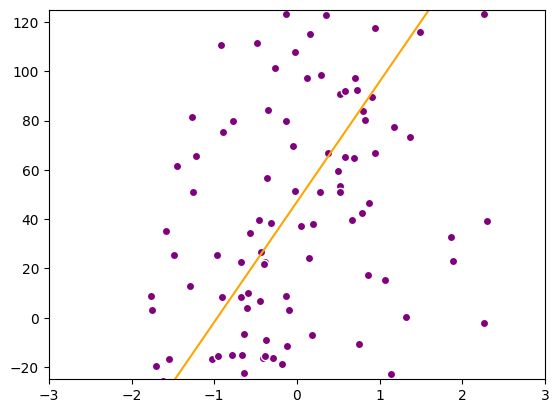

[61/200], loss: 45.01547693073692
[61/200], loss: 93.63252803049035
[61/200], loss: 211.86296667300127
[61/200], loss: 42.01508402850464
[61/200], loss: 78.25532611040923
[61/200], loss: 544.5663668339728
[61/200], loss: 440.44850021157106
[61/200], loss: 58.148052057153514
[61/200], loss: 606.1999704082357
[61/200], loss: 4.4366451795096244
[61/200], loss: 754.8225839705368
[61/200], loss: 28.808440320306797
[61/200], loss: 190.69914666360734
[61/200], loss: 19.784330408228094
[61/200], loss: 225.41716573272475
[61/200], loss: 1.6883886747161012
[61/200], loss: 399.36715448835423
[61/200], loss: 164.74518833830783
[61/200], loss: 0.8571024024094271
[61/200], loss: 17.706603673499295
[61/200], loss: 700.5836215682465
[61/200], loss: 0.9364279971122407
[61/200], loss: 263.58134558718683
[61/200], loss: 176.60273757628497
[61/200], loss: 385.5120946754591
[61/200], loss: 421.5481664049134
[61/200], loss: 279.08904569351677
[61/200], loss: 9.898317359182514
[61/200], loss: 2.9200279183532

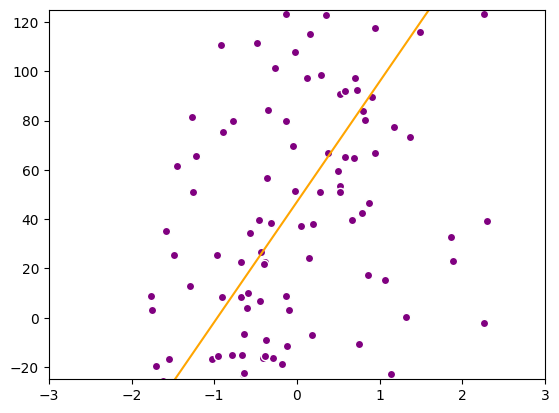

[62/200], loss: 45.01547693073746
[62/200], loss: 93.63252803049035
[62/200], loss: 211.86296667300127
[62/200], loss: 42.01508402850464
[62/200], loss: 78.25532611040941
[62/200], loss: 544.566366833973
[62/200], loss: 440.4485002115713
[62/200], loss: 58.148052057153514
[62/200], loss: 606.1999704082357
[62/200], loss: 4.436645179509667
[62/200], loss: 754.8225839705374
[62/200], loss: 28.808440320306687
[62/200], loss: 190.69914666360748
[62/200], loss: 19.784330408228094
[62/200], loss: 225.41716573272475
[62/200], loss: 1.6883886747161274
[62/200], loss: 399.3671544883544
[62/200], loss: 164.74518833830783
[62/200], loss: 0.8571024024094271
[62/200], loss: 17.706603673499295
[62/200], loss: 700.583621568247
[62/200], loss: 0.9364279971122407
[62/200], loss: 263.58134558718683
[62/200], loss: 176.60273757628482
[62/200], loss: 385.5120946754591
[62/200], loss: 421.5481664049134
[62/200], loss: 279.0890456935171
[62/200], loss: 9.898317359182498
[62/200], loss: 2.9200279183532962
[6

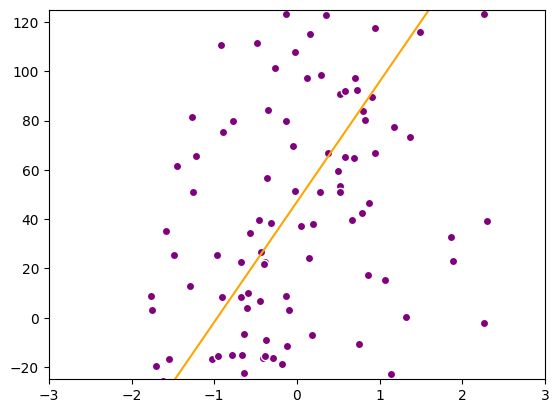

[63/200], loss: 45.01547693073692
[63/200], loss: 93.63252803049035
[63/200], loss: 211.86296667300127
[63/200], loss: 42.01508402850464
[63/200], loss: 78.25532611040923
[63/200], loss: 544.5663668339728
[63/200], loss: 440.44850021157106
[63/200], loss: 58.148052057153514
[63/200], loss: 606.1999704082357
[63/200], loss: 4.4366451795096244
[63/200], loss: 754.8225839705368
[63/200], loss: 28.808440320306797
[63/200], loss: 190.69914666360734
[63/200], loss: 19.784330408228094
[63/200], loss: 225.41716573272475
[63/200], loss: 1.6883886747161012
[63/200], loss: 399.36715448835423
[63/200], loss: 164.74518833830783
[63/200], loss: 0.8571024024094271
[63/200], loss: 17.706603673499295
[63/200], loss: 700.5836215682465
[63/200], loss: 0.9364279971122407
[63/200], loss: 263.58134558718683
[63/200], loss: 176.60273757628497
[63/200], loss: 385.5120946754591
[63/200], loss: 421.5481664049134
[63/200], loss: 279.08904569351677
[63/200], loss: 9.898317359182514
[63/200], loss: 2.9200279183532

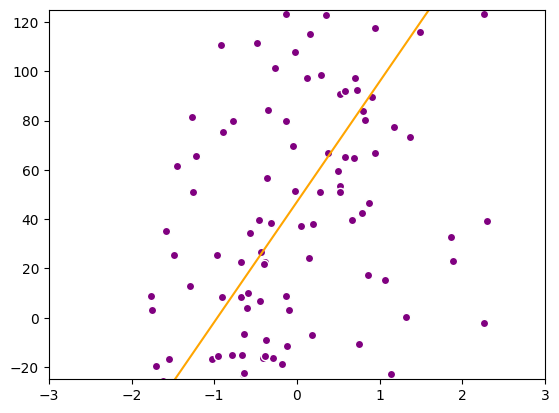

[64/200], loss: 45.01547693073746
[64/200], loss: 93.63252803049035
[64/200], loss: 211.86296667300127
[64/200], loss: 42.01508402850464
[64/200], loss: 78.25532611040941
[64/200], loss: 544.566366833973
[64/200], loss: 440.4485002115713
[64/200], loss: 58.148052057153514
[64/200], loss: 606.1999704082357
[64/200], loss: 4.436645179509667
[64/200], loss: 754.8225839705374
[64/200], loss: 28.808440320306687
[64/200], loss: 190.69914666360748
[64/200], loss: 19.784330408228094
[64/200], loss: 225.41716573272475
[64/200], loss: 1.6883886747161274
[64/200], loss: 399.3671544883544
[64/200], loss: 164.74518833830783
[64/200], loss: 0.8571024024094271
[64/200], loss: 17.706603673499295
[64/200], loss: 700.583621568247
[64/200], loss: 0.9364279971122407
[64/200], loss: 263.58134558718683
[64/200], loss: 176.60273757628482
[64/200], loss: 385.5120946754591
[64/200], loss: 421.5481664049134
[64/200], loss: 279.0890456935171
[64/200], loss: 9.898317359182498
[64/200], loss: 2.9200279183532962
[6

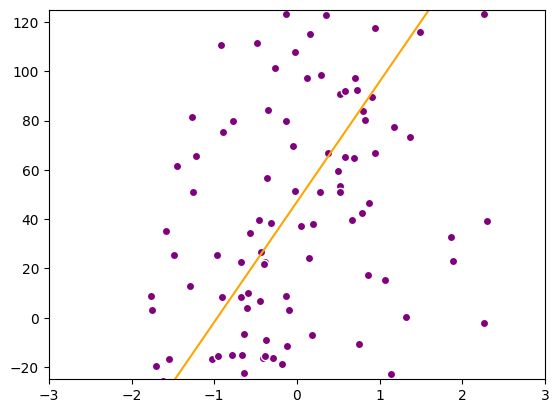

[65/200], loss: 45.01547693073692
[65/200], loss: 93.63252803049035
[65/200], loss: 211.86296667300127
[65/200], loss: 42.01508402850464
[65/200], loss: 78.25532611040923
[65/200], loss: 544.5663668339728
[65/200], loss: 440.44850021157106
[65/200], loss: 58.148052057153514
[65/200], loss: 606.1999704082357
[65/200], loss: 4.4366451795096244
[65/200], loss: 754.8225839705368
[65/200], loss: 28.808440320306797
[65/200], loss: 190.69914666360734
[65/200], loss: 19.784330408228094
[65/200], loss: 225.41716573272475
[65/200], loss: 1.6883886747161012
[65/200], loss: 399.36715448835423
[65/200], loss: 164.74518833830783
[65/200], loss: 0.8571024024094271
[65/200], loss: 17.706603673499295
[65/200], loss: 700.5836215682465
[65/200], loss: 0.9364279971122407
[65/200], loss: 263.58134558718683
[65/200], loss: 176.60273757628497
[65/200], loss: 385.5120946754591
[65/200], loss: 421.5481664049134
[65/200], loss: 279.08904569351677
[65/200], loss: 9.898317359182514
[65/200], loss: 2.9200279183532

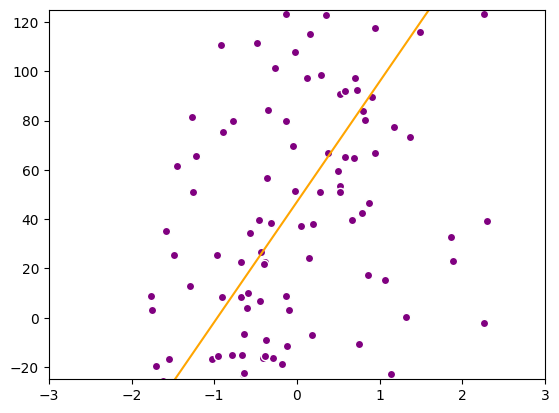

[66/200], loss: 45.01547693073746
[66/200], loss: 93.63252803049035
[66/200], loss: 211.86296667300127
[66/200], loss: 42.01508402850464
[66/200], loss: 78.25532611040941
[66/200], loss: 544.566366833973
[66/200], loss: 440.4485002115713
[66/200], loss: 58.148052057153514
[66/200], loss: 606.1999704082357
[66/200], loss: 4.436645179509667
[66/200], loss: 754.8225839705374
[66/200], loss: 28.808440320306687
[66/200], loss: 190.69914666360748
[66/200], loss: 19.784330408228094
[66/200], loss: 225.41716573272475
[66/200], loss: 1.6883886747161274
[66/200], loss: 399.3671544883544
[66/200], loss: 164.74518833830783
[66/200], loss: 0.8571024024094271
[66/200], loss: 17.706603673499295
[66/200], loss: 700.583621568247
[66/200], loss: 0.9364279971122407
[66/200], loss: 263.58134558718683
[66/200], loss: 176.60273757628482
[66/200], loss: 385.5120946754591
[66/200], loss: 421.5481664049134
[66/200], loss: 279.0890456935171
[66/200], loss: 9.898317359182498
[66/200], loss: 2.9200279183532962
[6

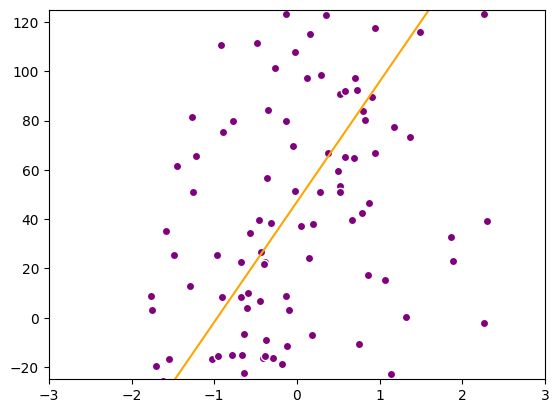

[67/200], loss: 45.01547693073692
[67/200], loss: 93.63252803049035
[67/200], loss: 211.86296667300127
[67/200], loss: 42.01508402850464
[67/200], loss: 78.25532611040923
[67/200], loss: 544.5663668339728
[67/200], loss: 440.44850021157106
[67/200], loss: 58.148052057153514
[67/200], loss: 606.1999704082357
[67/200], loss: 4.4366451795096244
[67/200], loss: 754.8225839705368
[67/200], loss: 28.808440320306797
[67/200], loss: 190.69914666360734
[67/200], loss: 19.784330408228094
[67/200], loss: 225.41716573272475
[67/200], loss: 1.6883886747161012
[67/200], loss: 399.36715448835423
[67/200], loss: 164.74518833830783
[67/200], loss: 0.8571024024094271
[67/200], loss: 17.706603673499295
[67/200], loss: 700.5836215682465
[67/200], loss: 0.9364279971122407
[67/200], loss: 263.58134558718683
[67/200], loss: 176.60273757628497
[67/200], loss: 385.5120946754591
[67/200], loss: 421.5481664049134
[67/200], loss: 279.08904569351677
[67/200], loss: 9.898317359182514
[67/200], loss: 2.9200279183532

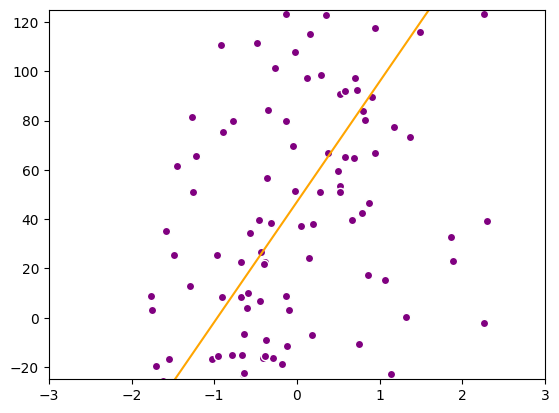

[68/200], loss: 45.01547693073746
[68/200], loss: 93.63252803049035
[68/200], loss: 211.86296667300127
[68/200], loss: 42.01508402850464
[68/200], loss: 78.25532611040941
[68/200], loss: 544.566366833973
[68/200], loss: 440.4485002115713
[68/200], loss: 58.148052057153514
[68/200], loss: 606.1999704082357
[68/200], loss: 4.436645179509667
[68/200], loss: 754.8225839705374
[68/200], loss: 28.808440320306687
[68/200], loss: 190.69914666360748
[68/200], loss: 19.784330408228094
[68/200], loss: 225.41716573272475
[68/200], loss: 1.6883886747161274
[68/200], loss: 399.3671544883544
[68/200], loss: 164.74518833830783
[68/200], loss: 0.8571024024094271
[68/200], loss: 17.706603673499295
[68/200], loss: 700.583621568247
[68/200], loss: 0.9364279971122407
[68/200], loss: 263.58134558718683
[68/200], loss: 176.60273757628482
[68/200], loss: 385.5120946754591
[68/200], loss: 421.5481664049134
[68/200], loss: 279.0890456935171
[68/200], loss: 9.898317359182498
[68/200], loss: 2.9200279183532962
[6

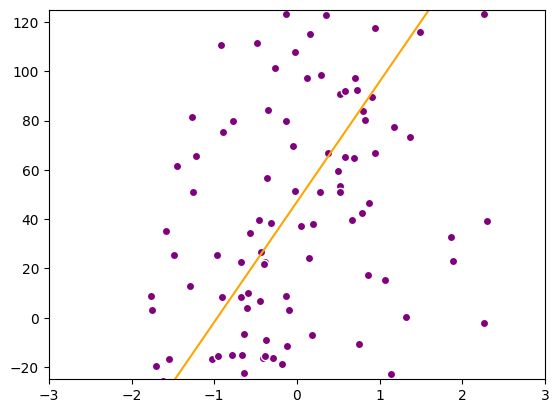

[69/200], loss: 45.01547693073692
[69/200], loss: 93.63252803049035
[69/200], loss: 211.86296667300127
[69/200], loss: 42.01508402850464
[69/200], loss: 78.25532611040923
[69/200], loss: 544.5663668339728
[69/200], loss: 440.44850021157106
[69/200], loss: 58.148052057153514
[69/200], loss: 606.1999704082357
[69/200], loss: 4.4366451795096244
[69/200], loss: 754.8225839705368
[69/200], loss: 28.808440320306797
[69/200], loss: 190.69914666360734
[69/200], loss: 19.784330408228094
[69/200], loss: 225.41716573272475
[69/200], loss: 1.6883886747161012
[69/200], loss: 399.36715448835423
[69/200], loss: 164.74518833830783
[69/200], loss: 0.8571024024094271
[69/200], loss: 17.706603673499295
[69/200], loss: 700.5836215682465
[69/200], loss: 0.9364279971122407
[69/200], loss: 263.58134558718683
[69/200], loss: 176.60273757628497
[69/200], loss: 385.5120946754591
[69/200], loss: 421.5481664049134
[69/200], loss: 279.08904569351677
[69/200], loss: 9.898317359182514
[69/200], loss: 2.9200279183532

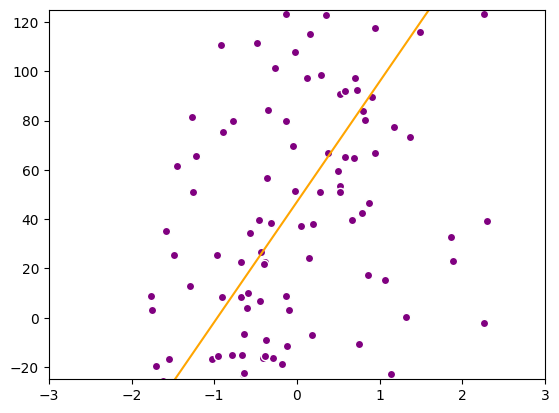

[70/200], loss: 45.01547693073746
[70/200], loss: 93.63252803049035
[70/200], loss: 211.86296667300127
[70/200], loss: 42.01508402850464
[70/200], loss: 78.25532611040941
[70/200], loss: 544.566366833973
[70/200], loss: 440.4485002115713
[70/200], loss: 58.148052057153514
[70/200], loss: 606.1999704082357
[70/200], loss: 4.436645179509667
[70/200], loss: 754.8225839705374
[70/200], loss: 28.808440320306687
[70/200], loss: 190.69914666360748
[70/200], loss: 19.784330408228094
[70/200], loss: 225.41716573272475
[70/200], loss: 1.6883886747161274
[70/200], loss: 399.3671544883544
[70/200], loss: 164.74518833830783
[70/200], loss: 0.8571024024094271
[70/200], loss: 17.706603673499295
[70/200], loss: 700.583621568247
[70/200], loss: 0.9364279971122407
[70/200], loss: 263.58134558718683
[70/200], loss: 176.60273757628482
[70/200], loss: 385.5120946754591
[70/200], loss: 421.5481664049134
[70/200], loss: 279.0890456935171
[70/200], loss: 9.898317359182498
[70/200], loss: 2.9200279183532962
[7

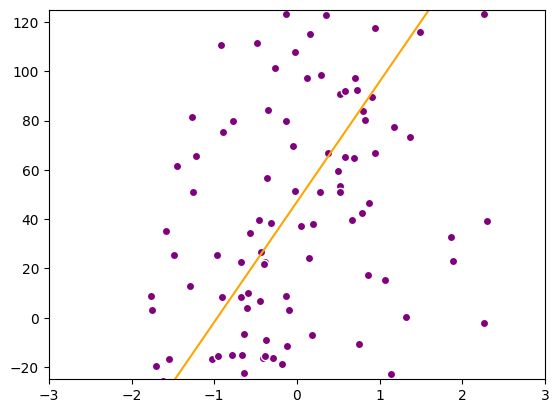

[71/200], loss: 45.01547693073692
[71/200], loss: 93.63252803049035
[71/200], loss: 211.86296667300127
[71/200], loss: 42.01508402850464
[71/200], loss: 78.25532611040923
[71/200], loss: 544.5663668339728
[71/200], loss: 440.44850021157106
[71/200], loss: 58.148052057153514
[71/200], loss: 606.1999704082357
[71/200], loss: 4.4366451795096244
[71/200], loss: 754.8225839705368
[71/200], loss: 28.808440320306797
[71/200], loss: 190.69914666360734
[71/200], loss: 19.784330408228094
[71/200], loss: 225.41716573272475
[71/200], loss: 1.6883886747161012
[71/200], loss: 399.36715448835423
[71/200], loss: 164.74518833830783
[71/200], loss: 0.8571024024094271
[71/200], loss: 17.706603673499295
[71/200], loss: 700.5836215682465
[71/200], loss: 0.9364279971122407
[71/200], loss: 263.58134558718683
[71/200], loss: 176.60273757628497
[71/200], loss: 385.5120946754591
[71/200], loss: 421.5481664049134
[71/200], loss: 279.08904569351677
[71/200], loss: 9.898317359182514
[71/200], loss: 2.9200279183532

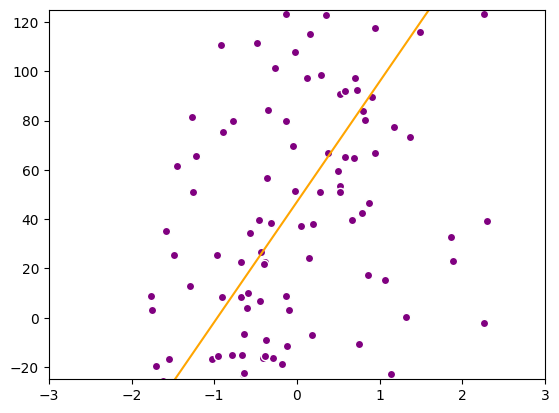

[72/200], loss: 45.01547693073746
[72/200], loss: 93.63252803049035
[72/200], loss: 211.86296667300127
[72/200], loss: 42.01508402850464
[72/200], loss: 78.25532611040941
[72/200], loss: 544.566366833973
[72/200], loss: 440.4485002115713
[72/200], loss: 58.148052057153514
[72/200], loss: 606.1999704082357
[72/200], loss: 4.436645179509667
[72/200], loss: 754.8225839705374
[72/200], loss: 28.808440320306687
[72/200], loss: 190.69914666360748
[72/200], loss: 19.784330408228094
[72/200], loss: 225.41716573272475
[72/200], loss: 1.6883886747161274
[72/200], loss: 399.3671544883544
[72/200], loss: 164.74518833830783
[72/200], loss: 0.8571024024094271
[72/200], loss: 17.706603673499295
[72/200], loss: 700.583621568247
[72/200], loss: 0.9364279971122407
[72/200], loss: 263.58134558718683
[72/200], loss: 176.60273757628482
[72/200], loss: 385.5120946754591
[72/200], loss: 421.5481664049134
[72/200], loss: 279.0890456935171
[72/200], loss: 9.898317359182498
[72/200], loss: 2.9200279183532962
[7

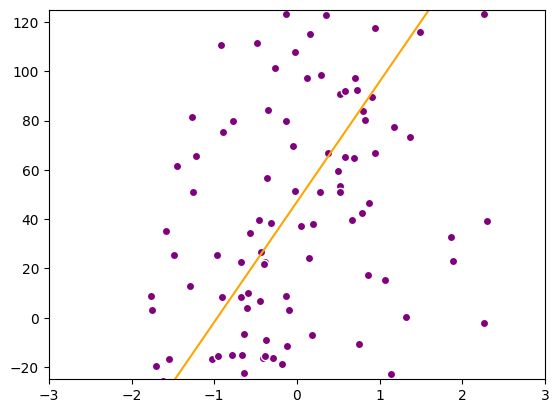

[73/200], loss: 45.01547693073692
[73/200], loss: 93.63252803049035
[73/200], loss: 211.86296667300127
[73/200], loss: 42.01508402850464
[73/200], loss: 78.25532611040923
[73/200], loss: 544.5663668339728
[73/200], loss: 440.44850021157106
[73/200], loss: 58.148052057153514
[73/200], loss: 606.1999704082357
[73/200], loss: 4.4366451795096244
[73/200], loss: 754.8225839705368
[73/200], loss: 28.808440320306797
[73/200], loss: 190.69914666360734
[73/200], loss: 19.784330408228094
[73/200], loss: 225.41716573272475
[73/200], loss: 1.6883886747161012
[73/200], loss: 399.36715448835423
[73/200], loss: 164.74518833830783
[73/200], loss: 0.8571024024094271
[73/200], loss: 17.706603673499295
[73/200], loss: 700.5836215682465
[73/200], loss: 0.9364279971122407
[73/200], loss: 263.58134558718683
[73/200], loss: 176.60273757628497
[73/200], loss: 385.5120946754591
[73/200], loss: 421.5481664049134
[73/200], loss: 279.08904569351677
[73/200], loss: 9.898317359182514
[73/200], loss: 2.9200279183532

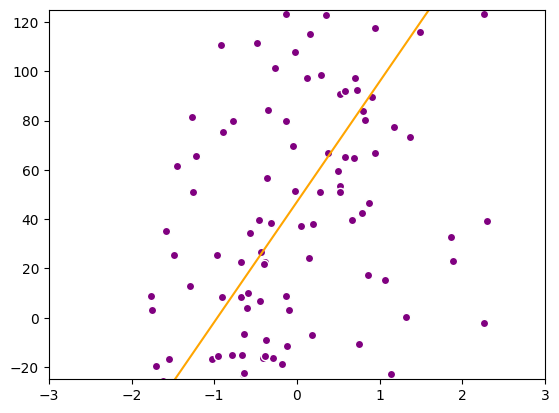

[74/200], loss: 45.01547693073746
[74/200], loss: 93.63252803049035
[74/200], loss: 211.86296667300127
[74/200], loss: 42.01508402850464
[74/200], loss: 78.25532611040941
[74/200], loss: 544.566366833973
[74/200], loss: 440.4485002115713
[74/200], loss: 58.148052057153514
[74/200], loss: 606.1999704082357
[74/200], loss: 4.436645179509667
[74/200], loss: 754.8225839705374
[74/200], loss: 28.808440320306687
[74/200], loss: 190.69914666360748
[74/200], loss: 19.784330408228094
[74/200], loss: 225.41716573272475
[74/200], loss: 1.6883886747161274
[74/200], loss: 399.3671544883544
[74/200], loss: 164.74518833830783
[74/200], loss: 0.8571024024094271
[74/200], loss: 17.706603673499295
[74/200], loss: 700.583621568247
[74/200], loss: 0.9364279971122407
[74/200], loss: 263.58134558718683
[74/200], loss: 176.60273757628482
[74/200], loss: 385.5120946754591
[74/200], loss: 421.5481664049134
[74/200], loss: 279.0890456935171
[74/200], loss: 9.898317359182498
[74/200], loss: 2.9200279183532962
[7

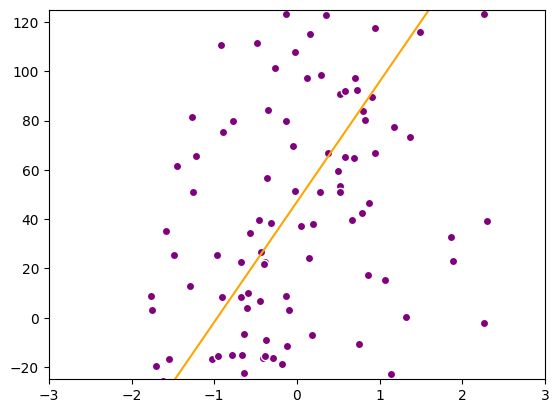

[75/200], loss: 45.01547693073692
[75/200], loss: 93.63252803049035
[75/200], loss: 211.86296667300127
[75/200], loss: 42.01508402850464
[75/200], loss: 78.25532611040923
[75/200], loss: 544.5663668339728
[75/200], loss: 440.44850021157106
[75/200], loss: 58.148052057153514
[75/200], loss: 606.1999704082357
[75/200], loss: 4.4366451795096244
[75/200], loss: 754.8225839705368
[75/200], loss: 28.808440320306797
[75/200], loss: 190.69914666360734
[75/200], loss: 19.784330408228094
[75/200], loss: 225.41716573272475
[75/200], loss: 1.6883886747161012
[75/200], loss: 399.36715448835423
[75/200], loss: 164.74518833830783
[75/200], loss: 0.8571024024094271
[75/200], loss: 17.706603673499295
[75/200], loss: 700.5836215682465
[75/200], loss: 0.9364279971122407
[75/200], loss: 263.58134558718683
[75/200], loss: 176.60273757628497
[75/200], loss: 385.5120946754591
[75/200], loss: 421.5481664049134
[75/200], loss: 279.08904569351677
[75/200], loss: 9.898317359182514
[75/200], loss: 2.9200279183532

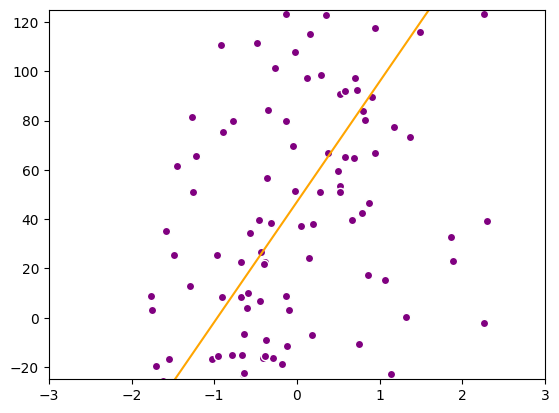

[76/200], loss: 45.01547693073746
[76/200], loss: 93.63252803049035
[76/200], loss: 211.86296667300127
[76/200], loss: 42.01508402850464
[76/200], loss: 78.25532611040941
[76/200], loss: 544.566366833973
[76/200], loss: 440.4485002115713
[76/200], loss: 58.148052057153514
[76/200], loss: 606.1999704082357
[76/200], loss: 4.436645179509667
[76/200], loss: 754.8225839705374
[76/200], loss: 28.808440320306687
[76/200], loss: 190.69914666360748
[76/200], loss: 19.784330408228094
[76/200], loss: 225.41716573272475
[76/200], loss: 1.6883886747161274
[76/200], loss: 399.3671544883544
[76/200], loss: 164.74518833830783
[76/200], loss: 0.8571024024094271
[76/200], loss: 17.706603673499295
[76/200], loss: 700.583621568247
[76/200], loss: 0.9364279971122407
[76/200], loss: 263.58134558718683
[76/200], loss: 176.60273757628482
[76/200], loss: 385.5120946754591
[76/200], loss: 421.5481664049134
[76/200], loss: 279.0890456935171
[76/200], loss: 9.898317359182498
[76/200], loss: 2.9200279183532962
[7

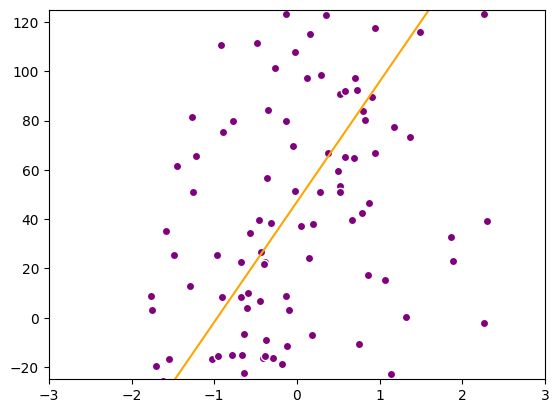

[77/200], loss: 45.01547693073692
[77/200], loss: 93.63252803049035
[77/200], loss: 211.86296667300127
[77/200], loss: 42.01508402850464
[77/200], loss: 78.25532611040923
[77/200], loss: 544.5663668339728
[77/200], loss: 440.44850021157106
[77/200], loss: 58.148052057153514
[77/200], loss: 606.1999704082357
[77/200], loss: 4.4366451795096244
[77/200], loss: 754.8225839705368
[77/200], loss: 28.808440320306797
[77/200], loss: 190.69914666360734
[77/200], loss: 19.784330408228094
[77/200], loss: 225.41716573272475
[77/200], loss: 1.6883886747161012
[77/200], loss: 399.36715448835423
[77/200], loss: 164.74518833830783
[77/200], loss: 0.8571024024094271
[77/200], loss: 17.706603673499295
[77/200], loss: 700.5836215682465
[77/200], loss: 0.9364279971122407
[77/200], loss: 263.58134558718683
[77/200], loss: 176.60273757628497
[77/200], loss: 385.5120946754591
[77/200], loss: 421.5481664049134
[77/200], loss: 279.08904569351677
[77/200], loss: 9.898317359182514
[77/200], loss: 2.9200279183532

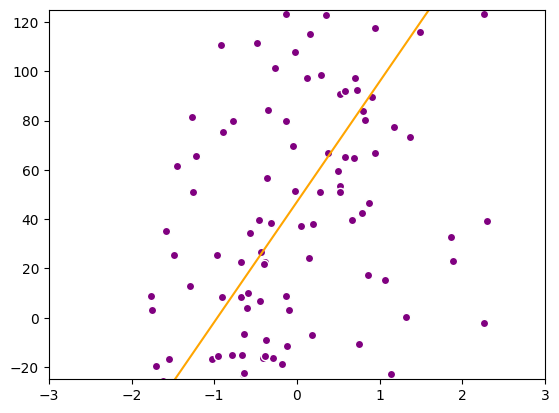

[78/200], loss: 45.01547693073746
[78/200], loss: 93.63252803049035
[78/200], loss: 211.86296667300127
[78/200], loss: 42.01508402850464
[78/200], loss: 78.25532611040941
[78/200], loss: 544.566366833973
[78/200], loss: 440.4485002115713
[78/200], loss: 58.148052057153514
[78/200], loss: 606.1999704082357
[78/200], loss: 4.436645179509667
[78/200], loss: 754.8225839705374
[78/200], loss: 28.808440320306687
[78/200], loss: 190.69914666360748
[78/200], loss: 19.784330408228094
[78/200], loss: 225.41716573272475
[78/200], loss: 1.6883886747161274
[78/200], loss: 399.3671544883544
[78/200], loss: 164.74518833830783
[78/200], loss: 0.8571024024094271
[78/200], loss: 17.706603673499295
[78/200], loss: 700.583621568247
[78/200], loss: 0.9364279971122407
[78/200], loss: 263.58134558718683
[78/200], loss: 176.60273757628482
[78/200], loss: 385.5120946754591
[78/200], loss: 421.5481664049134
[78/200], loss: 279.0890456935171
[78/200], loss: 9.898317359182498
[78/200], loss: 2.9200279183532962
[7

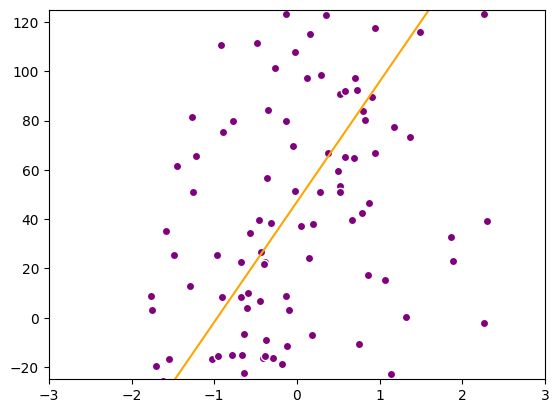

[79/200], loss: 45.01547693073692
[79/200], loss: 93.63252803049035
[79/200], loss: 211.86296667300127
[79/200], loss: 42.01508402850464
[79/200], loss: 78.25532611040923
[79/200], loss: 544.5663668339728
[79/200], loss: 440.44850021157106
[79/200], loss: 58.148052057153514
[79/200], loss: 606.1999704082357
[79/200], loss: 4.4366451795096244
[79/200], loss: 754.8225839705368
[79/200], loss: 28.808440320306797
[79/200], loss: 190.69914666360734
[79/200], loss: 19.784330408228094
[79/200], loss: 225.41716573272475
[79/200], loss: 1.6883886747161012
[79/200], loss: 399.36715448835423
[79/200], loss: 164.74518833830783
[79/200], loss: 0.8571024024094271
[79/200], loss: 17.706603673499295
[79/200], loss: 700.5836215682465
[79/200], loss: 0.9364279971122407
[79/200], loss: 263.58134558718683
[79/200], loss: 176.60273757628497
[79/200], loss: 385.5120946754591
[79/200], loss: 421.5481664049134
[79/200], loss: 279.08904569351677
[79/200], loss: 9.898317359182514
[79/200], loss: 2.9200279183532

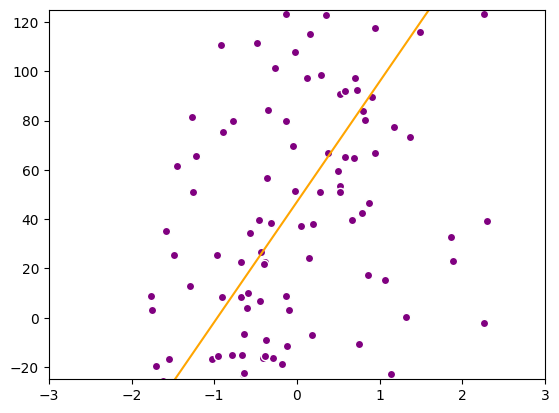

[80/200], loss: 45.01547693073746
[80/200], loss: 93.63252803049035
[80/200], loss: 211.86296667300127
[80/200], loss: 42.01508402850464
[80/200], loss: 78.25532611040941
[80/200], loss: 544.566366833973
[80/200], loss: 440.4485002115713
[80/200], loss: 58.148052057153514
[80/200], loss: 606.1999704082357
[80/200], loss: 4.436645179509667
[80/200], loss: 754.8225839705374
[80/200], loss: 28.808440320306687
[80/200], loss: 190.69914666360748
[80/200], loss: 19.784330408228094
[80/200], loss: 225.41716573272475
[80/200], loss: 1.6883886747161274
[80/200], loss: 399.3671544883544
[80/200], loss: 164.74518833830783
[80/200], loss: 0.8571024024094271
[80/200], loss: 17.706603673499295
[80/200], loss: 700.583621568247
[80/200], loss: 0.9364279971122407
[80/200], loss: 263.58134558718683
[80/200], loss: 176.60273757628482
[80/200], loss: 385.5120946754591
[80/200], loss: 421.5481664049134
[80/200], loss: 279.0890456935171
[80/200], loss: 9.898317359182498
[80/200], loss: 2.9200279183532962
[8

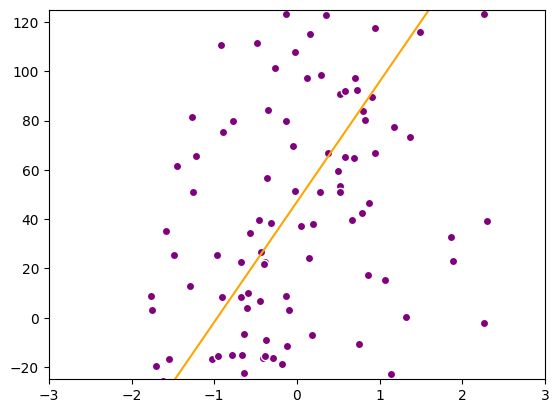

[81/200], loss: 45.01547693073692
[81/200], loss: 93.63252803049035
[81/200], loss: 211.86296667300127
[81/200], loss: 42.01508402850464
[81/200], loss: 78.25532611040923
[81/200], loss: 544.5663668339728
[81/200], loss: 440.44850021157106
[81/200], loss: 58.148052057153514
[81/200], loss: 606.1999704082357
[81/200], loss: 4.4366451795096244
[81/200], loss: 754.8225839705368
[81/200], loss: 28.808440320306797
[81/200], loss: 190.69914666360734
[81/200], loss: 19.784330408228094
[81/200], loss: 225.41716573272475
[81/200], loss: 1.6883886747161012
[81/200], loss: 399.36715448835423
[81/200], loss: 164.74518833830783
[81/200], loss: 0.8571024024094271
[81/200], loss: 17.706603673499295
[81/200], loss: 700.5836215682465
[81/200], loss: 0.9364279971122407
[81/200], loss: 263.58134558718683
[81/200], loss: 176.60273757628497
[81/200], loss: 385.5120946754591
[81/200], loss: 421.5481664049134
[81/200], loss: 279.08904569351677
[81/200], loss: 9.898317359182514
[81/200], loss: 2.9200279183532

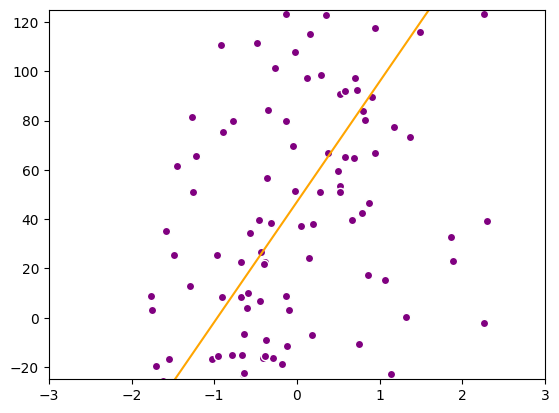

[82/200], loss: 45.01547693073746
[82/200], loss: 93.63252803049035
[82/200], loss: 211.86296667300127
[82/200], loss: 42.01508402850464
[82/200], loss: 78.25532611040941
[82/200], loss: 544.566366833973
[82/200], loss: 440.4485002115713
[82/200], loss: 58.148052057153514
[82/200], loss: 606.1999704082357
[82/200], loss: 4.436645179509667
[82/200], loss: 754.8225839705374
[82/200], loss: 28.808440320306687
[82/200], loss: 190.69914666360748
[82/200], loss: 19.784330408228094
[82/200], loss: 225.41716573272475
[82/200], loss: 1.6883886747161274
[82/200], loss: 399.3671544883544
[82/200], loss: 164.74518833830783
[82/200], loss: 0.8571024024094271
[82/200], loss: 17.706603673499295
[82/200], loss: 700.583621568247
[82/200], loss: 0.9364279971122407
[82/200], loss: 263.58134558718683
[82/200], loss: 176.60273757628482
[82/200], loss: 385.5120946754591
[82/200], loss: 421.5481664049134
[82/200], loss: 279.0890456935171
[82/200], loss: 9.898317359182498
[82/200], loss: 2.9200279183532962
[8

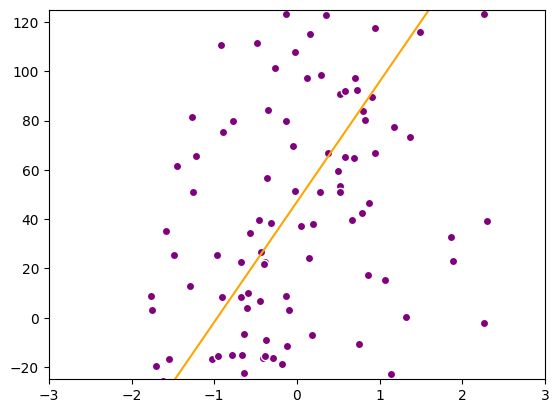

[83/200], loss: 45.01547693073692
[83/200], loss: 93.63252803049035
[83/200], loss: 211.86296667300127
[83/200], loss: 42.01508402850464
[83/200], loss: 78.25532611040923
[83/200], loss: 544.5663668339728
[83/200], loss: 440.44850021157106
[83/200], loss: 58.148052057153514
[83/200], loss: 606.1999704082357
[83/200], loss: 4.4366451795096244
[83/200], loss: 754.8225839705368
[83/200], loss: 28.808440320306797
[83/200], loss: 190.69914666360734
[83/200], loss: 19.784330408228094
[83/200], loss: 225.41716573272475
[83/200], loss: 1.6883886747161012
[83/200], loss: 399.36715448835423
[83/200], loss: 164.74518833830783
[83/200], loss: 0.8571024024094271
[83/200], loss: 17.706603673499295
[83/200], loss: 700.5836215682465
[83/200], loss: 0.9364279971122407
[83/200], loss: 263.58134558718683
[83/200], loss: 176.60273757628497
[83/200], loss: 385.5120946754591
[83/200], loss: 421.5481664049134
[83/200], loss: 279.08904569351677
[83/200], loss: 9.898317359182514
[83/200], loss: 2.9200279183532

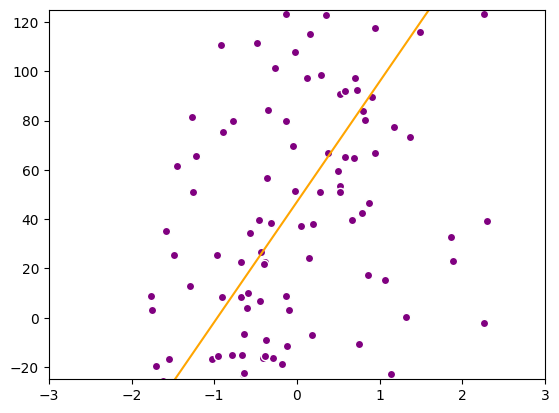

[84/200], loss: 45.01547693073746
[84/200], loss: 93.63252803049035
[84/200], loss: 211.86296667300127
[84/200], loss: 42.01508402850464
[84/200], loss: 78.25532611040941
[84/200], loss: 544.566366833973
[84/200], loss: 440.4485002115713
[84/200], loss: 58.148052057153514
[84/200], loss: 606.1999704082357
[84/200], loss: 4.436645179509667
[84/200], loss: 754.8225839705374
[84/200], loss: 28.808440320306687
[84/200], loss: 190.69914666360748
[84/200], loss: 19.784330408228094
[84/200], loss: 225.41716573272475
[84/200], loss: 1.6883886747161274
[84/200], loss: 399.3671544883544
[84/200], loss: 164.74518833830783
[84/200], loss: 0.8571024024094271
[84/200], loss: 17.706603673499295
[84/200], loss: 700.583621568247
[84/200], loss: 0.9364279971122407
[84/200], loss: 263.58134558718683
[84/200], loss: 176.60273757628482
[84/200], loss: 385.5120946754591
[84/200], loss: 421.5481664049134
[84/200], loss: 279.0890456935171
[84/200], loss: 9.898317359182498
[84/200], loss: 2.9200279183532962
[8

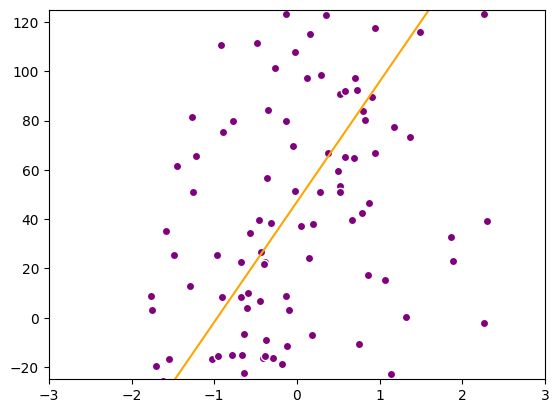

[85/200], loss: 45.01547693073692
[85/200], loss: 93.63252803049035
[85/200], loss: 211.86296667300127
[85/200], loss: 42.01508402850464
[85/200], loss: 78.25532611040923
[85/200], loss: 544.5663668339728
[85/200], loss: 440.44850021157106
[85/200], loss: 58.148052057153514
[85/200], loss: 606.1999704082357
[85/200], loss: 4.4366451795096244
[85/200], loss: 754.8225839705368
[85/200], loss: 28.808440320306797
[85/200], loss: 190.69914666360734
[85/200], loss: 19.784330408228094
[85/200], loss: 225.41716573272475
[85/200], loss: 1.6883886747161012
[85/200], loss: 399.36715448835423
[85/200], loss: 164.74518833830783
[85/200], loss: 0.8571024024094271
[85/200], loss: 17.706603673499295
[85/200], loss: 700.5836215682465
[85/200], loss: 0.9364279971122407
[85/200], loss: 263.58134558718683
[85/200], loss: 176.60273757628497
[85/200], loss: 385.5120946754591
[85/200], loss: 421.5481664049134
[85/200], loss: 279.08904569351677
[85/200], loss: 9.898317359182514
[85/200], loss: 2.9200279183532

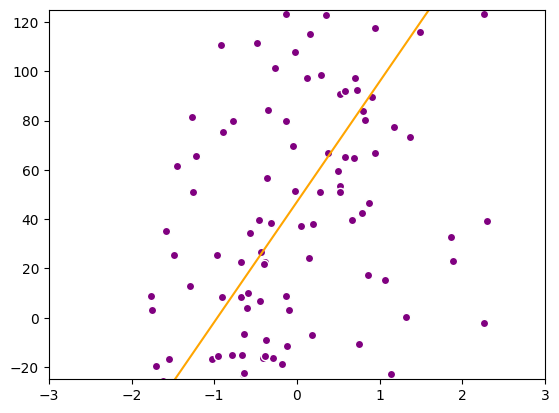

[86/200], loss: 45.01547693073746
[86/200], loss: 93.63252803049035
[86/200], loss: 211.86296667300127
[86/200], loss: 42.01508402850464
[86/200], loss: 78.25532611040941
[86/200], loss: 544.566366833973
[86/200], loss: 440.4485002115713
[86/200], loss: 58.148052057153514
[86/200], loss: 606.1999704082357
[86/200], loss: 4.436645179509667
[86/200], loss: 754.8225839705374
[86/200], loss: 28.808440320306687
[86/200], loss: 190.69914666360748
[86/200], loss: 19.784330408228094
[86/200], loss: 225.41716573272475
[86/200], loss: 1.6883886747161274
[86/200], loss: 399.3671544883544
[86/200], loss: 164.74518833830783
[86/200], loss: 0.8571024024094271
[86/200], loss: 17.706603673499295
[86/200], loss: 700.583621568247
[86/200], loss: 0.9364279971122407
[86/200], loss: 263.58134558718683
[86/200], loss: 176.60273757628482
[86/200], loss: 385.5120946754591
[86/200], loss: 421.5481664049134
[86/200], loss: 279.0890456935171
[86/200], loss: 9.898317359182498
[86/200], loss: 2.9200279183532962
[8

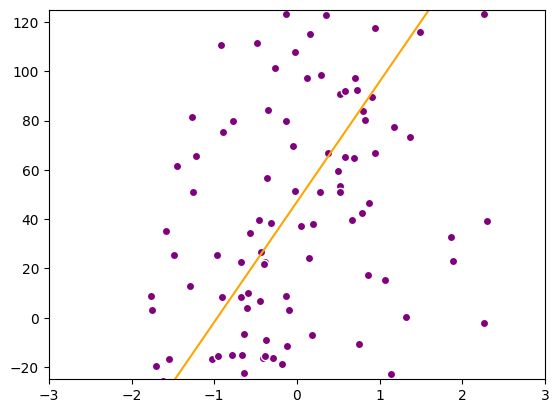

[87/200], loss: 45.01547693073692
[87/200], loss: 93.63252803049035
[87/200], loss: 211.86296667300127
[87/200], loss: 42.01508402850464
[87/200], loss: 78.25532611040923
[87/200], loss: 544.5663668339728
[87/200], loss: 440.44850021157106
[87/200], loss: 58.148052057153514
[87/200], loss: 606.1999704082357
[87/200], loss: 4.4366451795096244
[87/200], loss: 754.8225839705368
[87/200], loss: 28.808440320306797
[87/200], loss: 190.69914666360734
[87/200], loss: 19.784330408228094
[87/200], loss: 225.41716573272475
[87/200], loss: 1.6883886747161012
[87/200], loss: 399.36715448835423
[87/200], loss: 164.74518833830783
[87/200], loss: 0.8571024024094271
[87/200], loss: 17.706603673499295
[87/200], loss: 700.5836215682465
[87/200], loss: 0.9364279971122407
[87/200], loss: 263.58134558718683
[87/200], loss: 176.60273757628497
[87/200], loss: 385.5120946754591
[87/200], loss: 421.5481664049134
[87/200], loss: 279.08904569351677
[87/200], loss: 9.898317359182514
[87/200], loss: 2.9200279183532

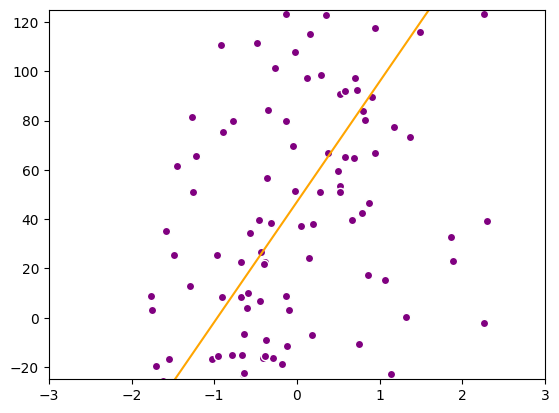

[88/200], loss: 45.01547693073746
[88/200], loss: 93.63252803049035
[88/200], loss: 211.86296667300127
[88/200], loss: 42.01508402850464
[88/200], loss: 78.25532611040941
[88/200], loss: 544.566366833973
[88/200], loss: 440.4485002115713
[88/200], loss: 58.148052057153514
[88/200], loss: 606.1999704082357
[88/200], loss: 4.436645179509667
[88/200], loss: 754.8225839705374
[88/200], loss: 28.808440320306687
[88/200], loss: 190.69914666360748
[88/200], loss: 19.784330408228094
[88/200], loss: 225.41716573272475
[88/200], loss: 1.6883886747161274
[88/200], loss: 399.3671544883544
[88/200], loss: 164.74518833830783
[88/200], loss: 0.8571024024094271
[88/200], loss: 17.706603673499295
[88/200], loss: 700.583621568247
[88/200], loss: 0.9364279971122407
[88/200], loss: 263.58134558718683
[88/200], loss: 176.60273757628482
[88/200], loss: 385.5120946754591
[88/200], loss: 421.5481664049134
[88/200], loss: 279.0890456935171
[88/200], loss: 9.898317359182498
[88/200], loss: 2.9200279183532962
[8

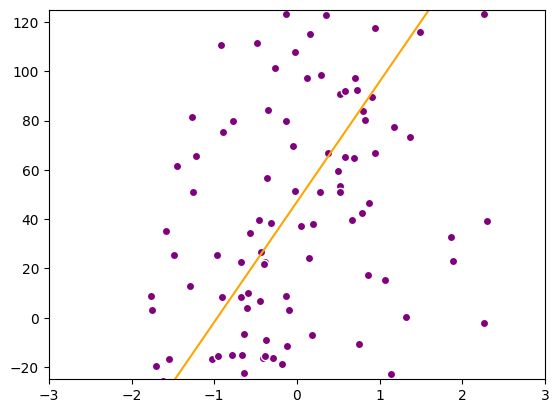

[89/200], loss: 45.01547693073692
[89/200], loss: 93.63252803049035
[89/200], loss: 211.86296667300127
[89/200], loss: 42.01508402850464
[89/200], loss: 78.25532611040923
[89/200], loss: 544.5663668339728
[89/200], loss: 440.44850021157106
[89/200], loss: 58.148052057153514
[89/200], loss: 606.1999704082357
[89/200], loss: 4.4366451795096244
[89/200], loss: 754.8225839705368
[89/200], loss: 28.808440320306797
[89/200], loss: 190.69914666360734
[89/200], loss: 19.784330408228094
[89/200], loss: 225.41716573272475
[89/200], loss: 1.6883886747161012
[89/200], loss: 399.36715448835423
[89/200], loss: 164.74518833830783
[89/200], loss: 0.8571024024094271
[89/200], loss: 17.706603673499295
[89/200], loss: 700.5836215682465
[89/200], loss: 0.9364279971122407
[89/200], loss: 263.58134558718683
[89/200], loss: 176.60273757628497
[89/200], loss: 385.5120946754591
[89/200], loss: 421.5481664049134
[89/200], loss: 279.08904569351677
[89/200], loss: 9.898317359182514
[89/200], loss: 2.9200279183532

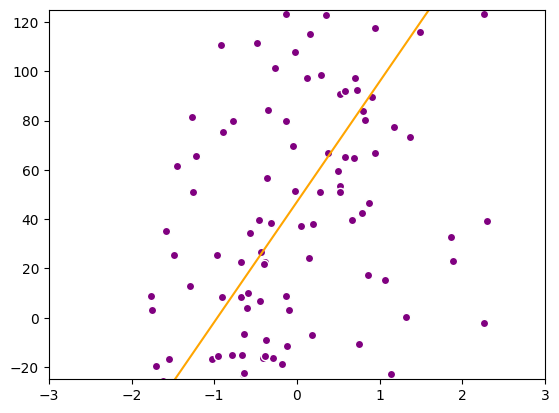

[90/200], loss: 45.01547693073746
[90/200], loss: 93.63252803049035
[90/200], loss: 211.86296667300127
[90/200], loss: 42.01508402850464
[90/200], loss: 78.25532611040941
[90/200], loss: 544.566366833973
[90/200], loss: 440.4485002115713
[90/200], loss: 58.148052057153514
[90/200], loss: 606.1999704082357
[90/200], loss: 4.436645179509667
[90/200], loss: 754.8225839705374
[90/200], loss: 28.808440320306687
[90/200], loss: 190.69914666360748
[90/200], loss: 19.784330408228094
[90/200], loss: 225.41716573272475
[90/200], loss: 1.6883886747161274
[90/200], loss: 399.3671544883544
[90/200], loss: 164.74518833830783
[90/200], loss: 0.8571024024094271
[90/200], loss: 17.706603673499295
[90/200], loss: 700.583621568247
[90/200], loss: 0.9364279971122407
[90/200], loss: 263.58134558718683
[90/200], loss: 176.60273757628482
[90/200], loss: 385.5120946754591
[90/200], loss: 421.5481664049134
[90/200], loss: 279.0890456935171
[90/200], loss: 9.898317359182498
[90/200], loss: 2.9200279183532962
[9

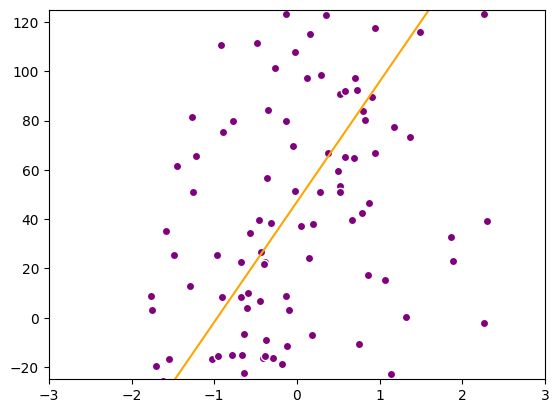

[91/200], loss: 45.01547693073692
[91/200], loss: 93.63252803049035
[91/200], loss: 211.86296667300127
[91/200], loss: 42.01508402850464
[91/200], loss: 78.25532611040923
[91/200], loss: 544.5663668339728
[91/200], loss: 440.44850021157106
[91/200], loss: 58.148052057153514
[91/200], loss: 606.1999704082357
[91/200], loss: 4.4366451795096244
[91/200], loss: 754.8225839705368
[91/200], loss: 28.808440320306797
[91/200], loss: 190.69914666360734
[91/200], loss: 19.784330408228094
[91/200], loss: 225.41716573272475
[91/200], loss: 1.6883886747161012
[91/200], loss: 399.36715448835423
[91/200], loss: 164.74518833830783
[91/200], loss: 0.8571024024094271
[91/200], loss: 17.706603673499295
[91/200], loss: 700.5836215682465
[91/200], loss: 0.9364279971122407
[91/200], loss: 263.58134558718683
[91/200], loss: 176.60273757628497
[91/200], loss: 385.5120946754591
[91/200], loss: 421.5481664049134
[91/200], loss: 279.08904569351677
[91/200], loss: 9.898317359182514
[91/200], loss: 2.9200279183532

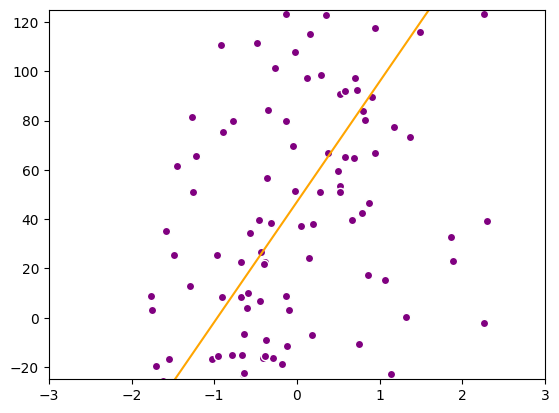

[92/200], loss: 45.01547693073746
[92/200], loss: 93.63252803049035
[92/200], loss: 211.86296667300127
[92/200], loss: 42.01508402850464
[92/200], loss: 78.25532611040941
[92/200], loss: 544.566366833973
[92/200], loss: 440.4485002115713
[92/200], loss: 58.148052057153514
[92/200], loss: 606.1999704082357
[92/200], loss: 4.436645179509667
[92/200], loss: 754.8225839705374
[92/200], loss: 28.808440320306687
[92/200], loss: 190.69914666360748
[92/200], loss: 19.784330408228094
[92/200], loss: 225.41716573272475
[92/200], loss: 1.6883886747161274
[92/200], loss: 399.3671544883544
[92/200], loss: 164.74518833830783
[92/200], loss: 0.8571024024094271
[92/200], loss: 17.706603673499295
[92/200], loss: 700.583621568247
[92/200], loss: 0.9364279971122407
[92/200], loss: 263.58134558718683
[92/200], loss: 176.60273757628482
[92/200], loss: 385.5120946754591
[92/200], loss: 421.5481664049134
[92/200], loss: 279.0890456935171
[92/200], loss: 9.898317359182498
[92/200], loss: 2.9200279183532962
[9

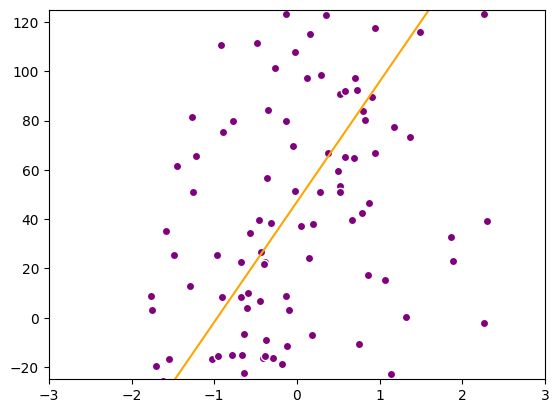

[93/200], loss: 45.01547693073692
[93/200], loss: 93.63252803049035
[93/200], loss: 211.86296667300127
[93/200], loss: 42.01508402850464
[93/200], loss: 78.25532611040923
[93/200], loss: 544.5663668339728
[93/200], loss: 440.44850021157106
[93/200], loss: 58.148052057153514
[93/200], loss: 606.1999704082357
[93/200], loss: 4.4366451795096244
[93/200], loss: 754.8225839705368
[93/200], loss: 28.808440320306797
[93/200], loss: 190.69914666360734
[93/200], loss: 19.784330408228094
[93/200], loss: 225.41716573272475
[93/200], loss: 1.6883886747161012
[93/200], loss: 399.36715448835423
[93/200], loss: 164.74518833830783
[93/200], loss: 0.8571024024094271
[93/200], loss: 17.706603673499295
[93/200], loss: 700.5836215682465
[93/200], loss: 0.9364279971122407
[93/200], loss: 263.58134558718683
[93/200], loss: 176.60273757628497
[93/200], loss: 385.5120946754591
[93/200], loss: 421.5481664049134
[93/200], loss: 279.08904569351677
[93/200], loss: 9.898317359182514
[93/200], loss: 2.9200279183532

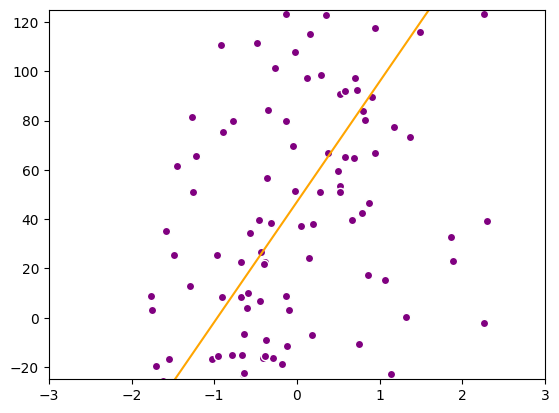

[94/200], loss: 45.01547693073746
[94/200], loss: 93.63252803049035
[94/200], loss: 211.86296667300127
[94/200], loss: 42.01508402850464
[94/200], loss: 78.25532611040941
[94/200], loss: 544.566366833973
[94/200], loss: 440.4485002115713
[94/200], loss: 58.148052057153514
[94/200], loss: 606.1999704082357
[94/200], loss: 4.436645179509667
[94/200], loss: 754.8225839705374
[94/200], loss: 28.808440320306687
[94/200], loss: 190.69914666360748
[94/200], loss: 19.784330408228094
[94/200], loss: 225.41716573272475
[94/200], loss: 1.6883886747161274
[94/200], loss: 399.3671544883544
[94/200], loss: 164.74518833830783
[94/200], loss: 0.8571024024094271
[94/200], loss: 17.706603673499295
[94/200], loss: 700.583621568247
[94/200], loss: 0.9364279971122407
[94/200], loss: 263.58134558718683
[94/200], loss: 176.60273757628482
[94/200], loss: 385.5120946754591
[94/200], loss: 421.5481664049134
[94/200], loss: 279.0890456935171
[94/200], loss: 9.898317359182498
[94/200], loss: 2.9200279183532962
[9

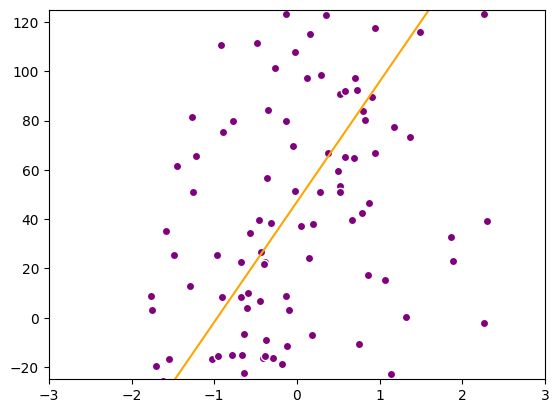

[95/200], loss: 45.01547693073692
[95/200], loss: 93.63252803049035
[95/200], loss: 211.86296667300127
[95/200], loss: 42.01508402850464
[95/200], loss: 78.25532611040923
[95/200], loss: 544.5663668339728
[95/200], loss: 440.44850021157106
[95/200], loss: 58.148052057153514
[95/200], loss: 606.1999704082357
[95/200], loss: 4.4366451795096244
[95/200], loss: 754.8225839705368
[95/200], loss: 28.808440320306797
[95/200], loss: 190.69914666360734
[95/200], loss: 19.784330408228094
[95/200], loss: 225.41716573272475
[95/200], loss: 1.6883886747161012
[95/200], loss: 399.36715448835423
[95/200], loss: 164.74518833830783
[95/200], loss: 0.8571024024094271
[95/200], loss: 17.706603673499295
[95/200], loss: 700.5836215682465
[95/200], loss: 0.9364279971122407
[95/200], loss: 263.58134558718683
[95/200], loss: 176.60273757628497
[95/200], loss: 385.5120946754591
[95/200], loss: 421.5481664049134
[95/200], loss: 279.08904569351677
[95/200], loss: 9.898317359182514
[95/200], loss: 2.9200279183532

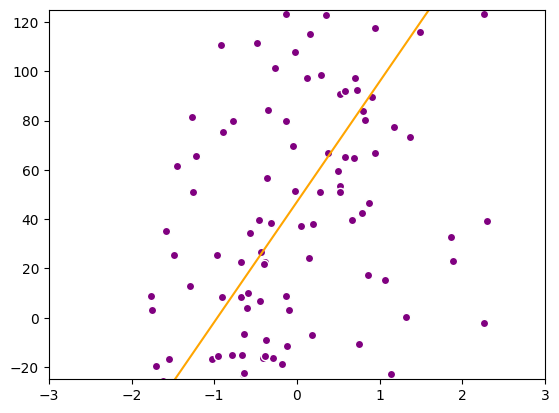

[96/200], loss: 45.01547693073746
[96/200], loss: 93.63252803049035
[96/200], loss: 211.86296667300127
[96/200], loss: 42.01508402850464
[96/200], loss: 78.25532611040941
[96/200], loss: 544.566366833973
[96/200], loss: 440.4485002115713
[96/200], loss: 58.148052057153514
[96/200], loss: 606.1999704082357
[96/200], loss: 4.436645179509667
[96/200], loss: 754.8225839705374
[96/200], loss: 28.808440320306687
[96/200], loss: 190.69914666360748
[96/200], loss: 19.784330408228094
[96/200], loss: 225.41716573272475
[96/200], loss: 1.6883886747161274
[96/200], loss: 399.3671544883544
[96/200], loss: 164.74518833830783
[96/200], loss: 0.8571024024094271
[96/200], loss: 17.706603673499295
[96/200], loss: 700.583621568247
[96/200], loss: 0.9364279971122407
[96/200], loss: 263.58134558718683
[96/200], loss: 176.60273757628482
[96/200], loss: 385.5120946754591
[96/200], loss: 421.5481664049134
[96/200], loss: 279.0890456935171
[96/200], loss: 9.898317359182498
[96/200], loss: 2.9200279183532962
[9

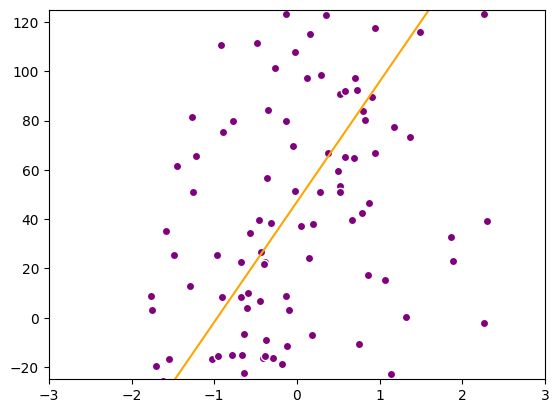

[97/200], loss: 45.01547693073692
[97/200], loss: 93.63252803049035
[97/200], loss: 211.86296667300127
[97/200], loss: 42.01508402850464
[97/200], loss: 78.25532611040923
[97/200], loss: 544.5663668339728
[97/200], loss: 440.44850021157106
[97/200], loss: 58.148052057153514
[97/200], loss: 606.1999704082357
[97/200], loss: 4.4366451795096244
[97/200], loss: 754.8225839705368
[97/200], loss: 28.808440320306797
[97/200], loss: 190.69914666360734
[97/200], loss: 19.784330408228094
[97/200], loss: 225.41716573272475
[97/200], loss: 1.6883886747161012
[97/200], loss: 399.36715448835423
[97/200], loss: 164.74518833830783
[97/200], loss: 0.8571024024094271
[97/200], loss: 17.706603673499295
[97/200], loss: 700.5836215682465
[97/200], loss: 0.9364279971122407
[97/200], loss: 263.58134558718683
[97/200], loss: 176.60273757628497
[97/200], loss: 385.5120946754591
[97/200], loss: 421.5481664049134
[97/200], loss: 279.08904569351677
[97/200], loss: 9.898317359182514
[97/200], loss: 2.9200279183532

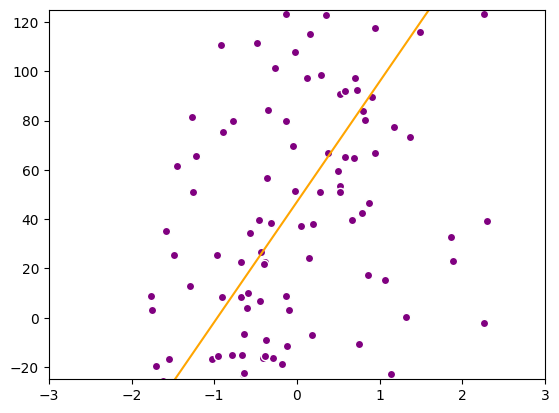

[98/200], loss: 45.01547693073746
[98/200], loss: 93.63252803049035
[98/200], loss: 211.86296667300127
[98/200], loss: 42.01508402850464
[98/200], loss: 78.25532611040941
[98/200], loss: 544.566366833973
[98/200], loss: 440.4485002115713
[98/200], loss: 58.148052057153514
[98/200], loss: 606.1999704082357
[98/200], loss: 4.436645179509667
[98/200], loss: 754.8225839705374
[98/200], loss: 28.808440320306687
[98/200], loss: 190.69914666360748
[98/200], loss: 19.784330408228094
[98/200], loss: 225.41716573272475
[98/200], loss: 1.6883886747161274
[98/200], loss: 399.3671544883544
[98/200], loss: 164.74518833830783
[98/200], loss: 0.8571024024094271
[98/200], loss: 17.706603673499295
[98/200], loss: 700.583621568247
[98/200], loss: 0.9364279971122407
[98/200], loss: 263.58134558718683
[98/200], loss: 176.60273757628482
[98/200], loss: 385.5120946754591
[98/200], loss: 421.5481664049134
[98/200], loss: 279.0890456935171
[98/200], loss: 9.898317359182498
[98/200], loss: 2.9200279183532962
[9

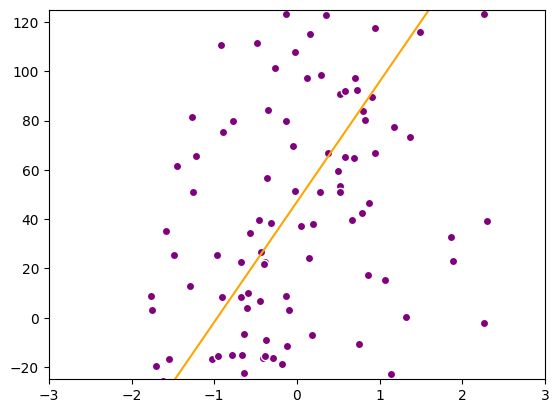

[99/200], loss: 45.01547693073692
[99/200], loss: 93.63252803049035
[99/200], loss: 211.86296667300127
[99/200], loss: 42.01508402850464
[99/200], loss: 78.25532611040923
[99/200], loss: 544.5663668339728
[99/200], loss: 440.44850021157106
[99/200], loss: 58.148052057153514
[99/200], loss: 606.1999704082357
[99/200], loss: 4.4366451795096244
[99/200], loss: 754.8225839705368
[99/200], loss: 28.808440320306797
[99/200], loss: 190.69914666360734
[99/200], loss: 19.784330408228094
[99/200], loss: 225.41716573272475
[99/200], loss: 1.6883886747161012
[99/200], loss: 399.36715448835423
[99/200], loss: 164.74518833830783
[99/200], loss: 0.8571024024094271
[99/200], loss: 17.706603673499295
[99/200], loss: 700.5836215682465
[99/200], loss: 0.9364279971122407
[99/200], loss: 263.58134558718683
[99/200], loss: 176.60273757628497
[99/200], loss: 385.5120946754591
[99/200], loss: 421.5481664049134
[99/200], loss: 279.08904569351677
[99/200], loss: 9.898317359182514
[99/200], loss: 2.9200279183532

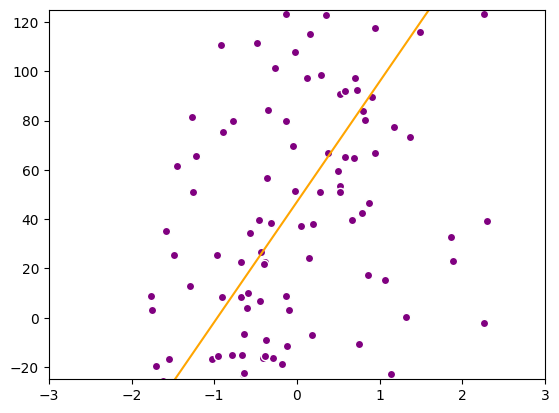

[100/200], loss: 45.01547693073746
[100/200], loss: 93.63252803049035
[100/200], loss: 211.86296667300127
[100/200], loss: 42.01508402850464
[100/200], loss: 78.25532611040941
[100/200], loss: 544.566366833973
[100/200], loss: 440.4485002115713
[100/200], loss: 58.148052057153514
[100/200], loss: 606.1999704082357
[100/200], loss: 4.436645179509667
[100/200], loss: 754.8225839705374
[100/200], loss: 28.808440320306687
[100/200], loss: 190.69914666360748
[100/200], loss: 19.784330408228094
[100/200], loss: 225.41716573272475
[100/200], loss: 1.6883886747161274
[100/200], loss: 399.3671544883544
[100/200], loss: 164.74518833830783
[100/200], loss: 0.8571024024094271
[100/200], loss: 17.706603673499295
[100/200], loss: 700.583621568247
[100/200], loss: 0.9364279971122407
[100/200], loss: 263.58134558718683
[100/200], loss: 176.60273757628482
[100/200], loss: 385.5120946754591
[100/200], loss: 421.5481664049134
[100/200], loss: 279.0890456935171
[100/200], loss: 9.898317359182498
[100/200]

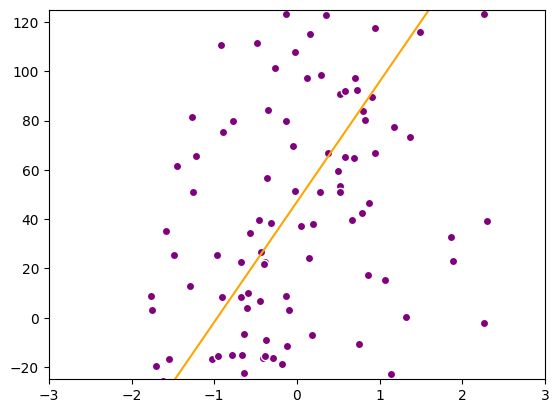

[101/200], loss: 45.01547693073692
[101/200], loss: 93.63252803049035
[101/200], loss: 211.86296667300127
[101/200], loss: 42.01508402850464
[101/200], loss: 78.25532611040923
[101/200], loss: 544.5663668339728
[101/200], loss: 440.44850021157106
[101/200], loss: 58.148052057153514
[101/200], loss: 606.1999704082357
[101/200], loss: 4.4366451795096244
[101/200], loss: 754.8225839705368
[101/200], loss: 28.808440320306797
[101/200], loss: 190.69914666360734
[101/200], loss: 19.784330408228094
[101/200], loss: 225.41716573272475
[101/200], loss: 1.6883886747161012
[101/200], loss: 399.36715448835423
[101/200], loss: 164.74518833830783
[101/200], loss: 0.8571024024094271
[101/200], loss: 17.706603673499295
[101/200], loss: 700.5836215682465
[101/200], loss: 0.9364279971122407
[101/200], loss: 263.58134558718683
[101/200], loss: 176.60273757628497
[101/200], loss: 385.5120946754591
[101/200], loss: 421.5481664049134
[101/200], loss: 279.08904569351677
[101/200], loss: 9.898317359182514
[10

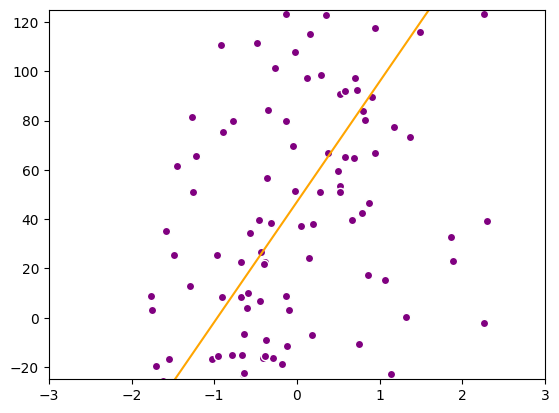

[102/200], loss: 45.01547693073746
[102/200], loss: 93.63252803049035
[102/200], loss: 211.86296667300127
[102/200], loss: 42.01508402850464
[102/200], loss: 78.25532611040941
[102/200], loss: 544.566366833973
[102/200], loss: 440.4485002115713
[102/200], loss: 58.148052057153514
[102/200], loss: 606.1999704082357
[102/200], loss: 4.436645179509667
[102/200], loss: 754.8225839705374
[102/200], loss: 28.808440320306687
[102/200], loss: 190.69914666360748
[102/200], loss: 19.784330408228094
[102/200], loss: 225.41716573272475
[102/200], loss: 1.6883886747161274
[102/200], loss: 399.3671544883544
[102/200], loss: 164.74518833830783
[102/200], loss: 0.8571024024094271
[102/200], loss: 17.706603673499295
[102/200], loss: 700.583621568247
[102/200], loss: 0.9364279971122407
[102/200], loss: 263.58134558718683
[102/200], loss: 176.60273757628482
[102/200], loss: 385.5120946754591
[102/200], loss: 421.5481664049134
[102/200], loss: 279.0890456935171
[102/200], loss: 9.898317359182498
[102/200]

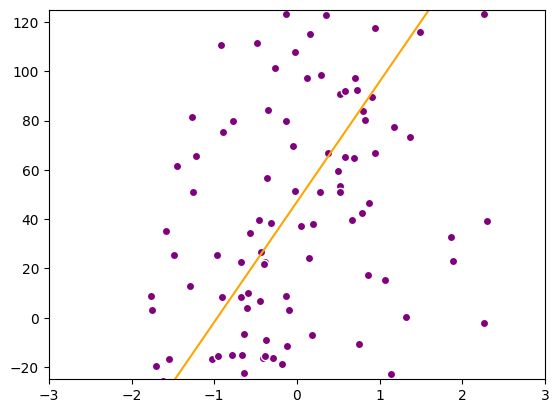

[103/200], loss: 45.01547693073692
[103/200], loss: 93.63252803049035
[103/200], loss: 211.86296667300127
[103/200], loss: 42.01508402850464
[103/200], loss: 78.25532611040923
[103/200], loss: 544.5663668339728
[103/200], loss: 440.44850021157106
[103/200], loss: 58.148052057153514
[103/200], loss: 606.1999704082357
[103/200], loss: 4.4366451795096244
[103/200], loss: 754.8225839705368
[103/200], loss: 28.808440320306797
[103/200], loss: 190.69914666360734
[103/200], loss: 19.784330408228094
[103/200], loss: 225.41716573272475
[103/200], loss: 1.6883886747161012
[103/200], loss: 399.36715448835423
[103/200], loss: 164.74518833830783
[103/200], loss: 0.8571024024094271
[103/200], loss: 17.706603673499295
[103/200], loss: 700.5836215682465
[103/200], loss: 0.9364279971122407
[103/200], loss: 263.58134558718683
[103/200], loss: 176.60273757628497
[103/200], loss: 385.5120946754591
[103/200], loss: 421.5481664049134
[103/200], loss: 279.08904569351677
[103/200], loss: 9.898317359182514
[10

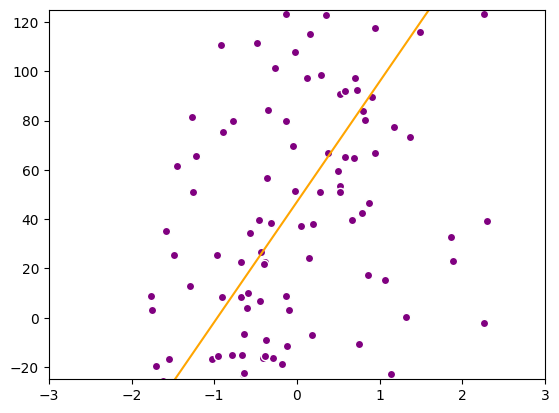

[104/200], loss: 45.01547693073746
[104/200], loss: 93.63252803049035
[104/200], loss: 211.86296667300127
[104/200], loss: 42.01508402850464
[104/200], loss: 78.25532611040941
[104/200], loss: 544.566366833973
[104/200], loss: 440.4485002115713
[104/200], loss: 58.148052057153514
[104/200], loss: 606.1999704082357
[104/200], loss: 4.436645179509667
[104/200], loss: 754.8225839705374
[104/200], loss: 28.808440320306687
[104/200], loss: 190.69914666360748
[104/200], loss: 19.784330408228094
[104/200], loss: 225.41716573272475
[104/200], loss: 1.6883886747161274
[104/200], loss: 399.3671544883544
[104/200], loss: 164.74518833830783
[104/200], loss: 0.8571024024094271
[104/200], loss: 17.706603673499295
[104/200], loss: 700.583621568247
[104/200], loss: 0.9364279971122407
[104/200], loss: 263.58134558718683
[104/200], loss: 176.60273757628482
[104/200], loss: 385.5120946754591
[104/200], loss: 421.5481664049134
[104/200], loss: 279.0890456935171
[104/200], loss: 9.898317359182498
[104/200]

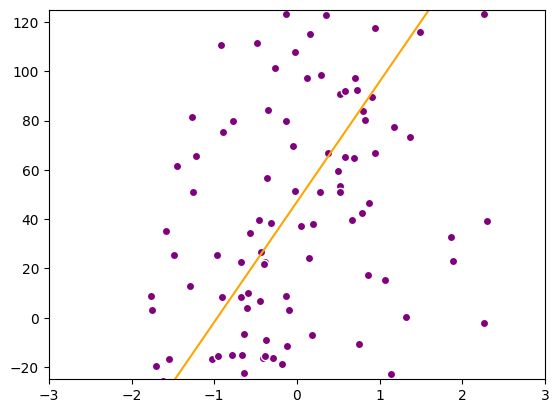

[105/200], loss: 45.01547693073692
[105/200], loss: 93.63252803049035
[105/200], loss: 211.86296667300127
[105/200], loss: 42.01508402850464
[105/200], loss: 78.25532611040923
[105/200], loss: 544.5663668339728
[105/200], loss: 440.44850021157106
[105/200], loss: 58.148052057153514
[105/200], loss: 606.1999704082357
[105/200], loss: 4.4366451795096244
[105/200], loss: 754.8225839705368
[105/200], loss: 28.808440320306797
[105/200], loss: 190.69914666360734
[105/200], loss: 19.784330408228094
[105/200], loss: 225.41716573272475
[105/200], loss: 1.6883886747161012
[105/200], loss: 399.36715448835423
[105/200], loss: 164.74518833830783
[105/200], loss: 0.8571024024094271
[105/200], loss: 17.706603673499295
[105/200], loss: 700.5836215682465
[105/200], loss: 0.9364279971122407
[105/200], loss: 263.58134558718683
[105/200], loss: 176.60273757628497
[105/200], loss: 385.5120946754591
[105/200], loss: 421.5481664049134
[105/200], loss: 279.08904569351677
[105/200], loss: 9.898317359182514
[10

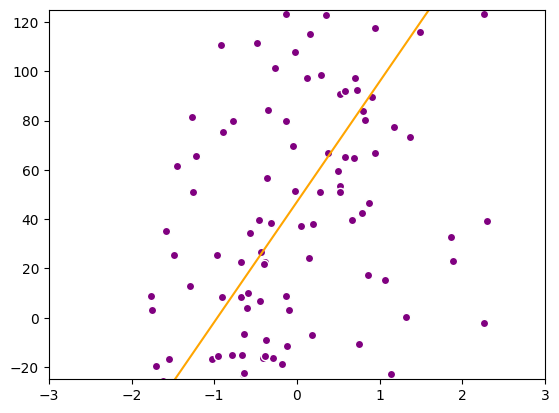

[106/200], loss: 45.01547693073746
[106/200], loss: 93.63252803049035
[106/200], loss: 211.86296667300127
[106/200], loss: 42.01508402850464
[106/200], loss: 78.25532611040941
[106/200], loss: 544.566366833973
[106/200], loss: 440.4485002115713
[106/200], loss: 58.148052057153514
[106/200], loss: 606.1999704082357
[106/200], loss: 4.436645179509667
[106/200], loss: 754.8225839705374
[106/200], loss: 28.808440320306687
[106/200], loss: 190.69914666360748
[106/200], loss: 19.784330408228094
[106/200], loss: 225.41716573272475
[106/200], loss: 1.6883886747161274
[106/200], loss: 399.3671544883544
[106/200], loss: 164.74518833830783
[106/200], loss: 0.8571024024094271
[106/200], loss: 17.706603673499295
[106/200], loss: 700.583621568247
[106/200], loss: 0.9364279971122407
[106/200], loss: 263.58134558718683
[106/200], loss: 176.60273757628482
[106/200], loss: 385.5120946754591
[106/200], loss: 421.5481664049134
[106/200], loss: 279.0890456935171
[106/200], loss: 9.898317359182498
[106/200]

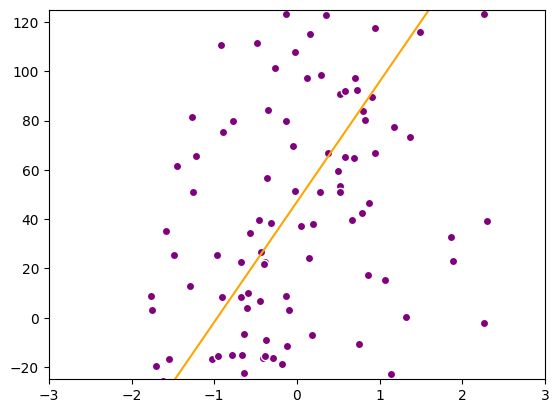

[107/200], loss: 45.01547693073692
[107/200], loss: 93.63252803049035
[107/200], loss: 211.86296667300127
[107/200], loss: 42.01508402850464
[107/200], loss: 78.25532611040923
[107/200], loss: 544.5663668339728
[107/200], loss: 440.44850021157106
[107/200], loss: 58.148052057153514
[107/200], loss: 606.1999704082357
[107/200], loss: 4.4366451795096244
[107/200], loss: 754.8225839705368
[107/200], loss: 28.808440320306797
[107/200], loss: 190.69914666360734
[107/200], loss: 19.784330408228094
[107/200], loss: 225.41716573272475
[107/200], loss: 1.6883886747161012
[107/200], loss: 399.36715448835423
[107/200], loss: 164.74518833830783
[107/200], loss: 0.8571024024094271
[107/200], loss: 17.706603673499295
[107/200], loss: 700.5836215682465
[107/200], loss: 0.9364279971122407
[107/200], loss: 263.58134558718683
[107/200], loss: 176.60273757628497
[107/200], loss: 385.5120946754591
[107/200], loss: 421.5481664049134
[107/200], loss: 279.08904569351677
[107/200], loss: 9.898317359182514
[10

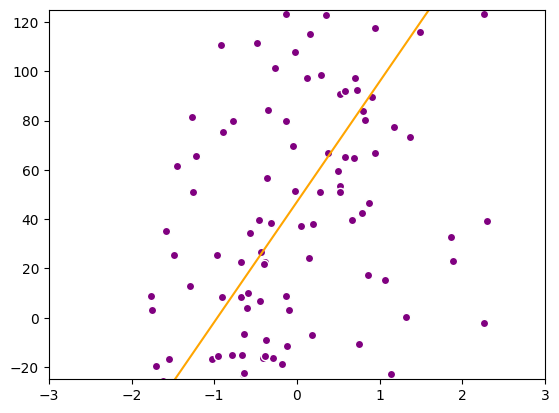

[108/200], loss: 45.01547693073746
[108/200], loss: 93.63252803049035
[108/200], loss: 211.86296667300127
[108/200], loss: 42.01508402850464
[108/200], loss: 78.25532611040941
[108/200], loss: 544.566366833973
[108/200], loss: 440.4485002115713
[108/200], loss: 58.148052057153514
[108/200], loss: 606.1999704082357
[108/200], loss: 4.436645179509667
[108/200], loss: 754.8225839705374
[108/200], loss: 28.808440320306687
[108/200], loss: 190.69914666360748
[108/200], loss: 19.784330408228094
[108/200], loss: 225.41716573272475
[108/200], loss: 1.6883886747161274
[108/200], loss: 399.3671544883544
[108/200], loss: 164.74518833830783
[108/200], loss: 0.8571024024094271
[108/200], loss: 17.706603673499295
[108/200], loss: 700.583621568247
[108/200], loss: 0.9364279971122407
[108/200], loss: 263.58134558718683
[108/200], loss: 176.60273757628482
[108/200], loss: 385.5120946754591
[108/200], loss: 421.5481664049134
[108/200], loss: 279.0890456935171
[108/200], loss: 9.898317359182498
[108/200]

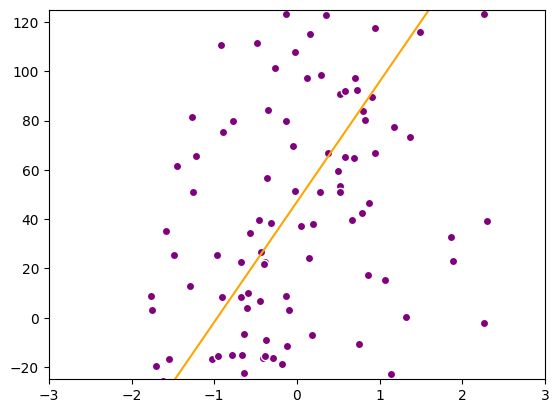

[109/200], loss: 45.01547693073692
[109/200], loss: 93.63252803049035
[109/200], loss: 211.86296667300127
[109/200], loss: 42.01508402850464
[109/200], loss: 78.25532611040923
[109/200], loss: 544.5663668339728
[109/200], loss: 440.44850021157106
[109/200], loss: 58.148052057153514
[109/200], loss: 606.1999704082357
[109/200], loss: 4.4366451795096244
[109/200], loss: 754.8225839705368
[109/200], loss: 28.808440320306797
[109/200], loss: 190.69914666360734
[109/200], loss: 19.784330408228094
[109/200], loss: 225.41716573272475
[109/200], loss: 1.6883886747161012
[109/200], loss: 399.36715448835423
[109/200], loss: 164.74518833830783
[109/200], loss: 0.8571024024094271
[109/200], loss: 17.706603673499295
[109/200], loss: 700.5836215682465
[109/200], loss: 0.9364279971122407
[109/200], loss: 263.58134558718683
[109/200], loss: 176.60273757628497
[109/200], loss: 385.5120946754591
[109/200], loss: 421.5481664049134
[109/200], loss: 279.08904569351677
[109/200], loss: 9.898317359182514
[10

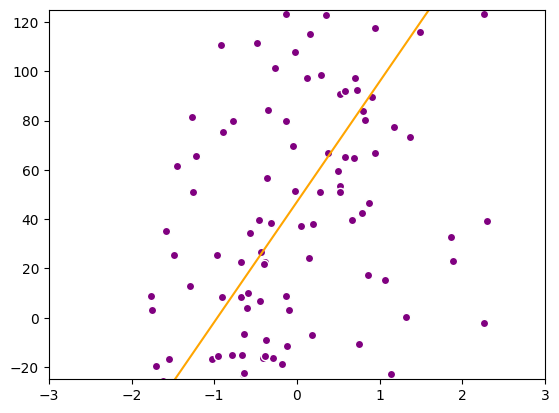

[110/200], loss: 45.01547693073746
[110/200], loss: 93.63252803049035
[110/200], loss: 211.86296667300127
[110/200], loss: 42.01508402850464
[110/200], loss: 78.25532611040941
[110/200], loss: 544.566366833973
[110/200], loss: 440.4485002115713
[110/200], loss: 58.148052057153514
[110/200], loss: 606.1999704082357
[110/200], loss: 4.436645179509667
[110/200], loss: 754.8225839705374
[110/200], loss: 28.808440320306687
[110/200], loss: 190.69914666360748
[110/200], loss: 19.784330408228094
[110/200], loss: 225.41716573272475
[110/200], loss: 1.6883886747161274
[110/200], loss: 399.3671544883544
[110/200], loss: 164.74518833830783
[110/200], loss: 0.8571024024094271
[110/200], loss: 17.706603673499295
[110/200], loss: 700.583621568247
[110/200], loss: 0.9364279971122407
[110/200], loss: 263.58134558718683
[110/200], loss: 176.60273757628482
[110/200], loss: 385.5120946754591
[110/200], loss: 421.5481664049134
[110/200], loss: 279.0890456935171
[110/200], loss: 9.898317359182498
[110/200]

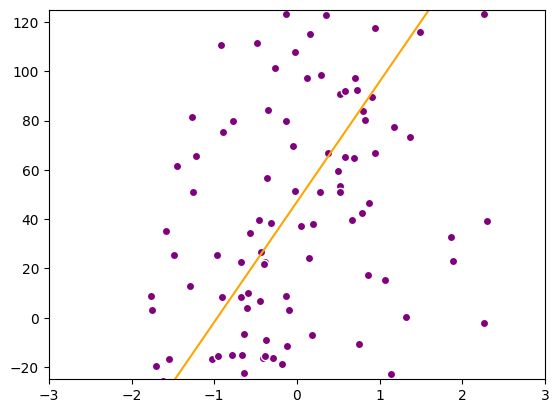

[111/200], loss: 45.01547693073692
[111/200], loss: 93.63252803049035
[111/200], loss: 211.86296667300127
[111/200], loss: 42.01508402850464
[111/200], loss: 78.25532611040923
[111/200], loss: 544.5663668339728
[111/200], loss: 440.44850021157106
[111/200], loss: 58.148052057153514
[111/200], loss: 606.1999704082357
[111/200], loss: 4.4366451795096244
[111/200], loss: 754.8225839705368
[111/200], loss: 28.808440320306797
[111/200], loss: 190.69914666360734
[111/200], loss: 19.784330408228094
[111/200], loss: 225.41716573272475
[111/200], loss: 1.6883886747161012
[111/200], loss: 399.36715448835423
[111/200], loss: 164.74518833830783
[111/200], loss: 0.8571024024094271
[111/200], loss: 17.706603673499295
[111/200], loss: 700.5836215682465
[111/200], loss: 0.9364279971122407
[111/200], loss: 263.58134558718683
[111/200], loss: 176.60273757628497
[111/200], loss: 385.5120946754591
[111/200], loss: 421.5481664049134
[111/200], loss: 279.08904569351677
[111/200], loss: 9.898317359182514
[11

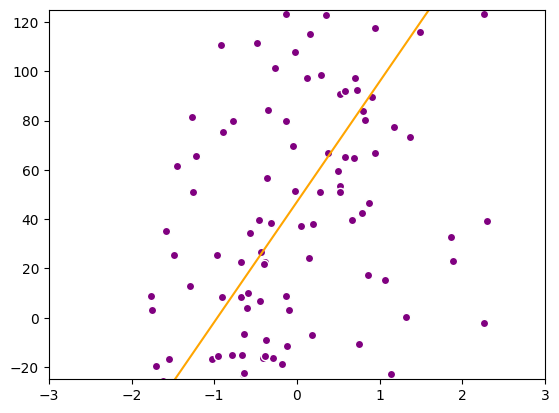

[112/200], loss: 45.01547693073746
[112/200], loss: 93.63252803049035
[112/200], loss: 211.86296667300127
[112/200], loss: 42.01508402850464
[112/200], loss: 78.25532611040941
[112/200], loss: 544.566366833973
[112/200], loss: 440.4485002115713
[112/200], loss: 58.148052057153514
[112/200], loss: 606.1999704082357
[112/200], loss: 4.436645179509667
[112/200], loss: 754.8225839705374
[112/200], loss: 28.808440320306687
[112/200], loss: 190.69914666360748
[112/200], loss: 19.784330408228094
[112/200], loss: 225.41716573272475
[112/200], loss: 1.6883886747161274
[112/200], loss: 399.3671544883544
[112/200], loss: 164.74518833830783
[112/200], loss: 0.8571024024094271
[112/200], loss: 17.706603673499295
[112/200], loss: 700.583621568247
[112/200], loss: 0.9364279971122407
[112/200], loss: 263.58134558718683
[112/200], loss: 176.60273757628482
[112/200], loss: 385.5120946754591
[112/200], loss: 421.5481664049134
[112/200], loss: 279.0890456935171
[112/200], loss: 9.898317359182498
[112/200]

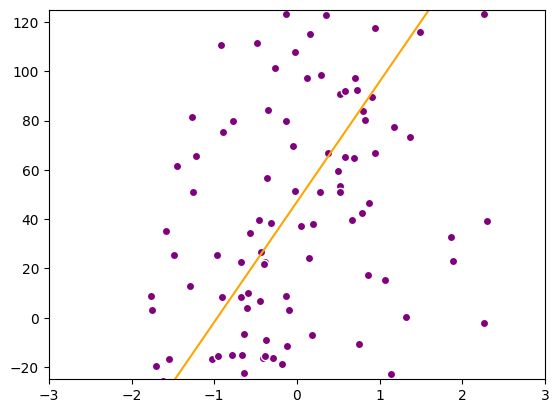

[113/200], loss: 45.01547693073692
[113/200], loss: 93.63252803049035
[113/200], loss: 211.86296667300127
[113/200], loss: 42.01508402850464
[113/200], loss: 78.25532611040923
[113/200], loss: 544.5663668339728
[113/200], loss: 440.44850021157106
[113/200], loss: 58.148052057153514
[113/200], loss: 606.1999704082357
[113/200], loss: 4.4366451795096244
[113/200], loss: 754.8225839705368
[113/200], loss: 28.808440320306797
[113/200], loss: 190.69914666360734
[113/200], loss: 19.784330408228094
[113/200], loss: 225.41716573272475
[113/200], loss: 1.6883886747161012
[113/200], loss: 399.36715448835423
[113/200], loss: 164.74518833830783
[113/200], loss: 0.8571024024094271
[113/200], loss: 17.706603673499295
[113/200], loss: 700.5836215682465
[113/200], loss: 0.9364279971122407
[113/200], loss: 263.58134558718683
[113/200], loss: 176.60273757628497
[113/200], loss: 385.5120946754591
[113/200], loss: 421.5481664049134
[113/200], loss: 279.08904569351677
[113/200], loss: 9.898317359182514
[11

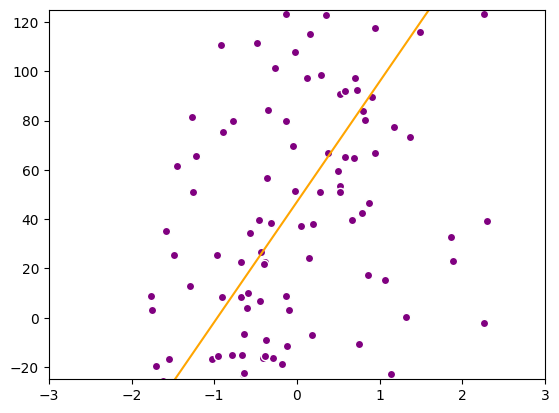

[114/200], loss: 45.01547693073746
[114/200], loss: 93.63252803049035
[114/200], loss: 211.86296667300127
[114/200], loss: 42.01508402850464
[114/200], loss: 78.25532611040941
[114/200], loss: 544.566366833973
[114/200], loss: 440.4485002115713
[114/200], loss: 58.148052057153514
[114/200], loss: 606.1999704082357
[114/200], loss: 4.436645179509667
[114/200], loss: 754.8225839705374
[114/200], loss: 28.808440320306687
[114/200], loss: 190.69914666360748
[114/200], loss: 19.784330408228094
[114/200], loss: 225.41716573272475
[114/200], loss: 1.6883886747161274
[114/200], loss: 399.3671544883544
[114/200], loss: 164.74518833830783
[114/200], loss: 0.8571024024094271
[114/200], loss: 17.706603673499295
[114/200], loss: 700.583621568247
[114/200], loss: 0.9364279971122407
[114/200], loss: 263.58134558718683
[114/200], loss: 176.60273757628482
[114/200], loss: 385.5120946754591
[114/200], loss: 421.5481664049134
[114/200], loss: 279.0890456935171
[114/200], loss: 9.898317359182498
[114/200]

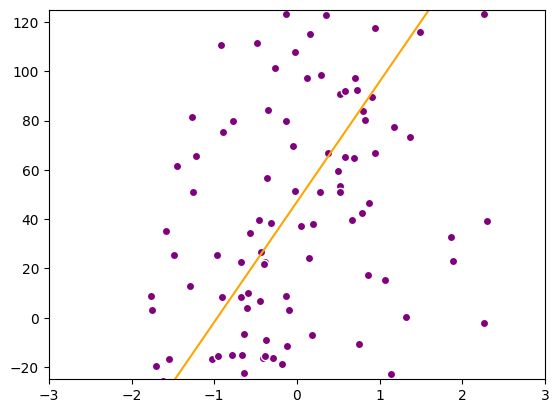

[115/200], loss: 45.01547693073692
[115/200], loss: 93.63252803049035
[115/200], loss: 211.86296667300127
[115/200], loss: 42.01508402850464
[115/200], loss: 78.25532611040923
[115/200], loss: 544.5663668339728
[115/200], loss: 440.44850021157106
[115/200], loss: 58.148052057153514
[115/200], loss: 606.1999704082357
[115/200], loss: 4.4366451795096244
[115/200], loss: 754.8225839705368
[115/200], loss: 28.808440320306797
[115/200], loss: 190.69914666360734
[115/200], loss: 19.784330408228094
[115/200], loss: 225.41716573272475
[115/200], loss: 1.6883886747161012
[115/200], loss: 399.36715448835423
[115/200], loss: 164.74518833830783
[115/200], loss: 0.8571024024094271
[115/200], loss: 17.706603673499295
[115/200], loss: 700.5836215682465
[115/200], loss: 0.9364279971122407
[115/200], loss: 263.58134558718683
[115/200], loss: 176.60273757628497
[115/200], loss: 385.5120946754591
[115/200], loss: 421.5481664049134
[115/200], loss: 279.08904569351677
[115/200], loss: 9.898317359182514
[11

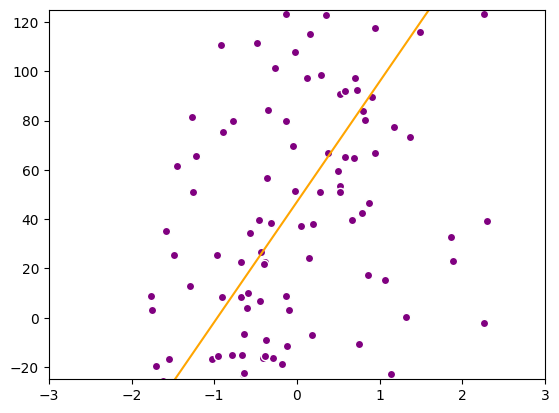

[116/200], loss: 45.01547693073746
[116/200], loss: 93.63252803049035
[116/200], loss: 211.86296667300127
[116/200], loss: 42.01508402850464
[116/200], loss: 78.25532611040941
[116/200], loss: 544.566366833973
[116/200], loss: 440.4485002115713
[116/200], loss: 58.148052057153514
[116/200], loss: 606.1999704082357
[116/200], loss: 4.436645179509667
[116/200], loss: 754.8225839705374
[116/200], loss: 28.808440320306687
[116/200], loss: 190.69914666360748
[116/200], loss: 19.784330408228094
[116/200], loss: 225.41716573272475
[116/200], loss: 1.6883886747161274
[116/200], loss: 399.3671544883544
[116/200], loss: 164.74518833830783
[116/200], loss: 0.8571024024094271
[116/200], loss: 17.706603673499295
[116/200], loss: 700.583621568247
[116/200], loss: 0.9364279971122407
[116/200], loss: 263.58134558718683
[116/200], loss: 176.60273757628482
[116/200], loss: 385.5120946754591
[116/200], loss: 421.5481664049134
[116/200], loss: 279.0890456935171
[116/200], loss: 9.898317359182498
[116/200]

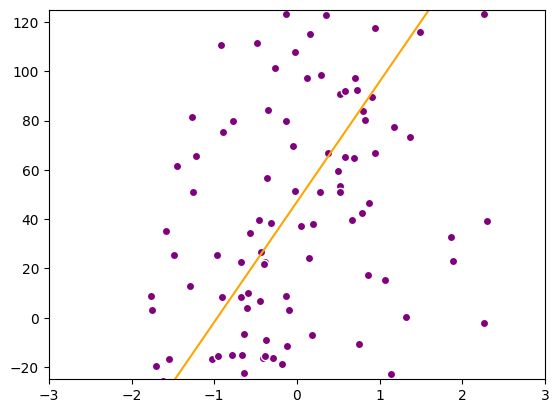

[117/200], loss: 45.01547693073692
[117/200], loss: 93.63252803049035
[117/200], loss: 211.86296667300127
[117/200], loss: 42.01508402850464
[117/200], loss: 78.25532611040923
[117/200], loss: 544.5663668339728
[117/200], loss: 440.44850021157106
[117/200], loss: 58.148052057153514
[117/200], loss: 606.1999704082357
[117/200], loss: 4.4366451795096244
[117/200], loss: 754.8225839705368
[117/200], loss: 28.808440320306797
[117/200], loss: 190.69914666360734
[117/200], loss: 19.784330408228094
[117/200], loss: 225.41716573272475
[117/200], loss: 1.6883886747161012
[117/200], loss: 399.36715448835423
[117/200], loss: 164.74518833830783
[117/200], loss: 0.8571024024094271
[117/200], loss: 17.706603673499295
[117/200], loss: 700.5836215682465
[117/200], loss: 0.9364279971122407
[117/200], loss: 263.58134558718683
[117/200], loss: 176.60273757628497
[117/200], loss: 385.5120946754591
[117/200], loss: 421.5481664049134
[117/200], loss: 279.08904569351677
[117/200], loss: 9.898317359182514
[11

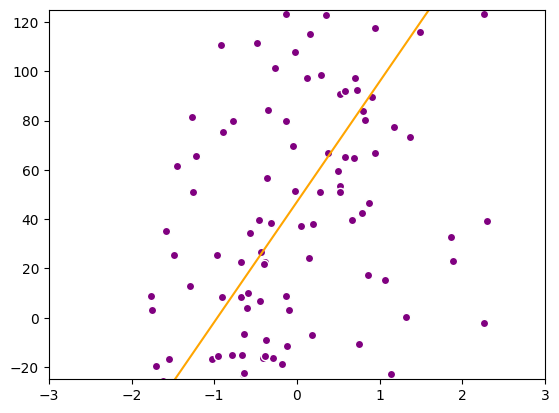

[118/200], loss: 45.01547693073746
[118/200], loss: 93.63252803049035
[118/200], loss: 211.86296667300127
[118/200], loss: 42.01508402850464
[118/200], loss: 78.25532611040941
[118/200], loss: 544.566366833973
[118/200], loss: 440.4485002115713
[118/200], loss: 58.148052057153514
[118/200], loss: 606.1999704082357
[118/200], loss: 4.436645179509667
[118/200], loss: 754.8225839705374
[118/200], loss: 28.808440320306687
[118/200], loss: 190.69914666360748
[118/200], loss: 19.784330408228094
[118/200], loss: 225.41716573272475
[118/200], loss: 1.6883886747161274
[118/200], loss: 399.3671544883544
[118/200], loss: 164.74518833830783
[118/200], loss: 0.8571024024094271
[118/200], loss: 17.706603673499295
[118/200], loss: 700.583621568247
[118/200], loss: 0.9364279971122407
[118/200], loss: 263.58134558718683
[118/200], loss: 176.60273757628482
[118/200], loss: 385.5120946754591
[118/200], loss: 421.5481664049134
[118/200], loss: 279.0890456935171
[118/200], loss: 9.898317359182498
[118/200]

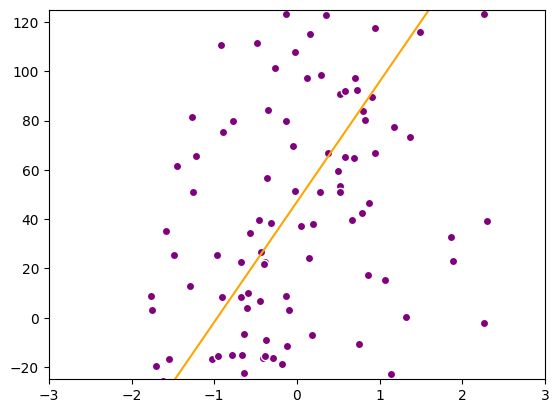

[119/200], loss: 45.01547693073692
[119/200], loss: 93.63252803049035
[119/200], loss: 211.86296667300127
[119/200], loss: 42.01508402850464
[119/200], loss: 78.25532611040923
[119/200], loss: 544.5663668339728
[119/200], loss: 440.44850021157106
[119/200], loss: 58.148052057153514
[119/200], loss: 606.1999704082357
[119/200], loss: 4.4366451795096244
[119/200], loss: 754.8225839705368
[119/200], loss: 28.808440320306797
[119/200], loss: 190.69914666360734
[119/200], loss: 19.784330408228094
[119/200], loss: 225.41716573272475
[119/200], loss: 1.6883886747161012
[119/200], loss: 399.36715448835423
[119/200], loss: 164.74518833830783
[119/200], loss: 0.8571024024094271
[119/200], loss: 17.706603673499295
[119/200], loss: 700.5836215682465
[119/200], loss: 0.9364279971122407
[119/200], loss: 263.58134558718683
[119/200], loss: 176.60273757628497
[119/200], loss: 385.5120946754591
[119/200], loss: 421.5481664049134
[119/200], loss: 279.08904569351677
[119/200], loss: 9.898317359182514
[11

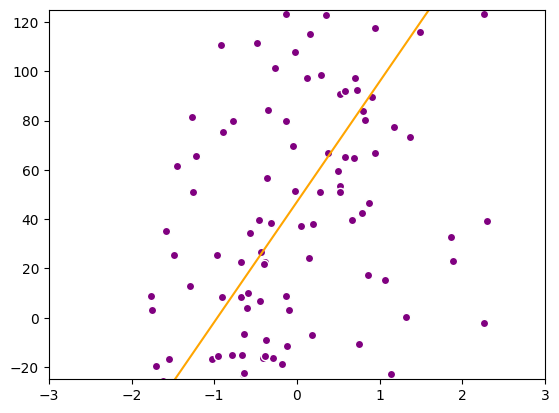

[120/200], loss: 45.01547693073746
[120/200], loss: 93.63252803049035
[120/200], loss: 211.86296667300127
[120/200], loss: 42.01508402850464
[120/200], loss: 78.25532611040941
[120/200], loss: 544.566366833973
[120/200], loss: 440.4485002115713
[120/200], loss: 58.148052057153514
[120/200], loss: 606.1999704082357
[120/200], loss: 4.436645179509667
[120/200], loss: 754.8225839705374
[120/200], loss: 28.808440320306687
[120/200], loss: 190.69914666360748
[120/200], loss: 19.784330408228094
[120/200], loss: 225.41716573272475
[120/200], loss: 1.6883886747161274
[120/200], loss: 399.3671544883544
[120/200], loss: 164.74518833830783
[120/200], loss: 0.8571024024094271
[120/200], loss: 17.706603673499295
[120/200], loss: 700.583621568247
[120/200], loss: 0.9364279971122407
[120/200], loss: 263.58134558718683
[120/200], loss: 176.60273757628482
[120/200], loss: 385.5120946754591
[120/200], loss: 421.5481664049134
[120/200], loss: 279.0890456935171
[120/200], loss: 9.898317359182498
[120/200]

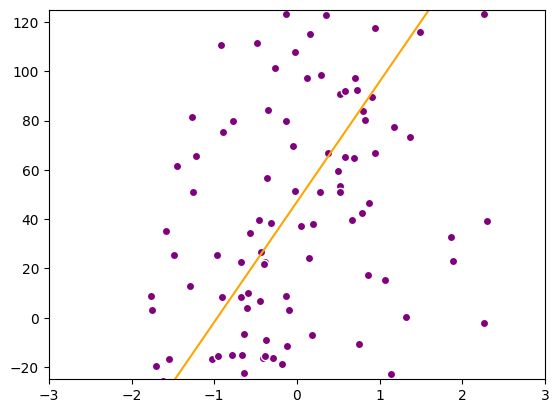

[121/200], loss: 45.01547693073692
[121/200], loss: 93.63252803049035
[121/200], loss: 211.86296667300127
[121/200], loss: 42.01508402850464
[121/200], loss: 78.25532611040923
[121/200], loss: 544.5663668339728
[121/200], loss: 440.44850021157106
[121/200], loss: 58.148052057153514
[121/200], loss: 606.1999704082357
[121/200], loss: 4.4366451795096244
[121/200], loss: 754.8225839705368
[121/200], loss: 28.808440320306797
[121/200], loss: 190.69914666360734
[121/200], loss: 19.784330408228094
[121/200], loss: 225.41716573272475
[121/200], loss: 1.6883886747161012
[121/200], loss: 399.36715448835423
[121/200], loss: 164.74518833830783
[121/200], loss: 0.8571024024094271
[121/200], loss: 17.706603673499295
[121/200], loss: 700.5836215682465
[121/200], loss: 0.9364279971122407
[121/200], loss: 263.58134558718683
[121/200], loss: 176.60273757628497
[121/200], loss: 385.5120946754591
[121/200], loss: 421.5481664049134
[121/200], loss: 279.08904569351677
[121/200], loss: 9.898317359182514
[12

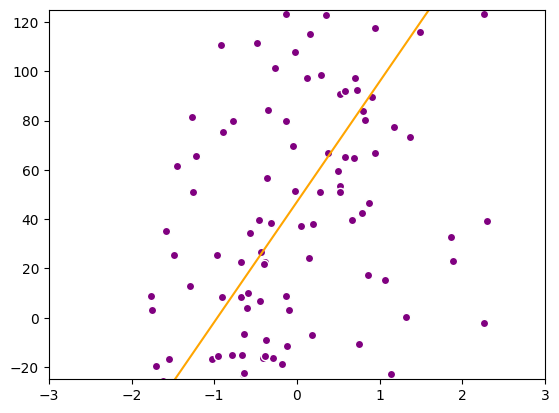

[122/200], loss: 45.01547693073746
[122/200], loss: 93.63252803049035
[122/200], loss: 211.86296667300127
[122/200], loss: 42.01508402850464
[122/200], loss: 78.25532611040941
[122/200], loss: 544.566366833973
[122/200], loss: 440.4485002115713
[122/200], loss: 58.148052057153514
[122/200], loss: 606.1999704082357
[122/200], loss: 4.436645179509667
[122/200], loss: 754.8225839705374
[122/200], loss: 28.808440320306687
[122/200], loss: 190.69914666360748
[122/200], loss: 19.784330408228094
[122/200], loss: 225.41716573272475
[122/200], loss: 1.6883886747161274
[122/200], loss: 399.3671544883544
[122/200], loss: 164.74518833830783
[122/200], loss: 0.8571024024094271
[122/200], loss: 17.706603673499295
[122/200], loss: 700.583621568247
[122/200], loss: 0.9364279971122407
[122/200], loss: 263.58134558718683
[122/200], loss: 176.60273757628482
[122/200], loss: 385.5120946754591
[122/200], loss: 421.5481664049134
[122/200], loss: 279.0890456935171
[122/200], loss: 9.898317359182498
[122/200]

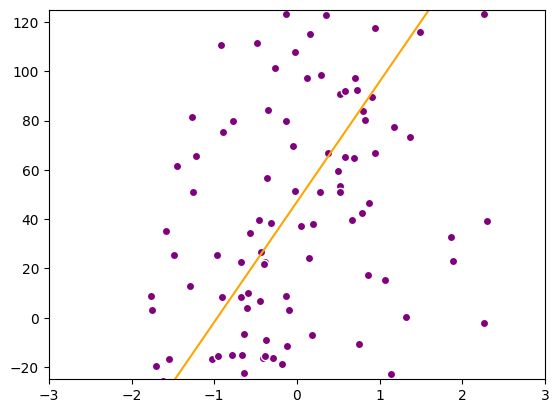

[123/200], loss: 45.01547693073692
[123/200], loss: 93.63252803049035
[123/200], loss: 211.86296667300127
[123/200], loss: 42.01508402850464
[123/200], loss: 78.25532611040923
[123/200], loss: 544.5663668339728
[123/200], loss: 440.44850021157106
[123/200], loss: 58.148052057153514
[123/200], loss: 606.1999704082357
[123/200], loss: 4.4366451795096244
[123/200], loss: 754.8225839705368
[123/200], loss: 28.808440320306797
[123/200], loss: 190.69914666360734
[123/200], loss: 19.784330408228094
[123/200], loss: 225.41716573272475
[123/200], loss: 1.6883886747161012
[123/200], loss: 399.36715448835423
[123/200], loss: 164.74518833830783
[123/200], loss: 0.8571024024094271
[123/200], loss: 17.706603673499295
[123/200], loss: 700.5836215682465
[123/200], loss: 0.9364279971122407
[123/200], loss: 263.58134558718683
[123/200], loss: 176.60273757628497
[123/200], loss: 385.5120946754591
[123/200], loss: 421.5481664049134
[123/200], loss: 279.08904569351677
[123/200], loss: 9.898317359182514
[12

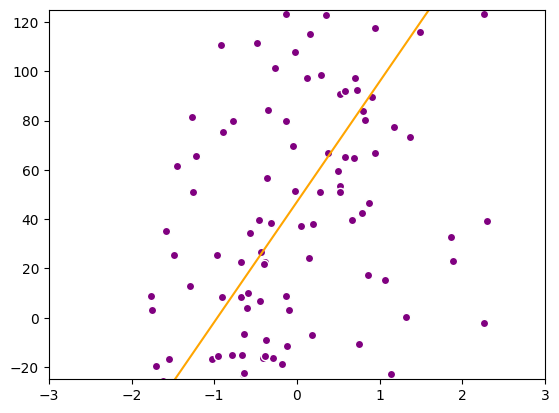

[124/200], loss: 45.01547693073746
[124/200], loss: 93.63252803049035
[124/200], loss: 211.86296667300127
[124/200], loss: 42.01508402850464
[124/200], loss: 78.25532611040941
[124/200], loss: 544.566366833973
[124/200], loss: 440.4485002115713
[124/200], loss: 58.148052057153514
[124/200], loss: 606.1999704082357
[124/200], loss: 4.436645179509667
[124/200], loss: 754.8225839705374
[124/200], loss: 28.808440320306687
[124/200], loss: 190.69914666360748
[124/200], loss: 19.784330408228094
[124/200], loss: 225.41716573272475
[124/200], loss: 1.6883886747161274
[124/200], loss: 399.3671544883544
[124/200], loss: 164.74518833830783
[124/200], loss: 0.8571024024094271
[124/200], loss: 17.706603673499295
[124/200], loss: 700.583621568247
[124/200], loss: 0.9364279971122407
[124/200], loss: 263.58134558718683
[124/200], loss: 176.60273757628482
[124/200], loss: 385.5120946754591
[124/200], loss: 421.5481664049134
[124/200], loss: 279.0890456935171
[124/200], loss: 9.898317359182498
[124/200]

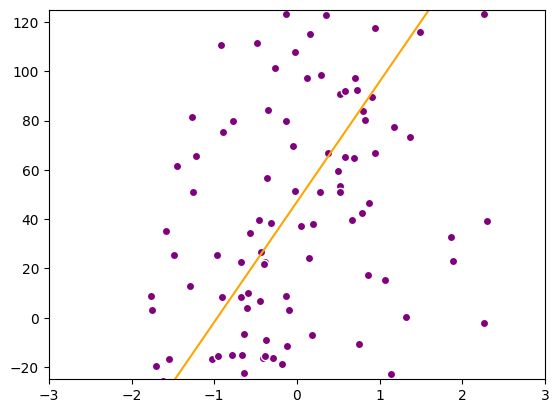

[125/200], loss: 45.01547693073692
[125/200], loss: 93.63252803049035
[125/200], loss: 211.86296667300127
[125/200], loss: 42.01508402850464
[125/200], loss: 78.25532611040923
[125/200], loss: 544.5663668339728
[125/200], loss: 440.44850021157106
[125/200], loss: 58.148052057153514
[125/200], loss: 606.1999704082357
[125/200], loss: 4.4366451795096244
[125/200], loss: 754.8225839705368
[125/200], loss: 28.808440320306797
[125/200], loss: 190.69914666360734
[125/200], loss: 19.784330408228094
[125/200], loss: 225.41716573272475
[125/200], loss: 1.6883886747161012
[125/200], loss: 399.36715448835423
[125/200], loss: 164.74518833830783
[125/200], loss: 0.8571024024094271
[125/200], loss: 17.706603673499295
[125/200], loss: 700.5836215682465
[125/200], loss: 0.9364279971122407
[125/200], loss: 263.58134558718683
[125/200], loss: 176.60273757628497
[125/200], loss: 385.5120946754591
[125/200], loss: 421.5481664049134
[125/200], loss: 279.08904569351677
[125/200], loss: 9.898317359182514
[12

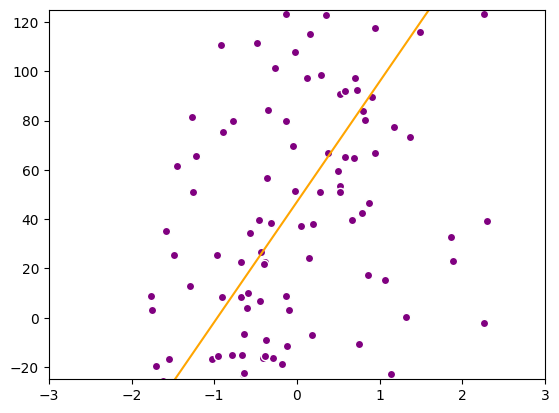

[126/200], loss: 45.01547693073746
[126/200], loss: 93.63252803049035
[126/200], loss: 211.86296667300127
[126/200], loss: 42.01508402850464
[126/200], loss: 78.25532611040941
[126/200], loss: 544.566366833973
[126/200], loss: 440.4485002115713
[126/200], loss: 58.148052057153514
[126/200], loss: 606.1999704082357
[126/200], loss: 4.436645179509667
[126/200], loss: 754.8225839705374
[126/200], loss: 28.808440320306687
[126/200], loss: 190.69914666360748
[126/200], loss: 19.784330408228094
[126/200], loss: 225.41716573272475
[126/200], loss: 1.6883886747161274
[126/200], loss: 399.3671544883544
[126/200], loss: 164.74518833830783
[126/200], loss: 0.8571024024094271
[126/200], loss: 17.706603673499295
[126/200], loss: 700.583621568247
[126/200], loss: 0.9364279971122407
[126/200], loss: 263.58134558718683
[126/200], loss: 176.60273757628482
[126/200], loss: 385.5120946754591
[126/200], loss: 421.5481664049134
[126/200], loss: 279.0890456935171
[126/200], loss: 9.898317359182498
[126/200]

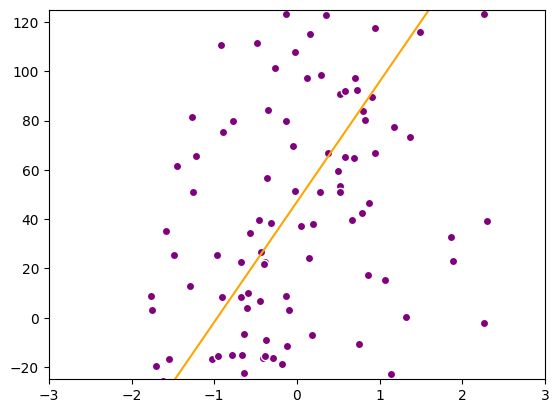

[127/200], loss: 45.01547693073692
[127/200], loss: 93.63252803049035
[127/200], loss: 211.86296667300127
[127/200], loss: 42.01508402850464
[127/200], loss: 78.25532611040923
[127/200], loss: 544.5663668339728
[127/200], loss: 440.44850021157106
[127/200], loss: 58.148052057153514
[127/200], loss: 606.1999704082357
[127/200], loss: 4.4366451795096244
[127/200], loss: 754.8225839705368
[127/200], loss: 28.808440320306797
[127/200], loss: 190.69914666360734
[127/200], loss: 19.784330408228094
[127/200], loss: 225.41716573272475
[127/200], loss: 1.6883886747161012
[127/200], loss: 399.36715448835423
[127/200], loss: 164.74518833830783
[127/200], loss: 0.8571024024094271
[127/200], loss: 17.706603673499295
[127/200], loss: 700.5836215682465
[127/200], loss: 0.9364279971122407
[127/200], loss: 263.58134558718683
[127/200], loss: 176.60273757628497
[127/200], loss: 385.5120946754591
[127/200], loss: 421.5481664049134
[127/200], loss: 279.08904569351677
[127/200], loss: 9.898317359182514
[12

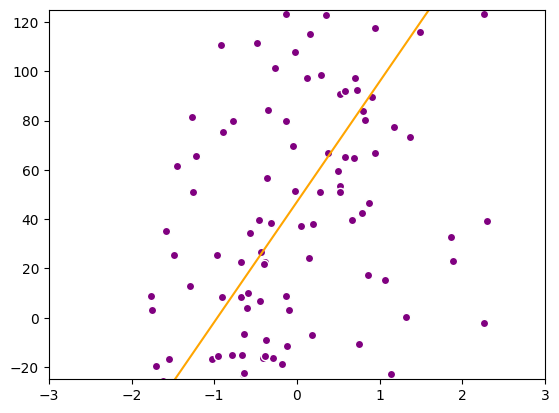

[128/200], loss: 45.01547693073746
[128/200], loss: 93.63252803049035
[128/200], loss: 211.86296667300127
[128/200], loss: 42.01508402850464
[128/200], loss: 78.25532611040941
[128/200], loss: 544.566366833973
[128/200], loss: 440.4485002115713
[128/200], loss: 58.148052057153514
[128/200], loss: 606.1999704082357
[128/200], loss: 4.436645179509667
[128/200], loss: 754.8225839705374
[128/200], loss: 28.808440320306687
[128/200], loss: 190.69914666360748
[128/200], loss: 19.784330408228094
[128/200], loss: 225.41716573272475
[128/200], loss: 1.6883886747161274
[128/200], loss: 399.3671544883544
[128/200], loss: 164.74518833830783
[128/200], loss: 0.8571024024094271
[128/200], loss: 17.706603673499295
[128/200], loss: 700.583621568247
[128/200], loss: 0.9364279971122407
[128/200], loss: 263.58134558718683
[128/200], loss: 176.60273757628482
[128/200], loss: 385.5120946754591
[128/200], loss: 421.5481664049134
[128/200], loss: 279.0890456935171
[128/200], loss: 9.898317359182498
[128/200]

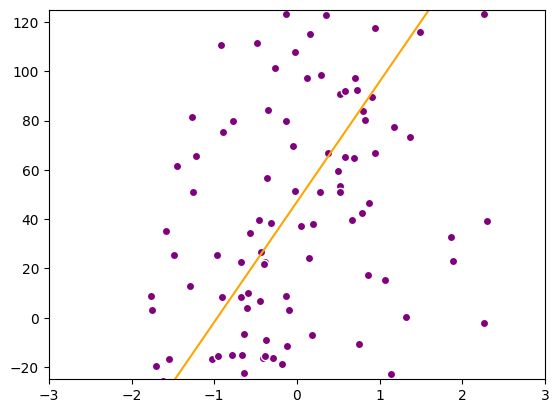

[129/200], loss: 45.01547693073692
[129/200], loss: 93.63252803049035
[129/200], loss: 211.86296667300127
[129/200], loss: 42.01508402850464
[129/200], loss: 78.25532611040923
[129/200], loss: 544.5663668339728
[129/200], loss: 440.44850021157106
[129/200], loss: 58.148052057153514
[129/200], loss: 606.1999704082357
[129/200], loss: 4.4366451795096244
[129/200], loss: 754.8225839705368
[129/200], loss: 28.808440320306797
[129/200], loss: 190.69914666360734
[129/200], loss: 19.784330408228094
[129/200], loss: 225.41716573272475
[129/200], loss: 1.6883886747161012
[129/200], loss: 399.36715448835423
[129/200], loss: 164.74518833830783
[129/200], loss: 0.8571024024094271
[129/200], loss: 17.706603673499295
[129/200], loss: 700.5836215682465
[129/200], loss: 0.9364279971122407
[129/200], loss: 263.58134558718683
[129/200], loss: 176.60273757628497
[129/200], loss: 385.5120946754591
[129/200], loss: 421.5481664049134
[129/200], loss: 279.08904569351677
[129/200], loss: 9.898317359182514
[12

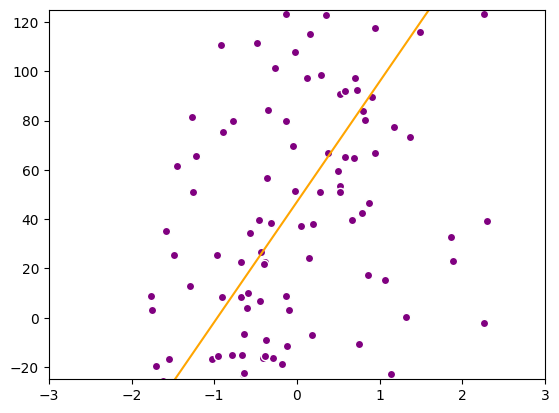

[130/200], loss: 45.01547693073746
[130/200], loss: 93.63252803049035
[130/200], loss: 211.86296667300127
[130/200], loss: 42.01508402850464
[130/200], loss: 78.25532611040941
[130/200], loss: 544.566366833973
[130/200], loss: 440.4485002115713
[130/200], loss: 58.148052057153514
[130/200], loss: 606.1999704082357
[130/200], loss: 4.436645179509667
[130/200], loss: 754.8225839705374
[130/200], loss: 28.808440320306687
[130/200], loss: 190.69914666360748
[130/200], loss: 19.784330408228094
[130/200], loss: 225.41716573272475
[130/200], loss: 1.6883886747161274
[130/200], loss: 399.3671544883544
[130/200], loss: 164.74518833830783
[130/200], loss: 0.8571024024094271
[130/200], loss: 17.706603673499295
[130/200], loss: 700.583621568247
[130/200], loss: 0.9364279971122407
[130/200], loss: 263.58134558718683
[130/200], loss: 176.60273757628482
[130/200], loss: 385.5120946754591
[130/200], loss: 421.5481664049134
[130/200], loss: 279.0890456935171
[130/200], loss: 9.898317359182498
[130/200]

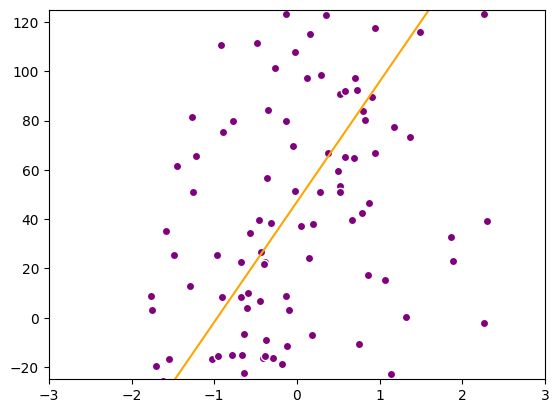

[131/200], loss: 45.01547693073692
[131/200], loss: 93.63252803049035
[131/200], loss: 211.86296667300127
[131/200], loss: 42.01508402850464
[131/200], loss: 78.25532611040923
[131/200], loss: 544.5663668339728
[131/200], loss: 440.44850021157106
[131/200], loss: 58.148052057153514
[131/200], loss: 606.1999704082357
[131/200], loss: 4.4366451795096244
[131/200], loss: 754.8225839705368
[131/200], loss: 28.808440320306797
[131/200], loss: 190.69914666360734
[131/200], loss: 19.784330408228094
[131/200], loss: 225.41716573272475
[131/200], loss: 1.6883886747161012
[131/200], loss: 399.36715448835423
[131/200], loss: 164.74518833830783
[131/200], loss: 0.8571024024094271
[131/200], loss: 17.706603673499295
[131/200], loss: 700.5836215682465
[131/200], loss: 0.9364279971122407
[131/200], loss: 263.58134558718683
[131/200], loss: 176.60273757628497
[131/200], loss: 385.5120946754591
[131/200], loss: 421.5481664049134
[131/200], loss: 279.08904569351677
[131/200], loss: 9.898317359182514
[13

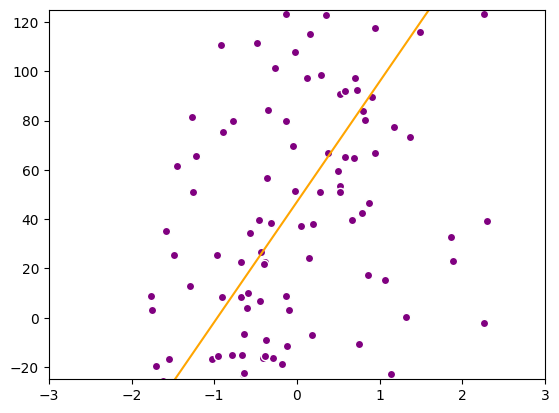

[132/200], loss: 45.01547693073746
[132/200], loss: 93.63252803049035
[132/200], loss: 211.86296667300127
[132/200], loss: 42.01508402850464
[132/200], loss: 78.25532611040941
[132/200], loss: 544.566366833973
[132/200], loss: 440.4485002115713
[132/200], loss: 58.148052057153514
[132/200], loss: 606.1999704082357
[132/200], loss: 4.436645179509667
[132/200], loss: 754.8225839705374
[132/200], loss: 28.808440320306687
[132/200], loss: 190.69914666360748
[132/200], loss: 19.784330408228094
[132/200], loss: 225.41716573272475
[132/200], loss: 1.6883886747161274
[132/200], loss: 399.3671544883544
[132/200], loss: 164.74518833830783
[132/200], loss: 0.8571024024094271
[132/200], loss: 17.706603673499295
[132/200], loss: 700.583621568247
[132/200], loss: 0.9364279971122407
[132/200], loss: 263.58134558718683
[132/200], loss: 176.60273757628482
[132/200], loss: 385.5120946754591
[132/200], loss: 421.5481664049134
[132/200], loss: 279.0890456935171
[132/200], loss: 9.898317359182498
[132/200]

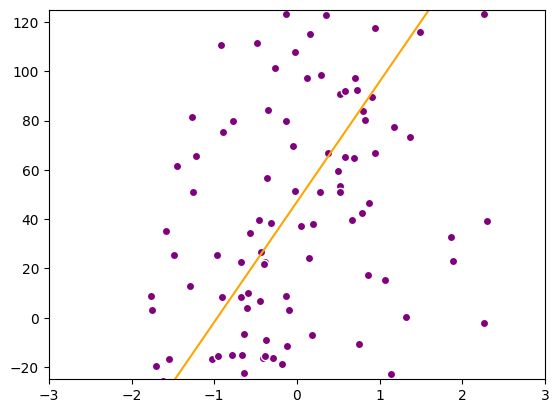

[133/200], loss: 45.01547693073692
[133/200], loss: 93.63252803049035
[133/200], loss: 211.86296667300127
[133/200], loss: 42.01508402850464
[133/200], loss: 78.25532611040923
[133/200], loss: 544.5663668339728
[133/200], loss: 440.44850021157106
[133/200], loss: 58.148052057153514
[133/200], loss: 606.1999704082357
[133/200], loss: 4.4366451795096244
[133/200], loss: 754.8225839705368
[133/200], loss: 28.808440320306797
[133/200], loss: 190.69914666360734
[133/200], loss: 19.784330408228094
[133/200], loss: 225.41716573272475
[133/200], loss: 1.6883886747161012
[133/200], loss: 399.36715448835423
[133/200], loss: 164.74518833830783
[133/200], loss: 0.8571024024094271
[133/200], loss: 17.706603673499295
[133/200], loss: 700.5836215682465
[133/200], loss: 0.9364279971122407
[133/200], loss: 263.58134558718683
[133/200], loss: 176.60273757628497
[133/200], loss: 385.5120946754591
[133/200], loss: 421.5481664049134
[133/200], loss: 279.08904569351677
[133/200], loss: 9.898317359182514
[13

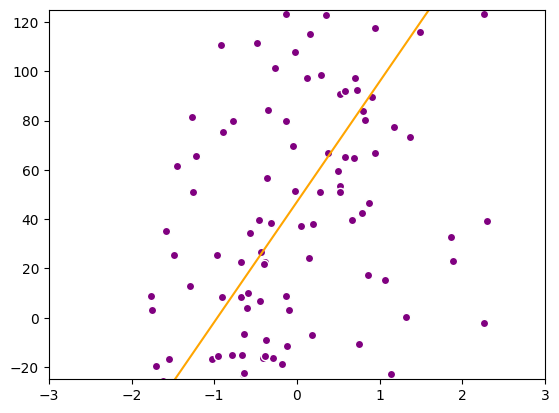

[134/200], loss: 45.01547693073746
[134/200], loss: 93.63252803049035
[134/200], loss: 211.86296667300127
[134/200], loss: 42.01508402850464
[134/200], loss: 78.25532611040941
[134/200], loss: 544.566366833973
[134/200], loss: 440.4485002115713
[134/200], loss: 58.148052057153514
[134/200], loss: 606.1999704082357
[134/200], loss: 4.436645179509667
[134/200], loss: 754.8225839705374
[134/200], loss: 28.808440320306687
[134/200], loss: 190.69914666360748
[134/200], loss: 19.784330408228094
[134/200], loss: 225.41716573272475
[134/200], loss: 1.6883886747161274
[134/200], loss: 399.3671544883544
[134/200], loss: 164.74518833830783
[134/200], loss: 0.8571024024094271
[134/200], loss: 17.706603673499295
[134/200], loss: 700.583621568247
[134/200], loss: 0.9364279971122407
[134/200], loss: 263.58134558718683
[134/200], loss: 176.60273757628482
[134/200], loss: 385.5120946754591
[134/200], loss: 421.5481664049134
[134/200], loss: 279.0890456935171
[134/200], loss: 9.898317359182498
[134/200]

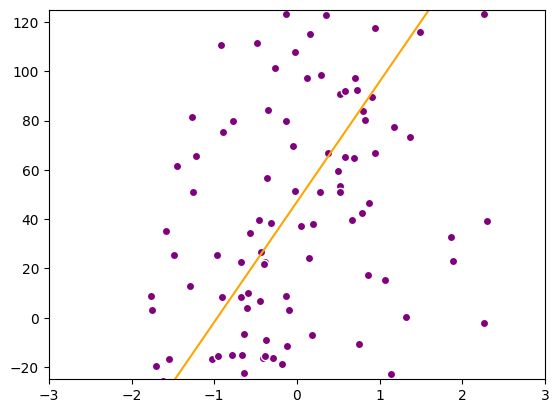

[135/200], loss: 45.01547693073692
[135/200], loss: 93.63252803049035
[135/200], loss: 211.86296667300127
[135/200], loss: 42.01508402850464
[135/200], loss: 78.25532611040923
[135/200], loss: 544.5663668339728
[135/200], loss: 440.44850021157106
[135/200], loss: 58.148052057153514
[135/200], loss: 606.1999704082357
[135/200], loss: 4.4366451795096244
[135/200], loss: 754.8225839705368
[135/200], loss: 28.808440320306797
[135/200], loss: 190.69914666360734
[135/200], loss: 19.784330408228094
[135/200], loss: 225.41716573272475
[135/200], loss: 1.6883886747161012
[135/200], loss: 399.36715448835423
[135/200], loss: 164.74518833830783
[135/200], loss: 0.8571024024094271
[135/200], loss: 17.706603673499295
[135/200], loss: 700.5836215682465
[135/200], loss: 0.9364279971122407
[135/200], loss: 263.58134558718683
[135/200], loss: 176.60273757628497
[135/200], loss: 385.5120946754591
[135/200], loss: 421.5481664049134
[135/200], loss: 279.08904569351677
[135/200], loss: 9.898317359182514
[13

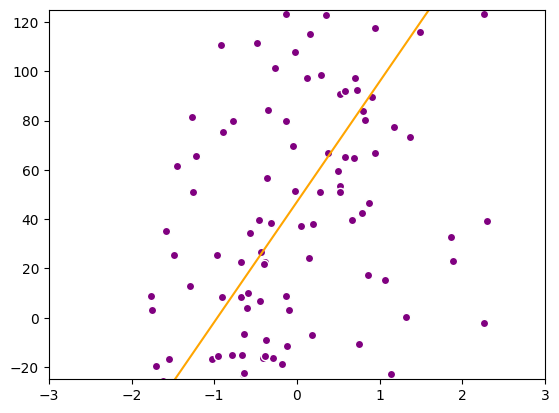

[136/200], loss: 45.01547693073746
[136/200], loss: 93.63252803049035
[136/200], loss: 211.86296667300127
[136/200], loss: 42.01508402850464
[136/200], loss: 78.25532611040941
[136/200], loss: 544.566366833973
[136/200], loss: 440.4485002115713
[136/200], loss: 58.148052057153514
[136/200], loss: 606.1999704082357
[136/200], loss: 4.436645179509667
[136/200], loss: 754.8225839705374
[136/200], loss: 28.808440320306687
[136/200], loss: 190.69914666360748
[136/200], loss: 19.784330408228094
[136/200], loss: 225.41716573272475
[136/200], loss: 1.6883886747161274
[136/200], loss: 399.3671544883544
[136/200], loss: 164.74518833830783
[136/200], loss: 0.8571024024094271
[136/200], loss: 17.706603673499295
[136/200], loss: 700.583621568247
[136/200], loss: 0.9364279971122407
[136/200], loss: 263.58134558718683
[136/200], loss: 176.60273757628482
[136/200], loss: 385.5120946754591
[136/200], loss: 421.5481664049134
[136/200], loss: 279.0890456935171
[136/200], loss: 9.898317359182498
[136/200]

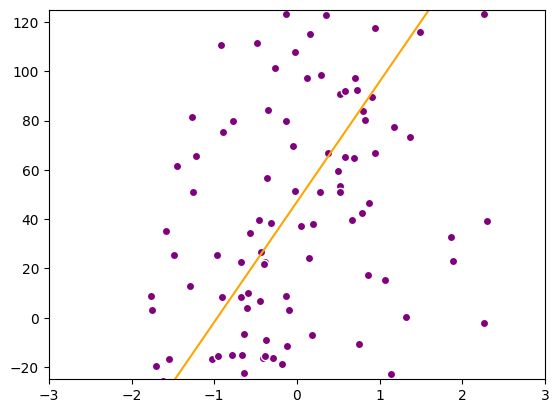

[137/200], loss: 45.01547693073692
[137/200], loss: 93.63252803049035
[137/200], loss: 211.86296667300127
[137/200], loss: 42.01508402850464
[137/200], loss: 78.25532611040923
[137/200], loss: 544.5663668339728
[137/200], loss: 440.44850021157106
[137/200], loss: 58.148052057153514
[137/200], loss: 606.1999704082357
[137/200], loss: 4.4366451795096244
[137/200], loss: 754.8225839705368
[137/200], loss: 28.808440320306797
[137/200], loss: 190.69914666360734
[137/200], loss: 19.784330408228094
[137/200], loss: 225.41716573272475
[137/200], loss: 1.6883886747161012
[137/200], loss: 399.36715448835423
[137/200], loss: 164.74518833830783
[137/200], loss: 0.8571024024094271
[137/200], loss: 17.706603673499295
[137/200], loss: 700.5836215682465
[137/200], loss: 0.9364279971122407
[137/200], loss: 263.58134558718683
[137/200], loss: 176.60273757628497
[137/200], loss: 385.5120946754591
[137/200], loss: 421.5481664049134
[137/200], loss: 279.08904569351677
[137/200], loss: 9.898317359182514
[13

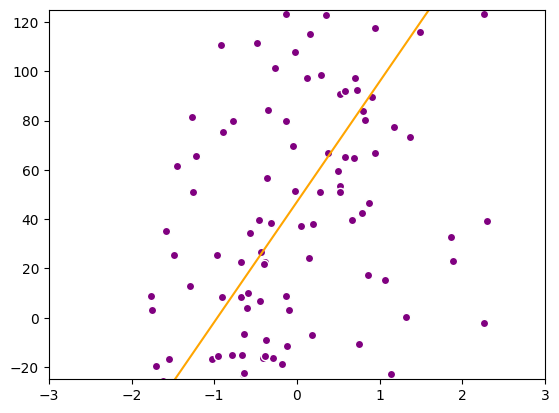

[138/200], loss: 45.01547693073746
[138/200], loss: 93.63252803049035
[138/200], loss: 211.86296667300127
[138/200], loss: 42.01508402850464
[138/200], loss: 78.25532611040941
[138/200], loss: 544.566366833973
[138/200], loss: 440.4485002115713
[138/200], loss: 58.148052057153514
[138/200], loss: 606.1999704082357
[138/200], loss: 4.436645179509667
[138/200], loss: 754.8225839705374
[138/200], loss: 28.808440320306687
[138/200], loss: 190.69914666360748
[138/200], loss: 19.784330408228094
[138/200], loss: 225.41716573272475
[138/200], loss: 1.6883886747161274
[138/200], loss: 399.3671544883544
[138/200], loss: 164.74518833830783
[138/200], loss: 0.8571024024094271
[138/200], loss: 17.706603673499295
[138/200], loss: 700.583621568247
[138/200], loss: 0.9364279971122407
[138/200], loss: 263.58134558718683
[138/200], loss: 176.60273757628482
[138/200], loss: 385.5120946754591
[138/200], loss: 421.5481664049134
[138/200], loss: 279.0890456935171
[138/200], loss: 9.898317359182498
[138/200]

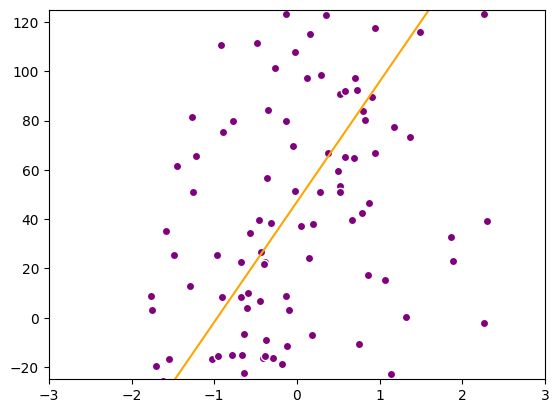

[139/200], loss: 45.01547693073692
[139/200], loss: 93.63252803049035
[139/200], loss: 211.86296667300127
[139/200], loss: 42.01508402850464
[139/200], loss: 78.25532611040923
[139/200], loss: 544.5663668339728
[139/200], loss: 440.44850021157106
[139/200], loss: 58.148052057153514
[139/200], loss: 606.1999704082357
[139/200], loss: 4.4366451795096244
[139/200], loss: 754.8225839705368
[139/200], loss: 28.808440320306797
[139/200], loss: 190.69914666360734
[139/200], loss: 19.784330408228094
[139/200], loss: 225.41716573272475
[139/200], loss: 1.6883886747161012
[139/200], loss: 399.36715448835423
[139/200], loss: 164.74518833830783
[139/200], loss: 0.8571024024094271
[139/200], loss: 17.706603673499295
[139/200], loss: 700.5836215682465
[139/200], loss: 0.9364279971122407
[139/200], loss: 263.58134558718683
[139/200], loss: 176.60273757628497
[139/200], loss: 385.5120946754591
[139/200], loss: 421.5481664049134
[139/200], loss: 279.08904569351677
[139/200], loss: 9.898317359182514
[13

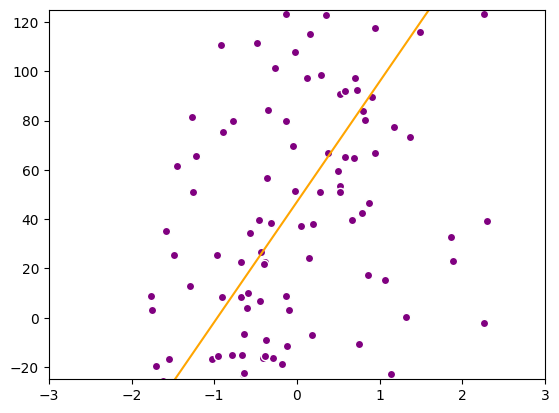

[140/200], loss: 45.01547693073746
[140/200], loss: 93.63252803049035
[140/200], loss: 211.86296667300127
[140/200], loss: 42.01508402850464
[140/200], loss: 78.25532611040941
[140/200], loss: 544.566366833973
[140/200], loss: 440.4485002115713
[140/200], loss: 58.148052057153514
[140/200], loss: 606.1999704082357
[140/200], loss: 4.436645179509667
[140/200], loss: 754.8225839705374
[140/200], loss: 28.808440320306687
[140/200], loss: 190.69914666360748
[140/200], loss: 19.784330408228094
[140/200], loss: 225.41716573272475
[140/200], loss: 1.6883886747161274
[140/200], loss: 399.3671544883544
[140/200], loss: 164.74518833830783
[140/200], loss: 0.8571024024094271
[140/200], loss: 17.706603673499295
[140/200], loss: 700.583621568247
[140/200], loss: 0.9364279971122407
[140/200], loss: 263.58134558718683
[140/200], loss: 176.60273757628482
[140/200], loss: 385.5120946754591
[140/200], loss: 421.5481664049134
[140/200], loss: 279.0890456935171
[140/200], loss: 9.898317359182498
[140/200]

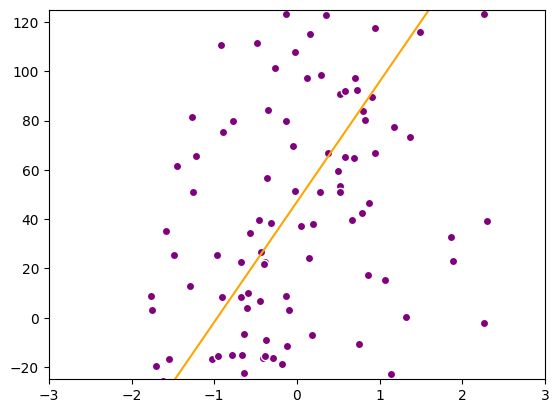

[141/200], loss: 45.01547693073692
[141/200], loss: 93.63252803049035
[141/200], loss: 211.86296667300127
[141/200], loss: 42.01508402850464
[141/200], loss: 78.25532611040923
[141/200], loss: 544.5663668339728
[141/200], loss: 440.44850021157106
[141/200], loss: 58.148052057153514
[141/200], loss: 606.1999704082357
[141/200], loss: 4.4366451795096244
[141/200], loss: 754.8225839705368
[141/200], loss: 28.808440320306797
[141/200], loss: 190.69914666360734
[141/200], loss: 19.784330408228094
[141/200], loss: 225.41716573272475
[141/200], loss: 1.6883886747161012
[141/200], loss: 399.36715448835423
[141/200], loss: 164.74518833830783
[141/200], loss: 0.8571024024094271
[141/200], loss: 17.706603673499295
[141/200], loss: 700.5836215682465
[141/200], loss: 0.9364279971122407
[141/200], loss: 263.58134558718683
[141/200], loss: 176.60273757628497
[141/200], loss: 385.5120946754591
[141/200], loss: 421.5481664049134
[141/200], loss: 279.08904569351677
[141/200], loss: 9.898317359182514
[14

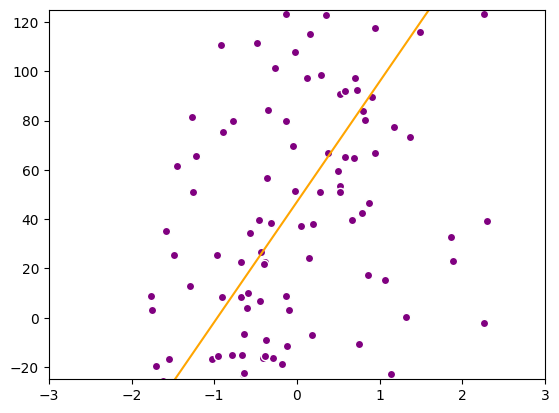

[142/200], loss: 45.01547693073746
[142/200], loss: 93.63252803049035
[142/200], loss: 211.86296667300127
[142/200], loss: 42.01508402850464
[142/200], loss: 78.25532611040941
[142/200], loss: 544.566366833973
[142/200], loss: 440.4485002115713
[142/200], loss: 58.148052057153514
[142/200], loss: 606.1999704082357
[142/200], loss: 4.436645179509667
[142/200], loss: 754.8225839705374
[142/200], loss: 28.808440320306687
[142/200], loss: 190.69914666360748
[142/200], loss: 19.784330408228094
[142/200], loss: 225.41716573272475
[142/200], loss: 1.6883886747161274
[142/200], loss: 399.3671544883544
[142/200], loss: 164.74518833830783
[142/200], loss: 0.8571024024094271
[142/200], loss: 17.706603673499295
[142/200], loss: 700.583621568247
[142/200], loss: 0.9364279971122407
[142/200], loss: 263.58134558718683
[142/200], loss: 176.60273757628482
[142/200], loss: 385.5120946754591
[142/200], loss: 421.5481664049134
[142/200], loss: 279.0890456935171
[142/200], loss: 9.898317359182498
[142/200]

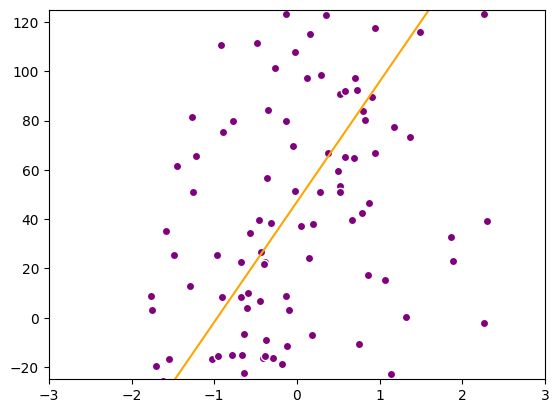

[143/200], loss: 45.01547693073692
[143/200], loss: 93.63252803049035
[143/200], loss: 211.86296667300127
[143/200], loss: 42.01508402850464
[143/200], loss: 78.25532611040923
[143/200], loss: 544.5663668339728
[143/200], loss: 440.44850021157106
[143/200], loss: 58.148052057153514
[143/200], loss: 606.1999704082357
[143/200], loss: 4.4366451795096244
[143/200], loss: 754.8225839705368
[143/200], loss: 28.808440320306797
[143/200], loss: 190.69914666360734
[143/200], loss: 19.784330408228094
[143/200], loss: 225.41716573272475
[143/200], loss: 1.6883886747161012
[143/200], loss: 399.36715448835423
[143/200], loss: 164.74518833830783
[143/200], loss: 0.8571024024094271
[143/200], loss: 17.706603673499295
[143/200], loss: 700.5836215682465
[143/200], loss: 0.9364279971122407
[143/200], loss: 263.58134558718683
[143/200], loss: 176.60273757628497
[143/200], loss: 385.5120946754591
[143/200], loss: 421.5481664049134
[143/200], loss: 279.08904569351677
[143/200], loss: 9.898317359182514
[14

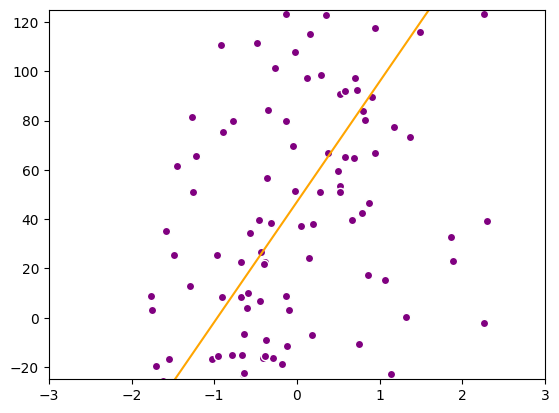

[144/200], loss: 45.01547693073746
[144/200], loss: 93.63252803049035
[144/200], loss: 211.86296667300127
[144/200], loss: 42.01508402850464
[144/200], loss: 78.25532611040941
[144/200], loss: 544.566366833973
[144/200], loss: 440.4485002115713
[144/200], loss: 58.148052057153514
[144/200], loss: 606.1999704082357
[144/200], loss: 4.436645179509667
[144/200], loss: 754.8225839705374
[144/200], loss: 28.808440320306687
[144/200], loss: 190.69914666360748
[144/200], loss: 19.784330408228094
[144/200], loss: 225.41716573272475
[144/200], loss: 1.6883886747161274
[144/200], loss: 399.3671544883544
[144/200], loss: 164.74518833830783
[144/200], loss: 0.8571024024094271
[144/200], loss: 17.706603673499295
[144/200], loss: 700.583621568247
[144/200], loss: 0.9364279971122407
[144/200], loss: 263.58134558718683
[144/200], loss: 176.60273757628482
[144/200], loss: 385.5120946754591
[144/200], loss: 421.5481664049134
[144/200], loss: 279.0890456935171
[144/200], loss: 9.898317359182498
[144/200]

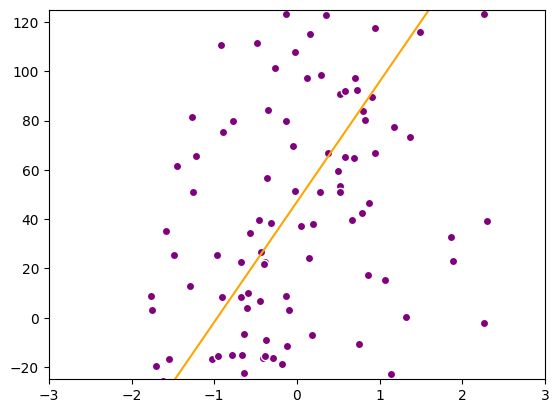

[145/200], loss: 45.01547693073692
[145/200], loss: 93.63252803049035
[145/200], loss: 211.86296667300127
[145/200], loss: 42.01508402850464
[145/200], loss: 78.25532611040923
[145/200], loss: 544.5663668339728
[145/200], loss: 440.44850021157106
[145/200], loss: 58.148052057153514
[145/200], loss: 606.1999704082357
[145/200], loss: 4.4366451795096244
[145/200], loss: 754.8225839705368
[145/200], loss: 28.808440320306797
[145/200], loss: 190.69914666360734
[145/200], loss: 19.784330408228094
[145/200], loss: 225.41716573272475
[145/200], loss: 1.6883886747161012
[145/200], loss: 399.36715448835423
[145/200], loss: 164.74518833830783
[145/200], loss: 0.8571024024094271
[145/200], loss: 17.706603673499295
[145/200], loss: 700.5836215682465
[145/200], loss: 0.9364279971122407
[145/200], loss: 263.58134558718683
[145/200], loss: 176.60273757628497
[145/200], loss: 385.5120946754591
[145/200], loss: 421.5481664049134
[145/200], loss: 279.08904569351677
[145/200], loss: 9.898317359182514
[14

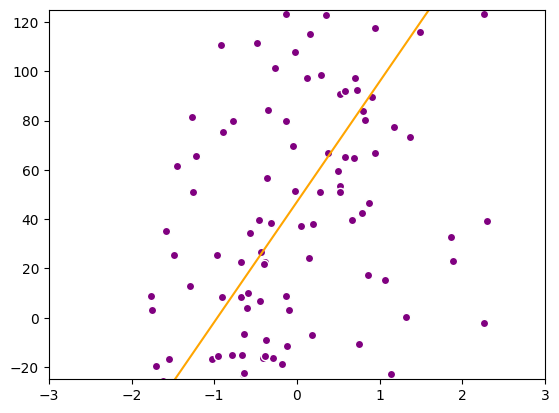

[146/200], loss: 45.01547693073746
[146/200], loss: 93.63252803049035
[146/200], loss: 211.86296667300127
[146/200], loss: 42.01508402850464
[146/200], loss: 78.25532611040941
[146/200], loss: 544.566366833973
[146/200], loss: 440.4485002115713
[146/200], loss: 58.148052057153514
[146/200], loss: 606.1999704082357
[146/200], loss: 4.436645179509667
[146/200], loss: 754.8225839705374
[146/200], loss: 28.808440320306687
[146/200], loss: 190.69914666360748
[146/200], loss: 19.784330408228094
[146/200], loss: 225.41716573272475
[146/200], loss: 1.6883886747161274
[146/200], loss: 399.3671544883544
[146/200], loss: 164.74518833830783
[146/200], loss: 0.8571024024094271
[146/200], loss: 17.706603673499295
[146/200], loss: 700.583621568247
[146/200], loss: 0.9364279971122407
[146/200], loss: 263.58134558718683
[146/200], loss: 176.60273757628482
[146/200], loss: 385.5120946754591
[146/200], loss: 421.5481664049134
[146/200], loss: 279.0890456935171
[146/200], loss: 9.898317359182498
[146/200]

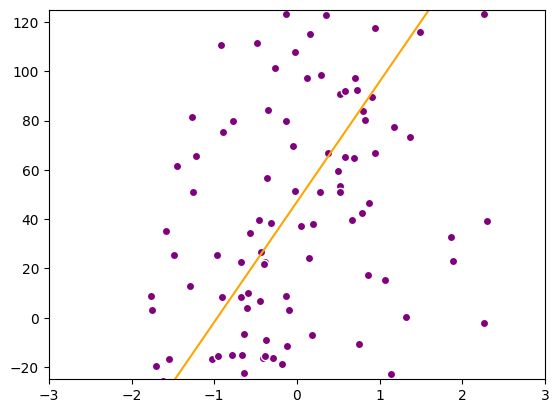

[147/200], loss: 45.01547693073692
[147/200], loss: 93.63252803049035
[147/200], loss: 211.86296667300127
[147/200], loss: 42.01508402850464
[147/200], loss: 78.25532611040923
[147/200], loss: 544.5663668339728
[147/200], loss: 440.44850021157106
[147/200], loss: 58.148052057153514
[147/200], loss: 606.1999704082357
[147/200], loss: 4.4366451795096244
[147/200], loss: 754.8225839705368
[147/200], loss: 28.808440320306797
[147/200], loss: 190.69914666360734
[147/200], loss: 19.784330408228094
[147/200], loss: 225.41716573272475
[147/200], loss: 1.6883886747161012
[147/200], loss: 399.36715448835423
[147/200], loss: 164.74518833830783
[147/200], loss: 0.8571024024094271
[147/200], loss: 17.706603673499295
[147/200], loss: 700.5836215682465
[147/200], loss: 0.9364279971122407
[147/200], loss: 263.58134558718683
[147/200], loss: 176.60273757628497
[147/200], loss: 385.5120946754591
[147/200], loss: 421.5481664049134
[147/200], loss: 279.08904569351677
[147/200], loss: 9.898317359182514
[14

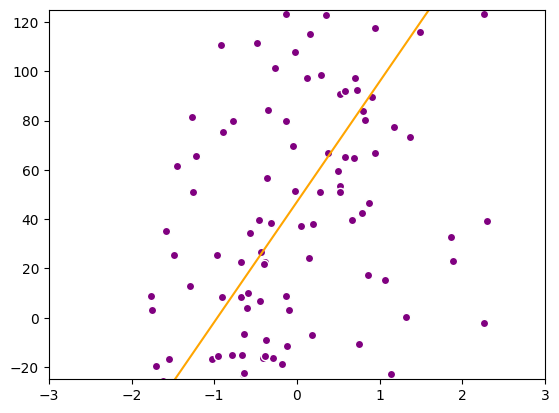

[148/200], loss: 45.01547693073746
[148/200], loss: 93.63252803049035
[148/200], loss: 211.86296667300127
[148/200], loss: 42.01508402850464
[148/200], loss: 78.25532611040941
[148/200], loss: 544.566366833973
[148/200], loss: 440.4485002115713
[148/200], loss: 58.148052057153514
[148/200], loss: 606.1999704082357
[148/200], loss: 4.436645179509667
[148/200], loss: 754.8225839705374
[148/200], loss: 28.808440320306687
[148/200], loss: 190.69914666360748
[148/200], loss: 19.784330408228094
[148/200], loss: 225.41716573272475
[148/200], loss: 1.6883886747161274
[148/200], loss: 399.3671544883544
[148/200], loss: 164.74518833830783
[148/200], loss: 0.8571024024094271
[148/200], loss: 17.706603673499295
[148/200], loss: 700.583621568247
[148/200], loss: 0.9364279971122407
[148/200], loss: 263.58134558718683
[148/200], loss: 176.60273757628482
[148/200], loss: 385.5120946754591
[148/200], loss: 421.5481664049134
[148/200], loss: 279.0890456935171
[148/200], loss: 9.898317359182498
[148/200]

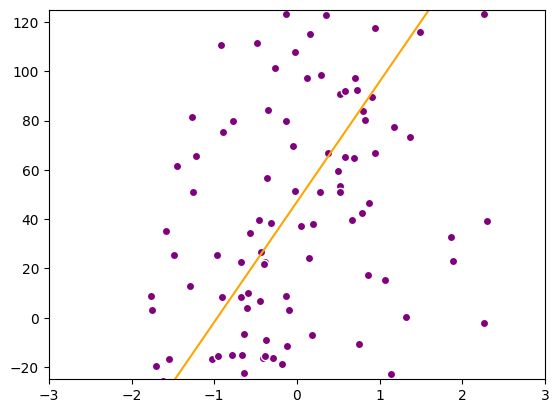

[149/200], loss: 45.01547693073692
[149/200], loss: 93.63252803049035
[149/200], loss: 211.86296667300127
[149/200], loss: 42.01508402850464
[149/200], loss: 78.25532611040923
[149/200], loss: 544.5663668339728
[149/200], loss: 440.44850021157106
[149/200], loss: 58.148052057153514
[149/200], loss: 606.1999704082357
[149/200], loss: 4.4366451795096244
[149/200], loss: 754.8225839705368
[149/200], loss: 28.808440320306797
[149/200], loss: 190.69914666360734
[149/200], loss: 19.784330408228094
[149/200], loss: 225.41716573272475
[149/200], loss: 1.6883886747161012
[149/200], loss: 399.36715448835423
[149/200], loss: 164.74518833830783
[149/200], loss: 0.8571024024094271
[149/200], loss: 17.706603673499295
[149/200], loss: 700.5836215682465
[149/200], loss: 0.9364279971122407
[149/200], loss: 263.58134558718683
[149/200], loss: 176.60273757628497
[149/200], loss: 385.5120946754591
[149/200], loss: 421.5481664049134
[149/200], loss: 279.08904569351677
[149/200], loss: 9.898317359182514
[14

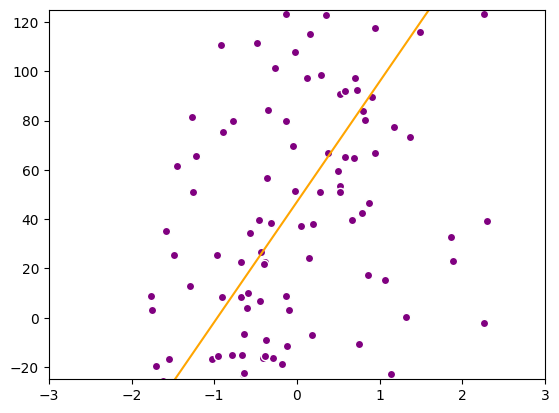

[150/200], loss: 45.01547693073746
[150/200], loss: 93.63252803049035
[150/200], loss: 211.86296667300127
[150/200], loss: 42.01508402850464
[150/200], loss: 78.25532611040941
[150/200], loss: 544.566366833973
[150/200], loss: 440.4485002115713
[150/200], loss: 58.148052057153514
[150/200], loss: 606.1999704082357
[150/200], loss: 4.436645179509667
[150/200], loss: 754.8225839705374
[150/200], loss: 28.808440320306687
[150/200], loss: 190.69914666360748
[150/200], loss: 19.784330408228094
[150/200], loss: 225.41716573272475
[150/200], loss: 1.6883886747161274
[150/200], loss: 399.3671544883544
[150/200], loss: 164.74518833830783
[150/200], loss: 0.8571024024094271
[150/200], loss: 17.706603673499295
[150/200], loss: 700.583621568247
[150/200], loss: 0.9364279971122407
[150/200], loss: 263.58134558718683
[150/200], loss: 176.60273757628482
[150/200], loss: 385.5120946754591
[150/200], loss: 421.5481664049134
[150/200], loss: 279.0890456935171
[150/200], loss: 9.898317359182498
[150/200]

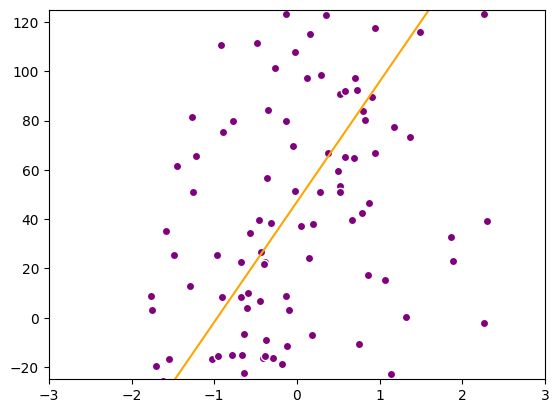

[151/200], loss: 45.01547693073692
[151/200], loss: 93.63252803049035
[151/200], loss: 211.86296667300127
[151/200], loss: 42.01508402850464
[151/200], loss: 78.25532611040923
[151/200], loss: 544.5663668339728
[151/200], loss: 440.44850021157106
[151/200], loss: 58.148052057153514
[151/200], loss: 606.1999704082357
[151/200], loss: 4.4366451795096244
[151/200], loss: 754.8225839705368
[151/200], loss: 28.808440320306797
[151/200], loss: 190.69914666360734
[151/200], loss: 19.784330408228094
[151/200], loss: 225.41716573272475
[151/200], loss: 1.6883886747161012
[151/200], loss: 399.36715448835423
[151/200], loss: 164.74518833830783
[151/200], loss: 0.8571024024094271
[151/200], loss: 17.706603673499295
[151/200], loss: 700.5836215682465
[151/200], loss: 0.9364279971122407
[151/200], loss: 263.58134558718683
[151/200], loss: 176.60273757628497
[151/200], loss: 385.5120946754591
[151/200], loss: 421.5481664049134
[151/200], loss: 279.08904569351677
[151/200], loss: 9.898317359182514
[15

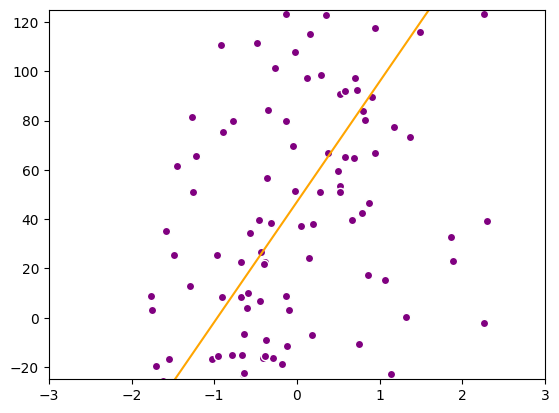

[152/200], loss: 45.01547693073746
[152/200], loss: 93.63252803049035
[152/200], loss: 211.86296667300127
[152/200], loss: 42.01508402850464
[152/200], loss: 78.25532611040941
[152/200], loss: 544.566366833973
[152/200], loss: 440.4485002115713
[152/200], loss: 58.148052057153514
[152/200], loss: 606.1999704082357
[152/200], loss: 4.436645179509667
[152/200], loss: 754.8225839705374
[152/200], loss: 28.808440320306687
[152/200], loss: 190.69914666360748
[152/200], loss: 19.784330408228094
[152/200], loss: 225.41716573272475
[152/200], loss: 1.6883886747161274
[152/200], loss: 399.3671544883544
[152/200], loss: 164.74518833830783
[152/200], loss: 0.8571024024094271
[152/200], loss: 17.706603673499295
[152/200], loss: 700.583621568247
[152/200], loss: 0.9364279971122407
[152/200], loss: 263.58134558718683
[152/200], loss: 176.60273757628482
[152/200], loss: 385.5120946754591
[152/200], loss: 421.5481664049134
[152/200], loss: 279.0890456935171
[152/200], loss: 9.898317359182498
[152/200]

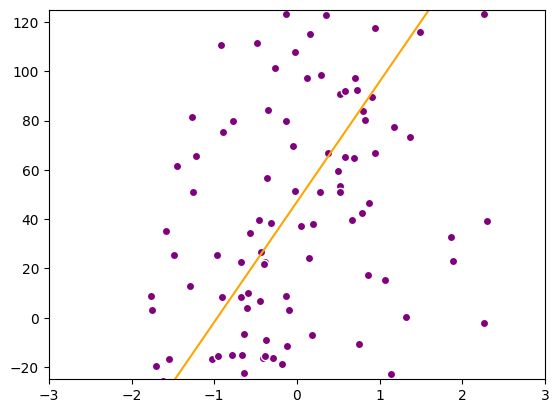

[153/200], loss: 45.01547693073692
[153/200], loss: 93.63252803049035
[153/200], loss: 211.86296667300127
[153/200], loss: 42.01508402850464
[153/200], loss: 78.25532611040923
[153/200], loss: 544.5663668339728
[153/200], loss: 440.44850021157106
[153/200], loss: 58.148052057153514
[153/200], loss: 606.1999704082357
[153/200], loss: 4.4366451795096244
[153/200], loss: 754.8225839705368
[153/200], loss: 28.808440320306797
[153/200], loss: 190.69914666360734
[153/200], loss: 19.784330408228094
[153/200], loss: 225.41716573272475
[153/200], loss: 1.6883886747161012
[153/200], loss: 399.36715448835423
[153/200], loss: 164.74518833830783
[153/200], loss: 0.8571024024094271
[153/200], loss: 17.706603673499295
[153/200], loss: 700.5836215682465
[153/200], loss: 0.9364279971122407
[153/200], loss: 263.58134558718683
[153/200], loss: 176.60273757628497
[153/200], loss: 385.5120946754591
[153/200], loss: 421.5481664049134
[153/200], loss: 279.08904569351677
[153/200], loss: 9.898317359182514
[15

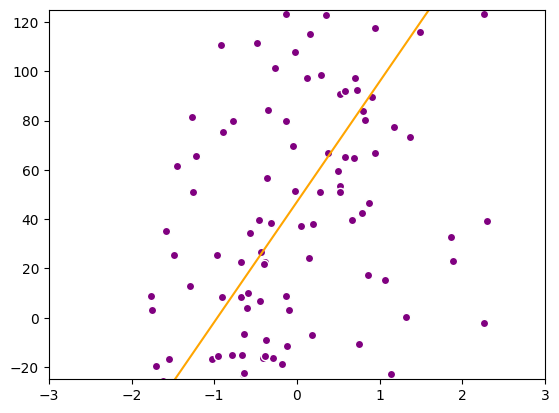

[154/200], loss: 45.01547693073746
[154/200], loss: 93.63252803049035
[154/200], loss: 211.86296667300127
[154/200], loss: 42.01508402850464
[154/200], loss: 78.25532611040941
[154/200], loss: 544.566366833973
[154/200], loss: 440.4485002115713
[154/200], loss: 58.148052057153514
[154/200], loss: 606.1999704082357
[154/200], loss: 4.436645179509667
[154/200], loss: 754.8225839705374
[154/200], loss: 28.808440320306687
[154/200], loss: 190.69914666360748
[154/200], loss: 19.784330408228094
[154/200], loss: 225.41716573272475
[154/200], loss: 1.6883886747161274
[154/200], loss: 399.3671544883544
[154/200], loss: 164.74518833830783
[154/200], loss: 0.8571024024094271
[154/200], loss: 17.706603673499295
[154/200], loss: 700.583621568247
[154/200], loss: 0.9364279971122407
[154/200], loss: 263.58134558718683
[154/200], loss: 176.60273757628482
[154/200], loss: 385.5120946754591
[154/200], loss: 421.5481664049134
[154/200], loss: 279.0890456935171
[154/200], loss: 9.898317359182498
[154/200]

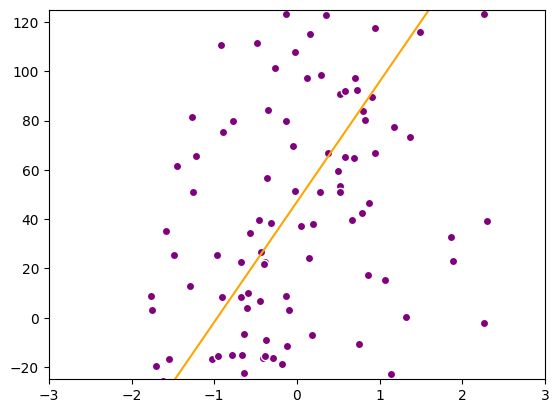

[155/200], loss: 45.01547693073692
[155/200], loss: 93.63252803049035
[155/200], loss: 211.86296667300127
[155/200], loss: 42.01508402850464
[155/200], loss: 78.25532611040923
[155/200], loss: 544.5663668339728
[155/200], loss: 440.44850021157106
[155/200], loss: 58.148052057153514
[155/200], loss: 606.1999704082357
[155/200], loss: 4.4366451795096244
[155/200], loss: 754.8225839705368
[155/200], loss: 28.808440320306797
[155/200], loss: 190.69914666360734
[155/200], loss: 19.784330408228094
[155/200], loss: 225.41716573272475
[155/200], loss: 1.6883886747161012
[155/200], loss: 399.36715448835423
[155/200], loss: 164.74518833830783
[155/200], loss: 0.8571024024094271
[155/200], loss: 17.706603673499295
[155/200], loss: 700.5836215682465
[155/200], loss: 0.9364279971122407
[155/200], loss: 263.58134558718683
[155/200], loss: 176.60273757628497
[155/200], loss: 385.5120946754591
[155/200], loss: 421.5481664049134
[155/200], loss: 279.08904569351677
[155/200], loss: 9.898317359182514
[15

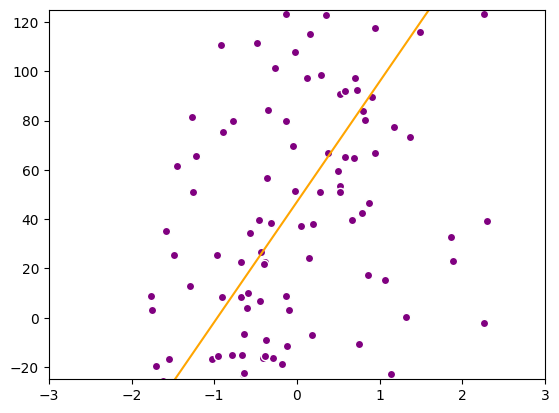

[156/200], loss: 45.01547693073746
[156/200], loss: 93.63252803049035
[156/200], loss: 211.86296667300127
[156/200], loss: 42.01508402850464
[156/200], loss: 78.25532611040941
[156/200], loss: 544.566366833973
[156/200], loss: 440.4485002115713
[156/200], loss: 58.148052057153514
[156/200], loss: 606.1999704082357
[156/200], loss: 4.436645179509667
[156/200], loss: 754.8225839705374
[156/200], loss: 28.808440320306687
[156/200], loss: 190.69914666360748
[156/200], loss: 19.784330408228094
[156/200], loss: 225.41716573272475
[156/200], loss: 1.6883886747161274
[156/200], loss: 399.3671544883544
[156/200], loss: 164.74518833830783
[156/200], loss: 0.8571024024094271
[156/200], loss: 17.706603673499295
[156/200], loss: 700.583621568247
[156/200], loss: 0.9364279971122407
[156/200], loss: 263.58134558718683
[156/200], loss: 176.60273757628482
[156/200], loss: 385.5120946754591
[156/200], loss: 421.5481664049134
[156/200], loss: 279.0890456935171
[156/200], loss: 9.898317359182498
[156/200]

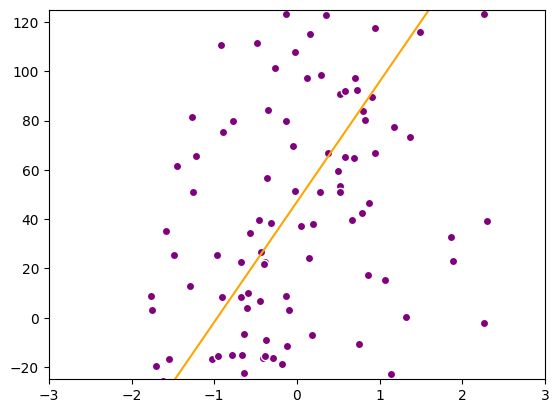

[157/200], loss: 45.01547693073692
[157/200], loss: 93.63252803049035
[157/200], loss: 211.86296667300127
[157/200], loss: 42.01508402850464
[157/200], loss: 78.25532611040923
[157/200], loss: 544.5663668339728
[157/200], loss: 440.44850021157106
[157/200], loss: 58.148052057153514
[157/200], loss: 606.1999704082357
[157/200], loss: 4.4366451795096244
[157/200], loss: 754.8225839705368
[157/200], loss: 28.808440320306797
[157/200], loss: 190.69914666360734
[157/200], loss: 19.784330408228094
[157/200], loss: 225.41716573272475
[157/200], loss: 1.6883886747161012
[157/200], loss: 399.36715448835423
[157/200], loss: 164.74518833830783
[157/200], loss: 0.8571024024094271
[157/200], loss: 17.706603673499295
[157/200], loss: 700.5836215682465
[157/200], loss: 0.9364279971122407
[157/200], loss: 263.58134558718683
[157/200], loss: 176.60273757628497
[157/200], loss: 385.5120946754591
[157/200], loss: 421.5481664049134
[157/200], loss: 279.08904569351677
[157/200], loss: 9.898317359182514
[15

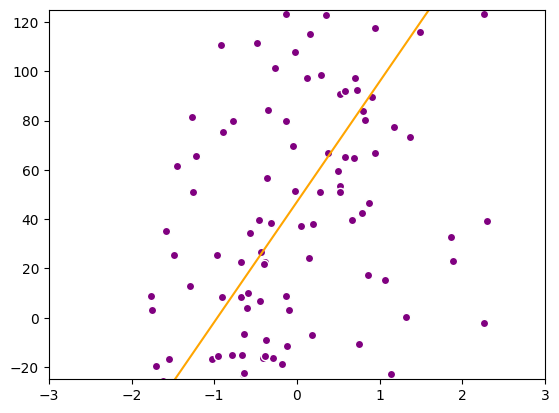

[158/200], loss: 45.01547693073746
[158/200], loss: 93.63252803049035
[158/200], loss: 211.86296667300127
[158/200], loss: 42.01508402850464
[158/200], loss: 78.25532611040941
[158/200], loss: 544.566366833973
[158/200], loss: 440.4485002115713
[158/200], loss: 58.148052057153514
[158/200], loss: 606.1999704082357
[158/200], loss: 4.436645179509667
[158/200], loss: 754.8225839705374
[158/200], loss: 28.808440320306687
[158/200], loss: 190.69914666360748
[158/200], loss: 19.784330408228094
[158/200], loss: 225.41716573272475
[158/200], loss: 1.6883886747161274
[158/200], loss: 399.3671544883544
[158/200], loss: 164.74518833830783
[158/200], loss: 0.8571024024094271
[158/200], loss: 17.706603673499295
[158/200], loss: 700.583621568247
[158/200], loss: 0.9364279971122407
[158/200], loss: 263.58134558718683
[158/200], loss: 176.60273757628482
[158/200], loss: 385.5120946754591
[158/200], loss: 421.5481664049134
[158/200], loss: 279.0890456935171
[158/200], loss: 9.898317359182498
[158/200]

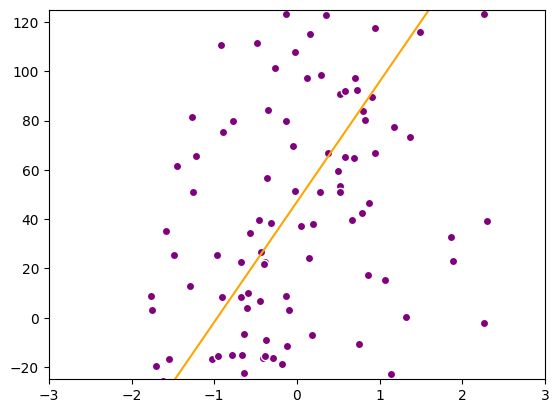

[159/200], loss: 45.01547693073692
[159/200], loss: 93.63252803049035
[159/200], loss: 211.86296667300127
[159/200], loss: 42.01508402850464
[159/200], loss: 78.25532611040923
[159/200], loss: 544.5663668339728
[159/200], loss: 440.44850021157106
[159/200], loss: 58.148052057153514
[159/200], loss: 606.1999704082357
[159/200], loss: 4.4366451795096244
[159/200], loss: 754.8225839705368
[159/200], loss: 28.808440320306797
[159/200], loss: 190.69914666360734
[159/200], loss: 19.784330408228094
[159/200], loss: 225.41716573272475
[159/200], loss: 1.6883886747161012
[159/200], loss: 399.36715448835423
[159/200], loss: 164.74518833830783
[159/200], loss: 0.8571024024094271
[159/200], loss: 17.706603673499295
[159/200], loss: 700.5836215682465
[159/200], loss: 0.9364279971122407
[159/200], loss: 263.58134558718683
[159/200], loss: 176.60273757628497
[159/200], loss: 385.5120946754591
[159/200], loss: 421.5481664049134
[159/200], loss: 279.08904569351677
[159/200], loss: 9.898317359182514
[15

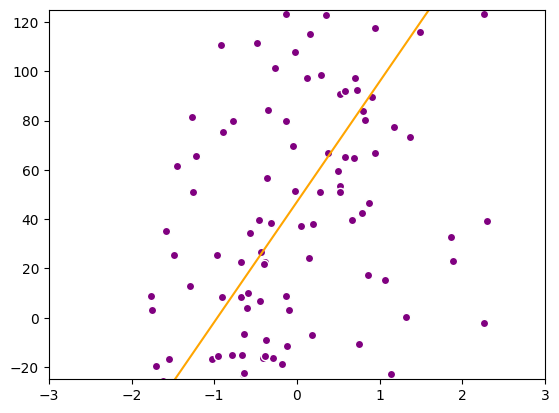

[160/200], loss: 45.01547693073746
[160/200], loss: 93.63252803049035
[160/200], loss: 211.86296667300127
[160/200], loss: 42.01508402850464
[160/200], loss: 78.25532611040941
[160/200], loss: 544.566366833973
[160/200], loss: 440.4485002115713
[160/200], loss: 58.148052057153514
[160/200], loss: 606.1999704082357
[160/200], loss: 4.436645179509667
[160/200], loss: 754.8225839705374
[160/200], loss: 28.808440320306687
[160/200], loss: 190.69914666360748
[160/200], loss: 19.784330408228094
[160/200], loss: 225.41716573272475
[160/200], loss: 1.6883886747161274
[160/200], loss: 399.3671544883544
[160/200], loss: 164.74518833830783
[160/200], loss: 0.8571024024094271
[160/200], loss: 17.706603673499295
[160/200], loss: 700.583621568247
[160/200], loss: 0.9364279971122407
[160/200], loss: 263.58134558718683
[160/200], loss: 176.60273757628482
[160/200], loss: 385.5120946754591
[160/200], loss: 421.5481664049134
[160/200], loss: 279.0890456935171
[160/200], loss: 9.898317359182498
[160/200]

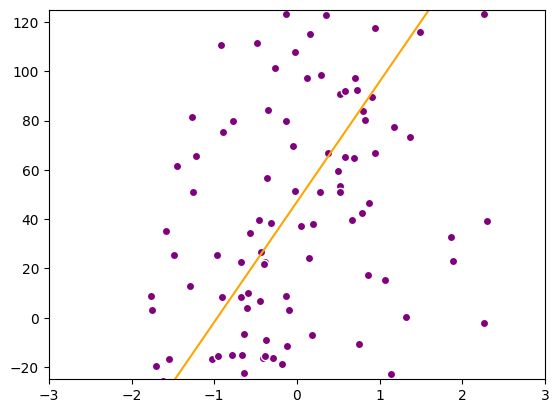

[161/200], loss: 45.01547693073692
[161/200], loss: 93.63252803049035
[161/200], loss: 211.86296667300127
[161/200], loss: 42.01508402850464
[161/200], loss: 78.25532611040923
[161/200], loss: 544.5663668339728
[161/200], loss: 440.44850021157106
[161/200], loss: 58.148052057153514
[161/200], loss: 606.1999704082357
[161/200], loss: 4.4366451795096244
[161/200], loss: 754.8225839705368
[161/200], loss: 28.808440320306797
[161/200], loss: 190.69914666360734
[161/200], loss: 19.784330408228094
[161/200], loss: 225.41716573272475
[161/200], loss: 1.6883886747161012
[161/200], loss: 399.36715448835423
[161/200], loss: 164.74518833830783
[161/200], loss: 0.8571024024094271
[161/200], loss: 17.706603673499295
[161/200], loss: 700.5836215682465
[161/200], loss: 0.9364279971122407
[161/200], loss: 263.58134558718683
[161/200], loss: 176.60273757628497
[161/200], loss: 385.5120946754591
[161/200], loss: 421.5481664049134
[161/200], loss: 279.08904569351677
[161/200], loss: 9.898317359182514
[16

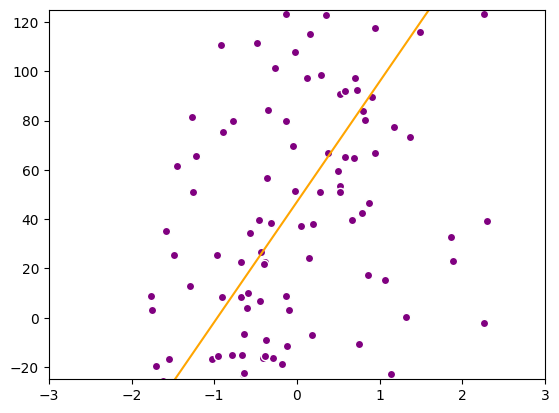

[162/200], loss: 45.01547693073746
[162/200], loss: 93.63252803049035
[162/200], loss: 211.86296667300127
[162/200], loss: 42.01508402850464
[162/200], loss: 78.25532611040941
[162/200], loss: 544.566366833973
[162/200], loss: 440.4485002115713
[162/200], loss: 58.148052057153514
[162/200], loss: 606.1999704082357
[162/200], loss: 4.436645179509667
[162/200], loss: 754.8225839705374
[162/200], loss: 28.808440320306687
[162/200], loss: 190.69914666360748
[162/200], loss: 19.784330408228094
[162/200], loss: 225.41716573272475
[162/200], loss: 1.6883886747161274
[162/200], loss: 399.3671544883544
[162/200], loss: 164.74518833830783
[162/200], loss: 0.8571024024094271
[162/200], loss: 17.706603673499295
[162/200], loss: 700.583621568247
[162/200], loss: 0.9364279971122407
[162/200], loss: 263.58134558718683
[162/200], loss: 176.60273757628482
[162/200], loss: 385.5120946754591
[162/200], loss: 421.5481664049134
[162/200], loss: 279.0890456935171
[162/200], loss: 9.898317359182498
[162/200]

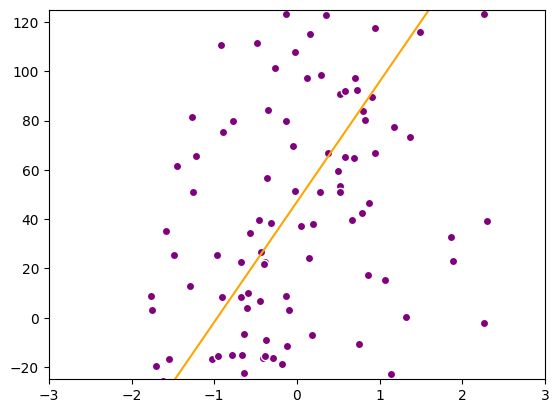

[163/200], loss: 45.01547693073692
[163/200], loss: 93.63252803049035
[163/200], loss: 211.86296667300127
[163/200], loss: 42.01508402850464
[163/200], loss: 78.25532611040923
[163/200], loss: 544.5663668339728
[163/200], loss: 440.44850021157106
[163/200], loss: 58.148052057153514
[163/200], loss: 606.1999704082357
[163/200], loss: 4.4366451795096244
[163/200], loss: 754.8225839705368
[163/200], loss: 28.808440320306797
[163/200], loss: 190.69914666360734
[163/200], loss: 19.784330408228094
[163/200], loss: 225.41716573272475
[163/200], loss: 1.6883886747161012
[163/200], loss: 399.36715448835423
[163/200], loss: 164.74518833830783
[163/200], loss: 0.8571024024094271
[163/200], loss: 17.706603673499295
[163/200], loss: 700.5836215682465
[163/200], loss: 0.9364279971122407
[163/200], loss: 263.58134558718683
[163/200], loss: 176.60273757628497
[163/200], loss: 385.5120946754591
[163/200], loss: 421.5481664049134
[163/200], loss: 279.08904569351677
[163/200], loss: 9.898317359182514
[16

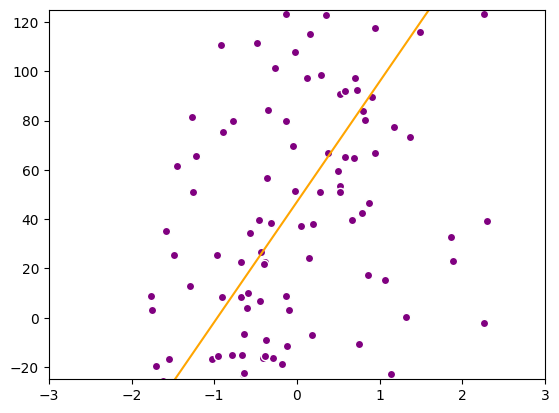

[164/200], loss: 45.01547693073746
[164/200], loss: 93.63252803049035
[164/200], loss: 211.86296667300127
[164/200], loss: 42.01508402850464
[164/200], loss: 78.25532611040941
[164/200], loss: 544.566366833973
[164/200], loss: 440.4485002115713
[164/200], loss: 58.148052057153514
[164/200], loss: 606.1999704082357
[164/200], loss: 4.436645179509667
[164/200], loss: 754.8225839705374
[164/200], loss: 28.808440320306687
[164/200], loss: 190.69914666360748
[164/200], loss: 19.784330408228094
[164/200], loss: 225.41716573272475
[164/200], loss: 1.6883886747161274
[164/200], loss: 399.3671544883544
[164/200], loss: 164.74518833830783
[164/200], loss: 0.8571024024094271
[164/200], loss: 17.706603673499295
[164/200], loss: 700.583621568247
[164/200], loss: 0.9364279971122407
[164/200], loss: 263.58134558718683
[164/200], loss: 176.60273757628482
[164/200], loss: 385.5120946754591
[164/200], loss: 421.5481664049134
[164/200], loss: 279.0890456935171
[164/200], loss: 9.898317359182498
[164/200]

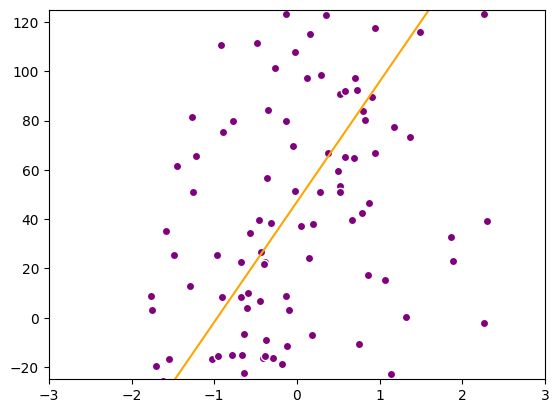

[165/200], loss: 45.01547693073692
[165/200], loss: 93.63252803049035
[165/200], loss: 211.86296667300127
[165/200], loss: 42.01508402850464
[165/200], loss: 78.25532611040923
[165/200], loss: 544.5663668339728
[165/200], loss: 440.44850021157106
[165/200], loss: 58.148052057153514
[165/200], loss: 606.1999704082357
[165/200], loss: 4.4366451795096244
[165/200], loss: 754.8225839705368
[165/200], loss: 28.808440320306797
[165/200], loss: 190.69914666360734
[165/200], loss: 19.784330408228094
[165/200], loss: 225.41716573272475
[165/200], loss: 1.6883886747161012
[165/200], loss: 399.36715448835423
[165/200], loss: 164.74518833830783
[165/200], loss: 0.8571024024094271
[165/200], loss: 17.706603673499295
[165/200], loss: 700.5836215682465
[165/200], loss: 0.9364279971122407
[165/200], loss: 263.58134558718683
[165/200], loss: 176.60273757628497
[165/200], loss: 385.5120946754591
[165/200], loss: 421.5481664049134
[165/200], loss: 279.08904569351677
[165/200], loss: 9.898317359182514
[16

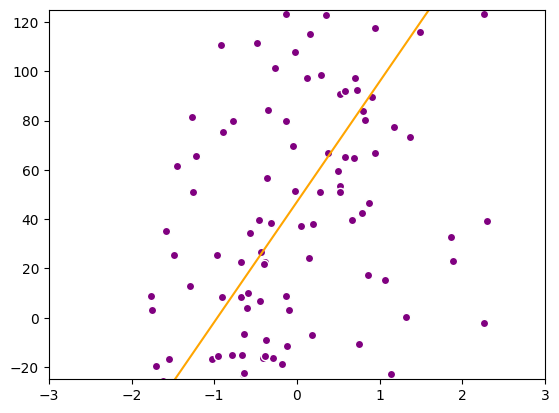

[166/200], loss: 45.01547693073746
[166/200], loss: 93.63252803049035
[166/200], loss: 211.86296667300127
[166/200], loss: 42.01508402850464
[166/200], loss: 78.25532611040941
[166/200], loss: 544.566366833973
[166/200], loss: 440.4485002115713
[166/200], loss: 58.148052057153514
[166/200], loss: 606.1999704082357
[166/200], loss: 4.436645179509667
[166/200], loss: 754.8225839705374
[166/200], loss: 28.808440320306687
[166/200], loss: 190.69914666360748
[166/200], loss: 19.784330408228094
[166/200], loss: 225.41716573272475
[166/200], loss: 1.6883886747161274
[166/200], loss: 399.3671544883544
[166/200], loss: 164.74518833830783
[166/200], loss: 0.8571024024094271
[166/200], loss: 17.706603673499295
[166/200], loss: 700.583621568247
[166/200], loss: 0.9364279971122407
[166/200], loss: 263.58134558718683
[166/200], loss: 176.60273757628482
[166/200], loss: 385.5120946754591
[166/200], loss: 421.5481664049134
[166/200], loss: 279.0890456935171
[166/200], loss: 9.898317359182498
[166/200]

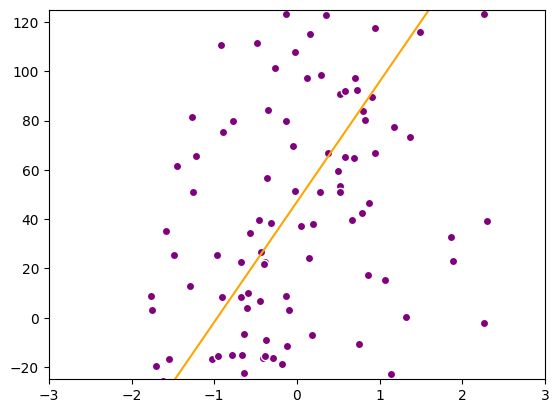

[167/200], loss: 45.01547693073692
[167/200], loss: 93.63252803049035
[167/200], loss: 211.86296667300127
[167/200], loss: 42.01508402850464
[167/200], loss: 78.25532611040923
[167/200], loss: 544.5663668339728
[167/200], loss: 440.44850021157106
[167/200], loss: 58.148052057153514
[167/200], loss: 606.1999704082357
[167/200], loss: 4.4366451795096244
[167/200], loss: 754.8225839705368
[167/200], loss: 28.808440320306797
[167/200], loss: 190.69914666360734
[167/200], loss: 19.784330408228094
[167/200], loss: 225.41716573272475
[167/200], loss: 1.6883886747161012
[167/200], loss: 399.36715448835423
[167/200], loss: 164.74518833830783
[167/200], loss: 0.8571024024094271
[167/200], loss: 17.706603673499295
[167/200], loss: 700.5836215682465
[167/200], loss: 0.9364279971122407
[167/200], loss: 263.58134558718683
[167/200], loss: 176.60273757628497
[167/200], loss: 385.5120946754591
[167/200], loss: 421.5481664049134
[167/200], loss: 279.08904569351677
[167/200], loss: 9.898317359182514
[16

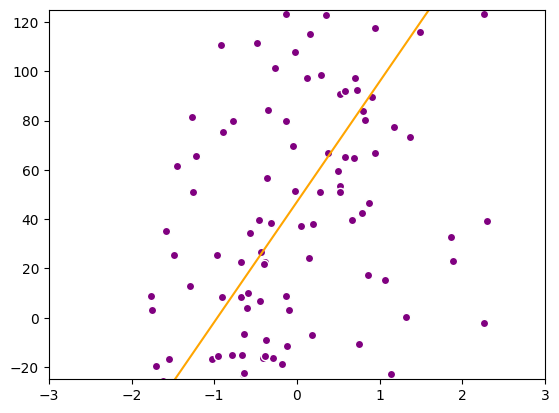

[168/200], loss: 45.01547693073746
[168/200], loss: 93.63252803049035
[168/200], loss: 211.86296667300127
[168/200], loss: 42.01508402850464
[168/200], loss: 78.25532611040941
[168/200], loss: 544.566366833973
[168/200], loss: 440.4485002115713
[168/200], loss: 58.148052057153514
[168/200], loss: 606.1999704082357
[168/200], loss: 4.436645179509667
[168/200], loss: 754.8225839705374
[168/200], loss: 28.808440320306687
[168/200], loss: 190.69914666360748
[168/200], loss: 19.784330408228094
[168/200], loss: 225.41716573272475
[168/200], loss: 1.6883886747161274
[168/200], loss: 399.3671544883544
[168/200], loss: 164.74518833830783
[168/200], loss: 0.8571024024094271
[168/200], loss: 17.706603673499295
[168/200], loss: 700.583621568247
[168/200], loss: 0.9364279971122407
[168/200], loss: 263.58134558718683
[168/200], loss: 176.60273757628482
[168/200], loss: 385.5120946754591
[168/200], loss: 421.5481664049134
[168/200], loss: 279.0890456935171
[168/200], loss: 9.898317359182498
[168/200]

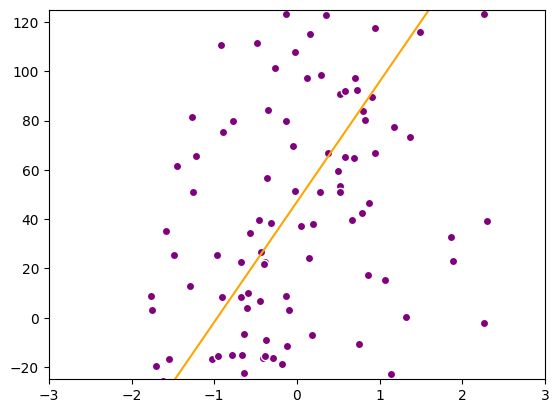

[169/200], loss: 45.01547693073692
[169/200], loss: 93.63252803049035
[169/200], loss: 211.86296667300127
[169/200], loss: 42.01508402850464
[169/200], loss: 78.25532611040923
[169/200], loss: 544.5663668339728
[169/200], loss: 440.44850021157106
[169/200], loss: 58.148052057153514
[169/200], loss: 606.1999704082357
[169/200], loss: 4.4366451795096244
[169/200], loss: 754.8225839705368
[169/200], loss: 28.808440320306797
[169/200], loss: 190.69914666360734
[169/200], loss: 19.784330408228094
[169/200], loss: 225.41716573272475
[169/200], loss: 1.6883886747161012
[169/200], loss: 399.36715448835423
[169/200], loss: 164.74518833830783
[169/200], loss: 0.8571024024094271
[169/200], loss: 17.706603673499295
[169/200], loss: 700.5836215682465
[169/200], loss: 0.9364279971122407
[169/200], loss: 263.58134558718683
[169/200], loss: 176.60273757628497
[169/200], loss: 385.5120946754591
[169/200], loss: 421.5481664049134
[169/200], loss: 279.08904569351677
[169/200], loss: 9.898317359182514
[16

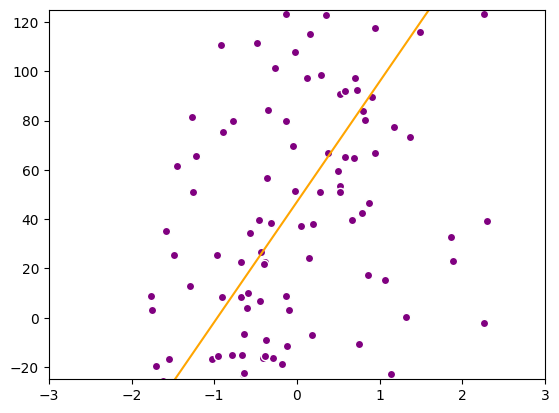

[170/200], loss: 45.01547693073746
[170/200], loss: 93.63252803049035
[170/200], loss: 211.86296667300127
[170/200], loss: 42.01508402850464
[170/200], loss: 78.25532611040941
[170/200], loss: 544.566366833973
[170/200], loss: 440.4485002115713
[170/200], loss: 58.148052057153514
[170/200], loss: 606.1999704082357
[170/200], loss: 4.436645179509667
[170/200], loss: 754.8225839705374
[170/200], loss: 28.808440320306687
[170/200], loss: 190.69914666360748
[170/200], loss: 19.784330408228094
[170/200], loss: 225.41716573272475
[170/200], loss: 1.6883886747161274
[170/200], loss: 399.3671544883544
[170/200], loss: 164.74518833830783
[170/200], loss: 0.8571024024094271
[170/200], loss: 17.706603673499295
[170/200], loss: 700.583621568247
[170/200], loss: 0.9364279971122407
[170/200], loss: 263.58134558718683
[170/200], loss: 176.60273757628482
[170/200], loss: 385.5120946754591
[170/200], loss: 421.5481664049134
[170/200], loss: 279.0890456935171
[170/200], loss: 9.898317359182498
[170/200]

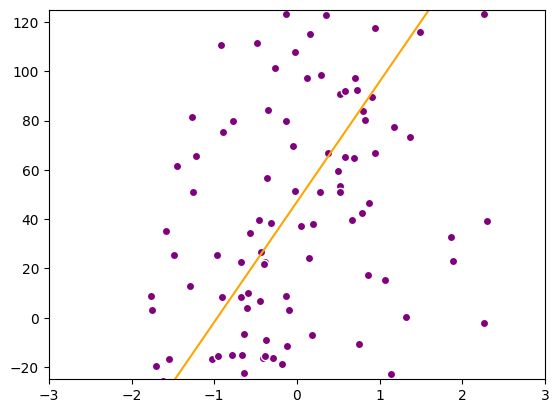

[171/200], loss: 45.01547693073692
[171/200], loss: 93.63252803049035
[171/200], loss: 211.86296667300127
[171/200], loss: 42.01508402850464
[171/200], loss: 78.25532611040923
[171/200], loss: 544.5663668339728
[171/200], loss: 440.44850021157106
[171/200], loss: 58.148052057153514
[171/200], loss: 606.1999704082357
[171/200], loss: 4.4366451795096244
[171/200], loss: 754.8225839705368
[171/200], loss: 28.808440320306797
[171/200], loss: 190.69914666360734
[171/200], loss: 19.784330408228094
[171/200], loss: 225.41716573272475
[171/200], loss: 1.6883886747161012
[171/200], loss: 399.36715448835423
[171/200], loss: 164.74518833830783
[171/200], loss: 0.8571024024094271
[171/200], loss: 17.706603673499295
[171/200], loss: 700.5836215682465
[171/200], loss: 0.9364279971122407
[171/200], loss: 263.58134558718683
[171/200], loss: 176.60273757628497
[171/200], loss: 385.5120946754591
[171/200], loss: 421.5481664049134
[171/200], loss: 279.08904569351677
[171/200], loss: 9.898317359182514
[17

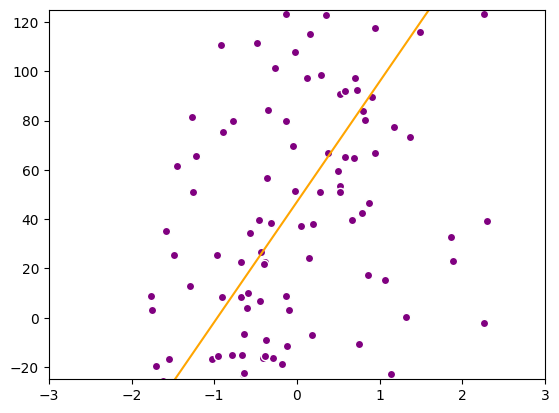

[172/200], loss: 45.01547693073746
[172/200], loss: 93.63252803049035
[172/200], loss: 211.86296667300127
[172/200], loss: 42.01508402850464
[172/200], loss: 78.25532611040941
[172/200], loss: 544.566366833973
[172/200], loss: 440.4485002115713
[172/200], loss: 58.148052057153514
[172/200], loss: 606.1999704082357
[172/200], loss: 4.436645179509667
[172/200], loss: 754.8225839705374
[172/200], loss: 28.808440320306687
[172/200], loss: 190.69914666360748
[172/200], loss: 19.784330408228094
[172/200], loss: 225.41716573272475
[172/200], loss: 1.6883886747161274
[172/200], loss: 399.3671544883544
[172/200], loss: 164.74518833830783
[172/200], loss: 0.8571024024094271
[172/200], loss: 17.706603673499295
[172/200], loss: 700.583621568247
[172/200], loss: 0.9364279971122407
[172/200], loss: 263.58134558718683
[172/200], loss: 176.60273757628482
[172/200], loss: 385.5120946754591
[172/200], loss: 421.5481664049134
[172/200], loss: 279.0890456935171
[172/200], loss: 9.898317359182498
[172/200]

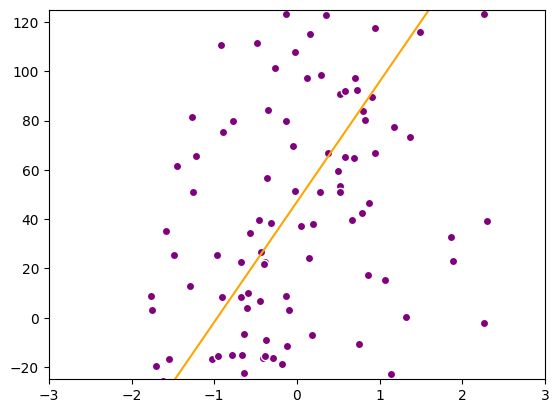

[173/200], loss: 45.01547693073692
[173/200], loss: 93.63252803049035
[173/200], loss: 211.86296667300127
[173/200], loss: 42.01508402850464
[173/200], loss: 78.25532611040923
[173/200], loss: 544.5663668339728
[173/200], loss: 440.44850021157106
[173/200], loss: 58.148052057153514
[173/200], loss: 606.1999704082357
[173/200], loss: 4.4366451795096244
[173/200], loss: 754.8225839705368
[173/200], loss: 28.808440320306797
[173/200], loss: 190.69914666360734
[173/200], loss: 19.784330408228094
[173/200], loss: 225.41716573272475
[173/200], loss: 1.6883886747161012
[173/200], loss: 399.36715448835423
[173/200], loss: 164.74518833830783
[173/200], loss: 0.8571024024094271
[173/200], loss: 17.706603673499295
[173/200], loss: 700.5836215682465
[173/200], loss: 0.9364279971122407
[173/200], loss: 263.58134558718683
[173/200], loss: 176.60273757628497
[173/200], loss: 385.5120946754591
[173/200], loss: 421.5481664049134
[173/200], loss: 279.08904569351677
[173/200], loss: 9.898317359182514
[17

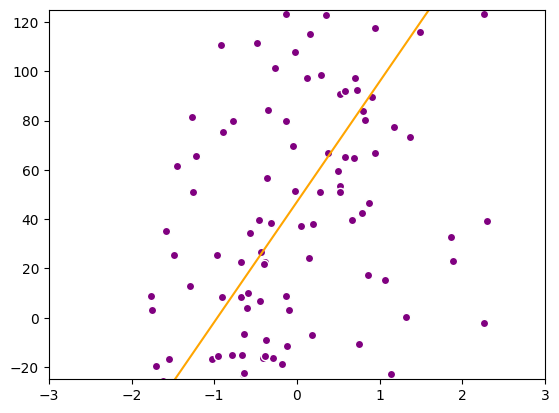

[174/200], loss: 45.01547693073746
[174/200], loss: 93.63252803049035
[174/200], loss: 211.86296667300127
[174/200], loss: 42.01508402850464
[174/200], loss: 78.25532611040941
[174/200], loss: 544.566366833973
[174/200], loss: 440.4485002115713
[174/200], loss: 58.148052057153514
[174/200], loss: 606.1999704082357
[174/200], loss: 4.436645179509667
[174/200], loss: 754.8225839705374
[174/200], loss: 28.808440320306687
[174/200], loss: 190.69914666360748
[174/200], loss: 19.784330408228094
[174/200], loss: 225.41716573272475
[174/200], loss: 1.6883886747161274
[174/200], loss: 399.3671544883544
[174/200], loss: 164.74518833830783
[174/200], loss: 0.8571024024094271
[174/200], loss: 17.706603673499295
[174/200], loss: 700.583621568247
[174/200], loss: 0.9364279971122407
[174/200], loss: 263.58134558718683
[174/200], loss: 176.60273757628482
[174/200], loss: 385.5120946754591
[174/200], loss: 421.5481664049134
[174/200], loss: 279.0890456935171
[174/200], loss: 9.898317359182498
[174/200]

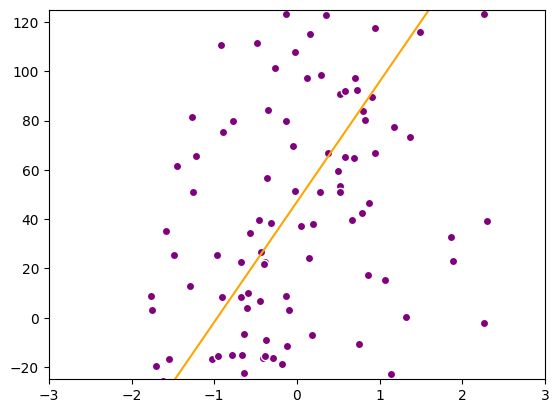

[175/200], loss: 45.01547693073692
[175/200], loss: 93.63252803049035
[175/200], loss: 211.86296667300127
[175/200], loss: 42.01508402850464
[175/200], loss: 78.25532611040923
[175/200], loss: 544.5663668339728
[175/200], loss: 440.44850021157106
[175/200], loss: 58.148052057153514
[175/200], loss: 606.1999704082357
[175/200], loss: 4.4366451795096244
[175/200], loss: 754.8225839705368
[175/200], loss: 28.808440320306797
[175/200], loss: 190.69914666360734
[175/200], loss: 19.784330408228094
[175/200], loss: 225.41716573272475
[175/200], loss: 1.6883886747161012
[175/200], loss: 399.36715448835423
[175/200], loss: 164.74518833830783
[175/200], loss: 0.8571024024094271
[175/200], loss: 17.706603673499295
[175/200], loss: 700.5836215682465
[175/200], loss: 0.9364279971122407
[175/200], loss: 263.58134558718683
[175/200], loss: 176.60273757628497
[175/200], loss: 385.5120946754591
[175/200], loss: 421.5481664049134
[175/200], loss: 279.08904569351677
[175/200], loss: 9.898317359182514
[17

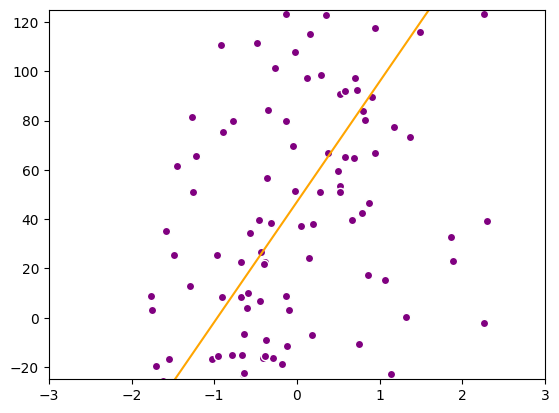

[176/200], loss: 45.01547693073746
[176/200], loss: 93.63252803049035
[176/200], loss: 211.86296667300127
[176/200], loss: 42.01508402850464
[176/200], loss: 78.25532611040941
[176/200], loss: 544.566366833973
[176/200], loss: 440.4485002115713
[176/200], loss: 58.148052057153514
[176/200], loss: 606.1999704082357
[176/200], loss: 4.436645179509667
[176/200], loss: 754.8225839705374
[176/200], loss: 28.808440320306687
[176/200], loss: 190.69914666360748
[176/200], loss: 19.784330408228094
[176/200], loss: 225.41716573272475
[176/200], loss: 1.6883886747161274
[176/200], loss: 399.3671544883544
[176/200], loss: 164.74518833830783
[176/200], loss: 0.8571024024094271
[176/200], loss: 17.706603673499295
[176/200], loss: 700.583621568247
[176/200], loss: 0.9364279971122407
[176/200], loss: 263.58134558718683
[176/200], loss: 176.60273757628482
[176/200], loss: 385.5120946754591
[176/200], loss: 421.5481664049134
[176/200], loss: 279.0890456935171
[176/200], loss: 9.898317359182498
[176/200]

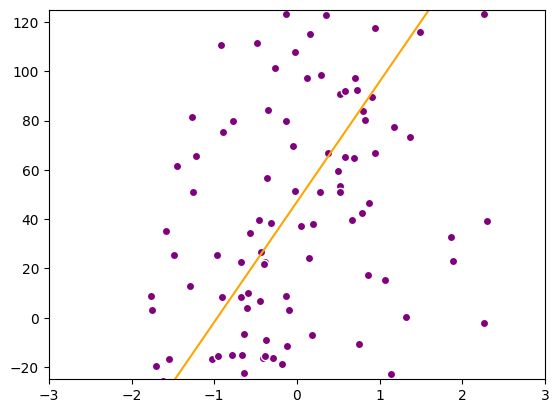

[177/200], loss: 45.01547693073692
[177/200], loss: 93.63252803049035
[177/200], loss: 211.86296667300127
[177/200], loss: 42.01508402850464
[177/200], loss: 78.25532611040923
[177/200], loss: 544.5663668339728
[177/200], loss: 440.44850021157106
[177/200], loss: 58.148052057153514
[177/200], loss: 606.1999704082357
[177/200], loss: 4.4366451795096244
[177/200], loss: 754.8225839705368
[177/200], loss: 28.808440320306797
[177/200], loss: 190.69914666360734
[177/200], loss: 19.784330408228094
[177/200], loss: 225.41716573272475
[177/200], loss: 1.6883886747161012
[177/200], loss: 399.36715448835423
[177/200], loss: 164.74518833830783
[177/200], loss: 0.8571024024094271
[177/200], loss: 17.706603673499295
[177/200], loss: 700.5836215682465
[177/200], loss: 0.9364279971122407
[177/200], loss: 263.58134558718683
[177/200], loss: 176.60273757628497
[177/200], loss: 385.5120946754591
[177/200], loss: 421.5481664049134
[177/200], loss: 279.08904569351677
[177/200], loss: 9.898317359182514
[17

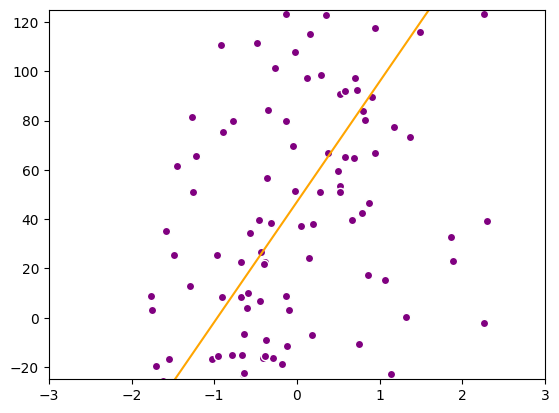

[178/200], loss: 45.01547693073746
[178/200], loss: 93.63252803049035
[178/200], loss: 211.86296667300127
[178/200], loss: 42.01508402850464
[178/200], loss: 78.25532611040941
[178/200], loss: 544.566366833973
[178/200], loss: 440.4485002115713
[178/200], loss: 58.148052057153514
[178/200], loss: 606.1999704082357
[178/200], loss: 4.436645179509667
[178/200], loss: 754.8225839705374
[178/200], loss: 28.808440320306687
[178/200], loss: 190.69914666360748
[178/200], loss: 19.784330408228094
[178/200], loss: 225.41716573272475
[178/200], loss: 1.6883886747161274
[178/200], loss: 399.3671544883544
[178/200], loss: 164.74518833830783
[178/200], loss: 0.8571024024094271
[178/200], loss: 17.706603673499295
[178/200], loss: 700.583621568247
[178/200], loss: 0.9364279971122407
[178/200], loss: 263.58134558718683
[178/200], loss: 176.60273757628482
[178/200], loss: 385.5120946754591
[178/200], loss: 421.5481664049134
[178/200], loss: 279.0890456935171
[178/200], loss: 9.898317359182498
[178/200]

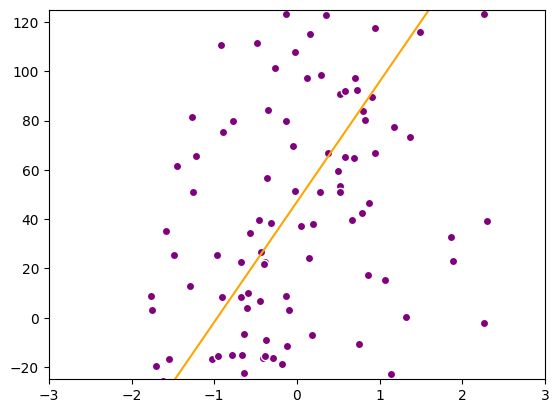

[179/200], loss: 45.01547693073692
[179/200], loss: 93.63252803049035
[179/200], loss: 211.86296667300127
[179/200], loss: 42.01508402850464
[179/200], loss: 78.25532611040923
[179/200], loss: 544.5663668339728
[179/200], loss: 440.44850021157106
[179/200], loss: 58.148052057153514
[179/200], loss: 606.1999704082357
[179/200], loss: 4.4366451795096244
[179/200], loss: 754.8225839705368
[179/200], loss: 28.808440320306797
[179/200], loss: 190.69914666360734
[179/200], loss: 19.784330408228094
[179/200], loss: 225.41716573272475
[179/200], loss: 1.6883886747161012
[179/200], loss: 399.36715448835423
[179/200], loss: 164.74518833830783
[179/200], loss: 0.8571024024094271
[179/200], loss: 17.706603673499295
[179/200], loss: 700.5836215682465
[179/200], loss: 0.9364279971122407
[179/200], loss: 263.58134558718683
[179/200], loss: 176.60273757628497
[179/200], loss: 385.5120946754591
[179/200], loss: 421.5481664049134
[179/200], loss: 279.08904569351677
[179/200], loss: 9.898317359182514
[17

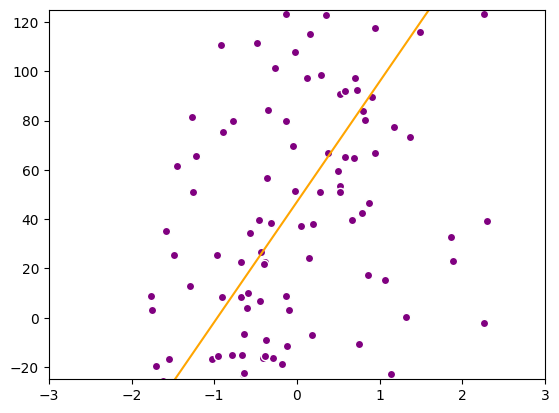

[180/200], loss: 45.01547693073746
[180/200], loss: 93.63252803049035
[180/200], loss: 211.86296667300127
[180/200], loss: 42.01508402850464
[180/200], loss: 78.25532611040941
[180/200], loss: 544.566366833973
[180/200], loss: 440.4485002115713
[180/200], loss: 58.148052057153514
[180/200], loss: 606.1999704082357
[180/200], loss: 4.436645179509667
[180/200], loss: 754.8225839705374
[180/200], loss: 28.808440320306687
[180/200], loss: 190.69914666360748
[180/200], loss: 19.784330408228094
[180/200], loss: 225.41716573272475
[180/200], loss: 1.6883886747161274
[180/200], loss: 399.3671544883544
[180/200], loss: 164.74518833830783
[180/200], loss: 0.8571024024094271
[180/200], loss: 17.706603673499295
[180/200], loss: 700.583621568247
[180/200], loss: 0.9364279971122407
[180/200], loss: 263.58134558718683
[180/200], loss: 176.60273757628482
[180/200], loss: 385.5120946754591
[180/200], loss: 421.5481664049134
[180/200], loss: 279.0890456935171
[180/200], loss: 9.898317359182498
[180/200]

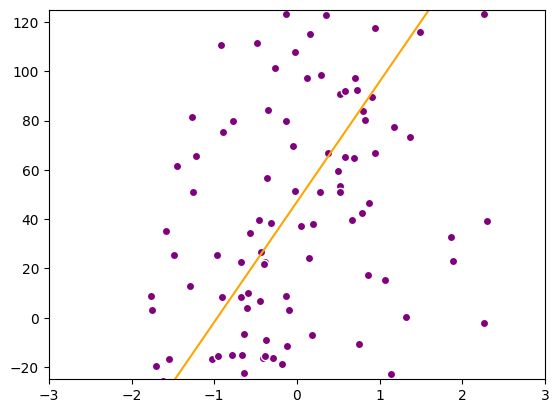

[181/200], loss: 45.01547693073692
[181/200], loss: 93.63252803049035
[181/200], loss: 211.86296667300127
[181/200], loss: 42.01508402850464
[181/200], loss: 78.25532611040923
[181/200], loss: 544.5663668339728
[181/200], loss: 440.44850021157106
[181/200], loss: 58.148052057153514
[181/200], loss: 606.1999704082357
[181/200], loss: 4.4366451795096244
[181/200], loss: 754.8225839705368
[181/200], loss: 28.808440320306797
[181/200], loss: 190.69914666360734
[181/200], loss: 19.784330408228094
[181/200], loss: 225.41716573272475
[181/200], loss: 1.6883886747161012
[181/200], loss: 399.36715448835423
[181/200], loss: 164.74518833830783
[181/200], loss: 0.8571024024094271
[181/200], loss: 17.706603673499295
[181/200], loss: 700.5836215682465
[181/200], loss: 0.9364279971122407
[181/200], loss: 263.58134558718683
[181/200], loss: 176.60273757628497
[181/200], loss: 385.5120946754591
[181/200], loss: 421.5481664049134
[181/200], loss: 279.08904569351677
[181/200], loss: 9.898317359182514
[18

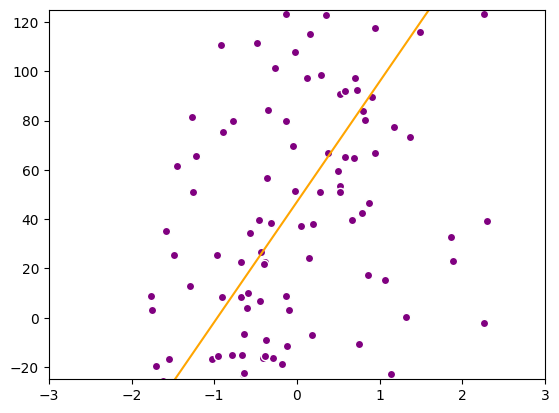

[182/200], loss: 45.01547693073746
[182/200], loss: 93.63252803049035
[182/200], loss: 211.86296667300127
[182/200], loss: 42.01508402850464
[182/200], loss: 78.25532611040941
[182/200], loss: 544.566366833973
[182/200], loss: 440.4485002115713
[182/200], loss: 58.148052057153514
[182/200], loss: 606.1999704082357
[182/200], loss: 4.436645179509667
[182/200], loss: 754.8225839705374
[182/200], loss: 28.808440320306687
[182/200], loss: 190.69914666360748
[182/200], loss: 19.784330408228094
[182/200], loss: 225.41716573272475
[182/200], loss: 1.6883886747161274
[182/200], loss: 399.3671544883544
[182/200], loss: 164.74518833830783
[182/200], loss: 0.8571024024094271
[182/200], loss: 17.706603673499295
[182/200], loss: 700.583621568247
[182/200], loss: 0.9364279971122407
[182/200], loss: 263.58134558718683
[182/200], loss: 176.60273757628482
[182/200], loss: 385.5120946754591
[182/200], loss: 421.5481664049134
[182/200], loss: 279.0890456935171
[182/200], loss: 9.898317359182498
[182/200]

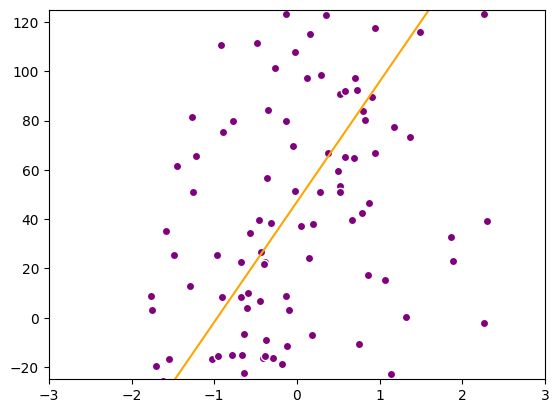

[183/200], loss: 45.01547693073692
[183/200], loss: 93.63252803049035
[183/200], loss: 211.86296667300127
[183/200], loss: 42.01508402850464
[183/200], loss: 78.25532611040923
[183/200], loss: 544.5663668339728
[183/200], loss: 440.44850021157106
[183/200], loss: 58.148052057153514
[183/200], loss: 606.1999704082357
[183/200], loss: 4.4366451795096244
[183/200], loss: 754.8225839705368
[183/200], loss: 28.808440320306797
[183/200], loss: 190.69914666360734
[183/200], loss: 19.784330408228094
[183/200], loss: 225.41716573272475
[183/200], loss: 1.6883886747161012
[183/200], loss: 399.36715448835423
[183/200], loss: 164.74518833830783
[183/200], loss: 0.8571024024094271
[183/200], loss: 17.706603673499295
[183/200], loss: 700.5836215682465
[183/200], loss: 0.9364279971122407
[183/200], loss: 263.58134558718683
[183/200], loss: 176.60273757628497
[183/200], loss: 385.5120946754591
[183/200], loss: 421.5481664049134
[183/200], loss: 279.08904569351677
[183/200], loss: 9.898317359182514
[18

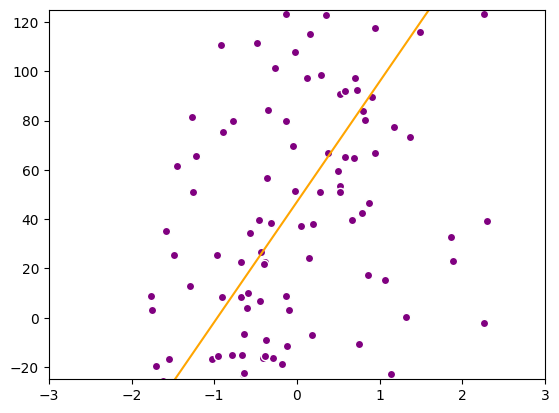

[184/200], loss: 45.01547693073746
[184/200], loss: 93.63252803049035
[184/200], loss: 211.86296667300127
[184/200], loss: 42.01508402850464
[184/200], loss: 78.25532611040941
[184/200], loss: 544.566366833973
[184/200], loss: 440.4485002115713
[184/200], loss: 58.148052057153514
[184/200], loss: 606.1999704082357
[184/200], loss: 4.436645179509667
[184/200], loss: 754.8225839705374
[184/200], loss: 28.808440320306687
[184/200], loss: 190.69914666360748
[184/200], loss: 19.784330408228094
[184/200], loss: 225.41716573272475
[184/200], loss: 1.6883886747161274
[184/200], loss: 399.3671544883544
[184/200], loss: 164.74518833830783
[184/200], loss: 0.8571024024094271
[184/200], loss: 17.706603673499295
[184/200], loss: 700.583621568247
[184/200], loss: 0.9364279971122407
[184/200], loss: 263.58134558718683
[184/200], loss: 176.60273757628482
[184/200], loss: 385.5120946754591
[184/200], loss: 421.5481664049134
[184/200], loss: 279.0890456935171
[184/200], loss: 9.898317359182498
[184/200]

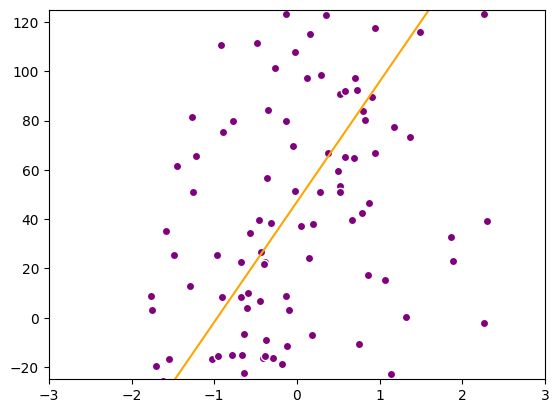

[185/200], loss: 45.01547693073692
[185/200], loss: 93.63252803049035
[185/200], loss: 211.86296667300127
[185/200], loss: 42.01508402850464
[185/200], loss: 78.25532611040923
[185/200], loss: 544.5663668339728
[185/200], loss: 440.44850021157106
[185/200], loss: 58.148052057153514
[185/200], loss: 606.1999704082357
[185/200], loss: 4.4366451795096244
[185/200], loss: 754.8225839705368
[185/200], loss: 28.808440320306797
[185/200], loss: 190.69914666360734
[185/200], loss: 19.784330408228094
[185/200], loss: 225.41716573272475
[185/200], loss: 1.6883886747161012
[185/200], loss: 399.36715448835423
[185/200], loss: 164.74518833830783
[185/200], loss: 0.8571024024094271
[185/200], loss: 17.706603673499295
[185/200], loss: 700.5836215682465
[185/200], loss: 0.9364279971122407
[185/200], loss: 263.58134558718683
[185/200], loss: 176.60273757628497
[185/200], loss: 385.5120946754591
[185/200], loss: 421.5481664049134
[185/200], loss: 279.08904569351677
[185/200], loss: 9.898317359182514
[18

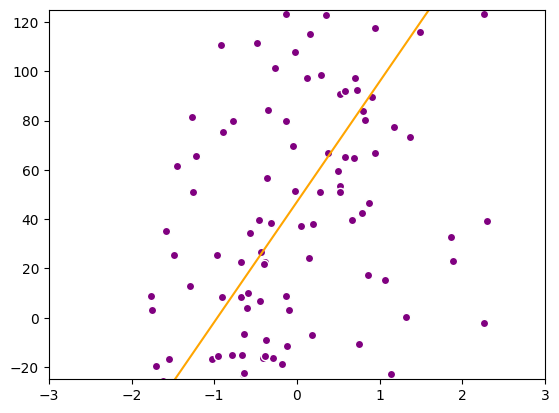

[186/200], loss: 45.01547693073746
[186/200], loss: 93.63252803049035
[186/200], loss: 211.86296667300127
[186/200], loss: 42.01508402850464
[186/200], loss: 78.25532611040941
[186/200], loss: 544.566366833973
[186/200], loss: 440.4485002115713
[186/200], loss: 58.148052057153514
[186/200], loss: 606.1999704082357
[186/200], loss: 4.436645179509667
[186/200], loss: 754.8225839705374
[186/200], loss: 28.808440320306687
[186/200], loss: 190.69914666360748
[186/200], loss: 19.784330408228094
[186/200], loss: 225.41716573272475
[186/200], loss: 1.6883886747161274
[186/200], loss: 399.3671544883544
[186/200], loss: 164.74518833830783
[186/200], loss: 0.8571024024094271
[186/200], loss: 17.706603673499295
[186/200], loss: 700.583621568247
[186/200], loss: 0.9364279971122407
[186/200], loss: 263.58134558718683
[186/200], loss: 176.60273757628482
[186/200], loss: 385.5120946754591
[186/200], loss: 421.5481664049134
[186/200], loss: 279.0890456935171
[186/200], loss: 9.898317359182498
[186/200]

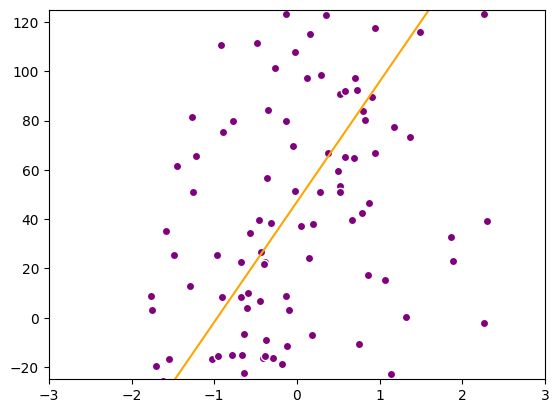

[187/200], loss: 45.01547693073692
[187/200], loss: 93.63252803049035
[187/200], loss: 211.86296667300127
[187/200], loss: 42.01508402850464
[187/200], loss: 78.25532611040923
[187/200], loss: 544.5663668339728
[187/200], loss: 440.44850021157106
[187/200], loss: 58.148052057153514
[187/200], loss: 606.1999704082357
[187/200], loss: 4.4366451795096244
[187/200], loss: 754.8225839705368
[187/200], loss: 28.808440320306797
[187/200], loss: 190.69914666360734
[187/200], loss: 19.784330408228094
[187/200], loss: 225.41716573272475
[187/200], loss: 1.6883886747161012
[187/200], loss: 399.36715448835423
[187/200], loss: 164.74518833830783
[187/200], loss: 0.8571024024094271
[187/200], loss: 17.706603673499295
[187/200], loss: 700.5836215682465
[187/200], loss: 0.9364279971122407
[187/200], loss: 263.58134558718683
[187/200], loss: 176.60273757628497
[187/200], loss: 385.5120946754591
[187/200], loss: 421.5481664049134
[187/200], loss: 279.08904569351677
[187/200], loss: 9.898317359182514
[18

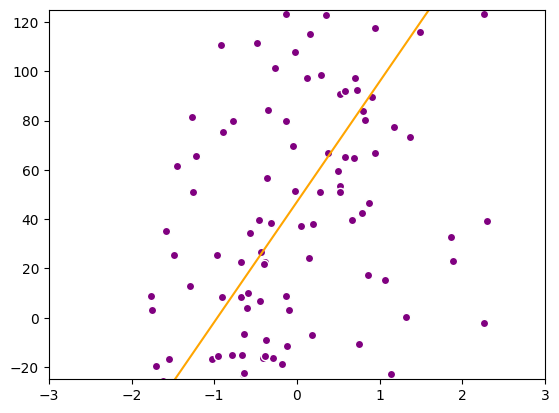

[188/200], loss: 45.01547693073746
[188/200], loss: 93.63252803049035
[188/200], loss: 211.86296667300127
[188/200], loss: 42.01508402850464
[188/200], loss: 78.25532611040941
[188/200], loss: 544.566366833973
[188/200], loss: 440.4485002115713
[188/200], loss: 58.148052057153514
[188/200], loss: 606.1999704082357
[188/200], loss: 4.436645179509667
[188/200], loss: 754.8225839705374
[188/200], loss: 28.808440320306687
[188/200], loss: 190.69914666360748
[188/200], loss: 19.784330408228094
[188/200], loss: 225.41716573272475
[188/200], loss: 1.6883886747161274
[188/200], loss: 399.3671544883544
[188/200], loss: 164.74518833830783
[188/200], loss: 0.8571024024094271
[188/200], loss: 17.706603673499295
[188/200], loss: 700.583621568247
[188/200], loss: 0.9364279971122407
[188/200], loss: 263.58134558718683
[188/200], loss: 176.60273757628482
[188/200], loss: 385.5120946754591
[188/200], loss: 421.5481664049134
[188/200], loss: 279.0890456935171
[188/200], loss: 9.898317359182498
[188/200]

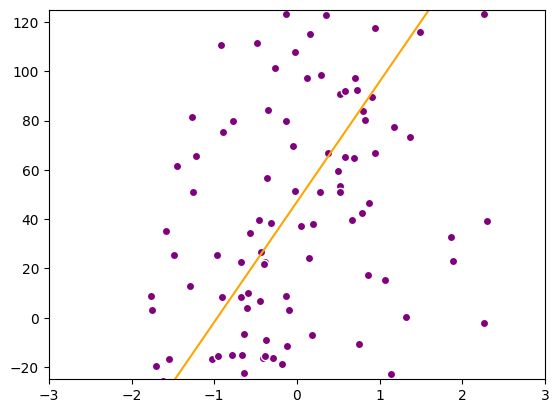

[189/200], loss: 45.01547693073692
[189/200], loss: 93.63252803049035
[189/200], loss: 211.86296667300127
[189/200], loss: 42.01508402850464
[189/200], loss: 78.25532611040923
[189/200], loss: 544.5663668339728
[189/200], loss: 440.44850021157106
[189/200], loss: 58.148052057153514
[189/200], loss: 606.1999704082357
[189/200], loss: 4.4366451795096244
[189/200], loss: 754.8225839705368
[189/200], loss: 28.808440320306797
[189/200], loss: 190.69914666360734
[189/200], loss: 19.784330408228094
[189/200], loss: 225.41716573272475
[189/200], loss: 1.6883886747161012
[189/200], loss: 399.36715448835423
[189/200], loss: 164.74518833830783
[189/200], loss: 0.8571024024094271
[189/200], loss: 17.706603673499295
[189/200], loss: 700.5836215682465
[189/200], loss: 0.9364279971122407
[189/200], loss: 263.58134558718683
[189/200], loss: 176.60273757628497
[189/200], loss: 385.5120946754591
[189/200], loss: 421.5481664049134
[189/200], loss: 279.08904569351677
[189/200], loss: 9.898317359182514
[18

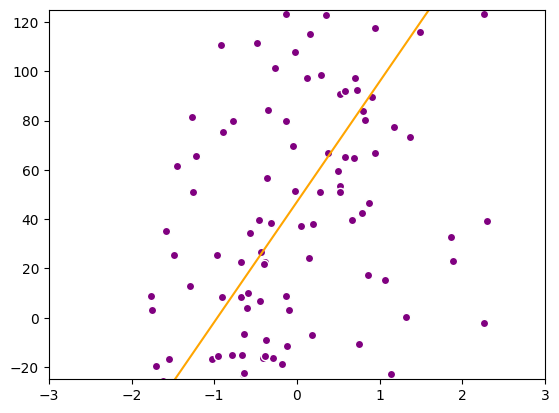

[190/200], loss: 45.01547693073746
[190/200], loss: 93.63252803049035
[190/200], loss: 211.86296667300127
[190/200], loss: 42.01508402850464
[190/200], loss: 78.25532611040941
[190/200], loss: 544.566366833973
[190/200], loss: 440.4485002115713
[190/200], loss: 58.148052057153514
[190/200], loss: 606.1999704082357
[190/200], loss: 4.436645179509667
[190/200], loss: 754.8225839705374
[190/200], loss: 28.808440320306687
[190/200], loss: 190.69914666360748
[190/200], loss: 19.784330408228094
[190/200], loss: 225.41716573272475
[190/200], loss: 1.6883886747161274
[190/200], loss: 399.3671544883544
[190/200], loss: 164.74518833830783
[190/200], loss: 0.8571024024094271
[190/200], loss: 17.706603673499295
[190/200], loss: 700.583621568247
[190/200], loss: 0.9364279971122407
[190/200], loss: 263.58134558718683
[190/200], loss: 176.60273757628482
[190/200], loss: 385.5120946754591
[190/200], loss: 421.5481664049134
[190/200], loss: 279.0890456935171
[190/200], loss: 9.898317359182498
[190/200]

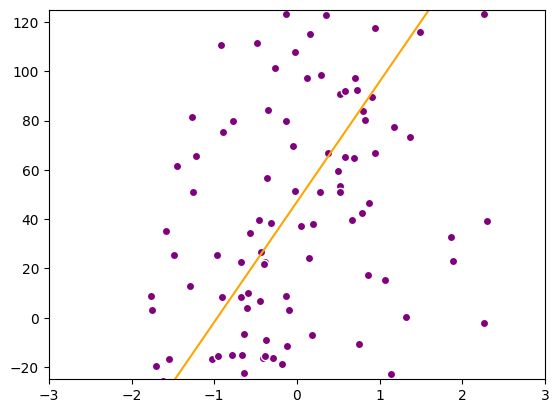

[191/200], loss: 45.01547693073692
[191/200], loss: 93.63252803049035
[191/200], loss: 211.86296667300127
[191/200], loss: 42.01508402850464
[191/200], loss: 78.25532611040923
[191/200], loss: 544.5663668339728
[191/200], loss: 440.44850021157106
[191/200], loss: 58.148052057153514
[191/200], loss: 606.1999704082357
[191/200], loss: 4.4366451795096244
[191/200], loss: 754.8225839705368
[191/200], loss: 28.808440320306797
[191/200], loss: 190.69914666360734
[191/200], loss: 19.784330408228094
[191/200], loss: 225.41716573272475
[191/200], loss: 1.6883886747161012
[191/200], loss: 399.36715448835423
[191/200], loss: 164.74518833830783
[191/200], loss: 0.8571024024094271
[191/200], loss: 17.706603673499295
[191/200], loss: 700.5836215682465
[191/200], loss: 0.9364279971122407
[191/200], loss: 263.58134558718683
[191/200], loss: 176.60273757628497
[191/200], loss: 385.5120946754591
[191/200], loss: 421.5481664049134
[191/200], loss: 279.08904569351677
[191/200], loss: 9.898317359182514
[19

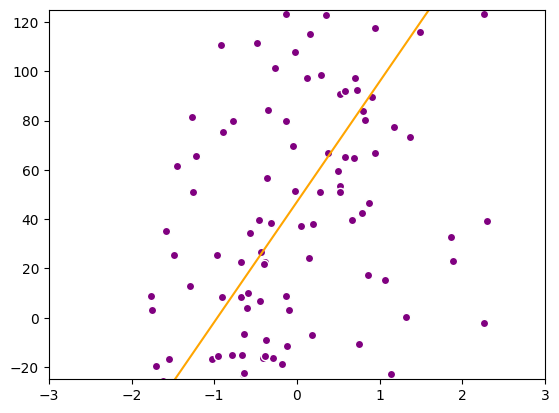

[192/200], loss: 45.01547693073746
[192/200], loss: 93.63252803049035
[192/200], loss: 211.86296667300127
[192/200], loss: 42.01508402850464
[192/200], loss: 78.25532611040941
[192/200], loss: 544.566366833973
[192/200], loss: 440.4485002115713
[192/200], loss: 58.148052057153514
[192/200], loss: 606.1999704082357
[192/200], loss: 4.436645179509667
[192/200], loss: 754.8225839705374
[192/200], loss: 28.808440320306687
[192/200], loss: 190.69914666360748
[192/200], loss: 19.784330408228094
[192/200], loss: 225.41716573272475
[192/200], loss: 1.6883886747161274
[192/200], loss: 399.3671544883544
[192/200], loss: 164.74518833830783
[192/200], loss: 0.8571024024094271
[192/200], loss: 17.706603673499295
[192/200], loss: 700.583621568247
[192/200], loss: 0.9364279971122407
[192/200], loss: 263.58134558718683
[192/200], loss: 176.60273757628482
[192/200], loss: 385.5120946754591
[192/200], loss: 421.5481664049134
[192/200], loss: 279.0890456935171
[192/200], loss: 9.898317359182498
[192/200]

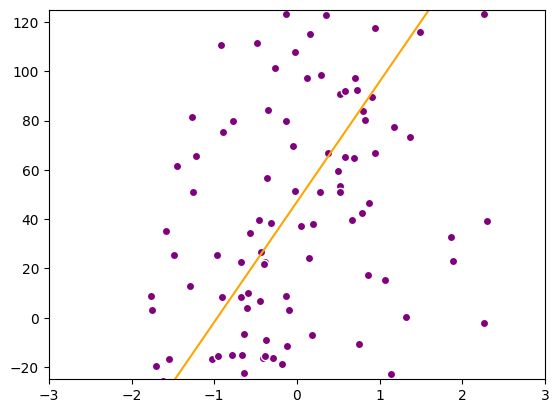

[193/200], loss: 45.01547693073692
[193/200], loss: 93.63252803049035
[193/200], loss: 211.86296667300127
[193/200], loss: 42.01508402850464
[193/200], loss: 78.25532611040923
[193/200], loss: 544.5663668339728
[193/200], loss: 440.44850021157106
[193/200], loss: 58.148052057153514
[193/200], loss: 606.1999704082357
[193/200], loss: 4.4366451795096244
[193/200], loss: 754.8225839705368
[193/200], loss: 28.808440320306797
[193/200], loss: 190.69914666360734
[193/200], loss: 19.784330408228094
[193/200], loss: 225.41716573272475
[193/200], loss: 1.6883886747161012
[193/200], loss: 399.36715448835423
[193/200], loss: 164.74518833830783
[193/200], loss: 0.8571024024094271
[193/200], loss: 17.706603673499295
[193/200], loss: 700.5836215682465
[193/200], loss: 0.9364279971122407
[193/200], loss: 263.58134558718683
[193/200], loss: 176.60273757628497
[193/200], loss: 385.5120946754591
[193/200], loss: 421.5481664049134
[193/200], loss: 279.08904569351677
[193/200], loss: 9.898317359182514
[19

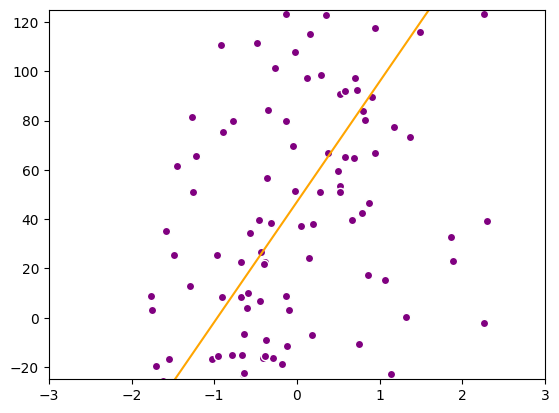

[194/200], loss: 45.01547693073746
[194/200], loss: 93.63252803049035
[194/200], loss: 211.86296667300127
[194/200], loss: 42.01508402850464
[194/200], loss: 78.25532611040941
[194/200], loss: 544.566366833973
[194/200], loss: 440.4485002115713
[194/200], loss: 58.148052057153514
[194/200], loss: 606.1999704082357
[194/200], loss: 4.436645179509667
[194/200], loss: 754.8225839705374
[194/200], loss: 28.808440320306687
[194/200], loss: 190.69914666360748
[194/200], loss: 19.784330408228094
[194/200], loss: 225.41716573272475
[194/200], loss: 1.6883886747161274
[194/200], loss: 399.3671544883544
[194/200], loss: 164.74518833830783
[194/200], loss: 0.8571024024094271
[194/200], loss: 17.706603673499295
[194/200], loss: 700.583621568247
[194/200], loss: 0.9364279971122407
[194/200], loss: 263.58134558718683
[194/200], loss: 176.60273757628482
[194/200], loss: 385.5120946754591
[194/200], loss: 421.5481664049134
[194/200], loss: 279.0890456935171
[194/200], loss: 9.898317359182498
[194/200]

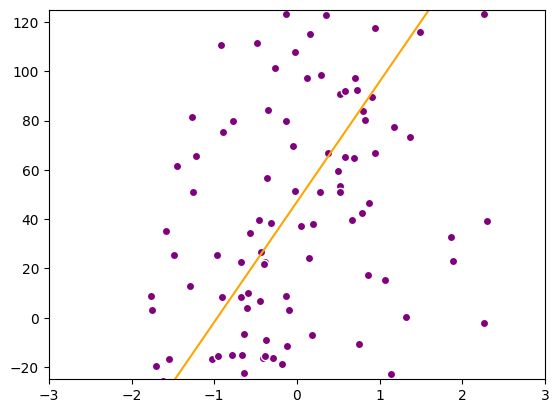

[195/200], loss: 45.01547693073692
[195/200], loss: 93.63252803049035
[195/200], loss: 211.86296667300127
[195/200], loss: 42.01508402850464
[195/200], loss: 78.25532611040923
[195/200], loss: 544.5663668339728
[195/200], loss: 440.44850021157106
[195/200], loss: 58.148052057153514
[195/200], loss: 606.1999704082357
[195/200], loss: 4.4366451795096244
[195/200], loss: 754.8225839705368
[195/200], loss: 28.808440320306797
[195/200], loss: 190.69914666360734
[195/200], loss: 19.784330408228094
[195/200], loss: 225.41716573272475
[195/200], loss: 1.6883886747161012
[195/200], loss: 399.36715448835423
[195/200], loss: 164.74518833830783
[195/200], loss: 0.8571024024094271
[195/200], loss: 17.706603673499295
[195/200], loss: 700.5836215682465
[195/200], loss: 0.9364279971122407
[195/200], loss: 263.58134558718683
[195/200], loss: 176.60273757628497
[195/200], loss: 385.5120946754591
[195/200], loss: 421.5481664049134
[195/200], loss: 279.08904569351677
[195/200], loss: 9.898317359182514
[19

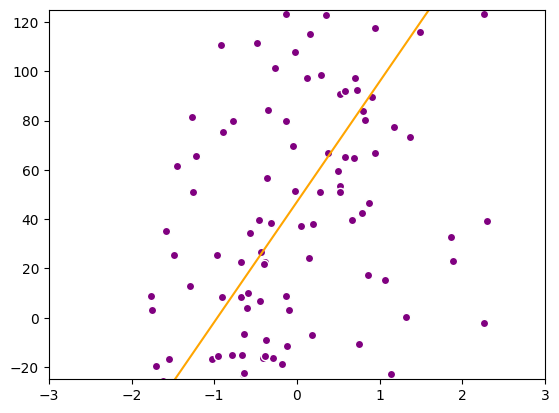

[196/200], loss: 45.01547693073746
[196/200], loss: 93.63252803049035
[196/200], loss: 211.86296667300127
[196/200], loss: 42.01508402850464
[196/200], loss: 78.25532611040941
[196/200], loss: 544.566366833973
[196/200], loss: 440.4485002115713
[196/200], loss: 58.148052057153514
[196/200], loss: 606.1999704082357
[196/200], loss: 4.436645179509667
[196/200], loss: 754.8225839705374
[196/200], loss: 28.808440320306687
[196/200], loss: 190.69914666360748
[196/200], loss: 19.784330408228094
[196/200], loss: 225.41716573272475
[196/200], loss: 1.6883886747161274
[196/200], loss: 399.3671544883544
[196/200], loss: 164.74518833830783
[196/200], loss: 0.8571024024094271
[196/200], loss: 17.706603673499295
[196/200], loss: 700.583621568247
[196/200], loss: 0.9364279971122407
[196/200], loss: 263.58134558718683
[196/200], loss: 176.60273757628482
[196/200], loss: 385.5120946754591
[196/200], loss: 421.5481664049134
[196/200], loss: 279.0890456935171
[196/200], loss: 9.898317359182498
[196/200]

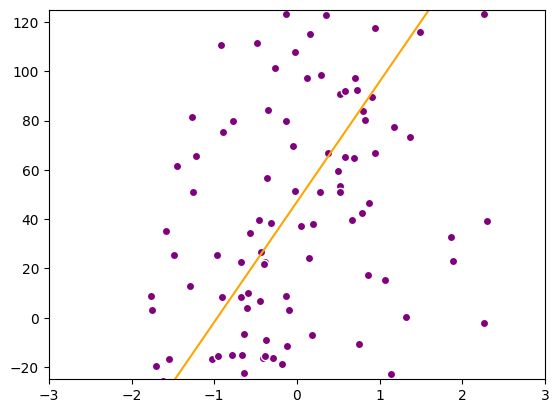

[197/200], loss: 45.01547693073692
[197/200], loss: 93.63252803049035
[197/200], loss: 211.86296667300127
[197/200], loss: 42.01508402850464
[197/200], loss: 78.25532611040923
[197/200], loss: 544.5663668339728
[197/200], loss: 440.44850021157106
[197/200], loss: 58.148052057153514
[197/200], loss: 606.1999704082357
[197/200], loss: 4.4366451795096244
[197/200], loss: 754.8225839705368
[197/200], loss: 28.808440320306797
[197/200], loss: 190.69914666360734
[197/200], loss: 19.784330408228094
[197/200], loss: 225.41716573272475
[197/200], loss: 1.6883886747161012
[197/200], loss: 399.36715448835423
[197/200], loss: 164.74518833830783
[197/200], loss: 0.8571024024094271
[197/200], loss: 17.706603673499295
[197/200], loss: 700.5836215682465
[197/200], loss: 0.9364279971122407
[197/200], loss: 263.58134558718683
[197/200], loss: 176.60273757628497
[197/200], loss: 385.5120946754591
[197/200], loss: 421.5481664049134
[197/200], loss: 279.08904569351677
[197/200], loss: 9.898317359182514
[19

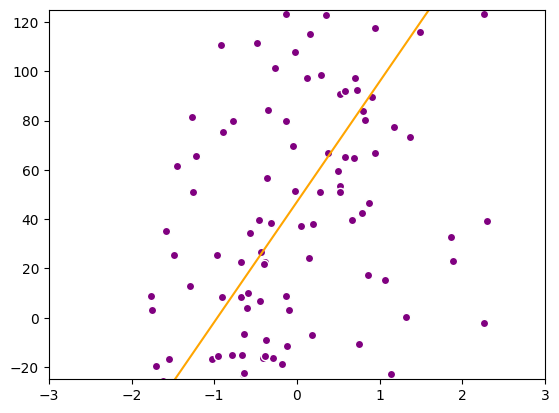

[198/200], loss: 45.01547693073746
[198/200], loss: 93.63252803049035
[198/200], loss: 211.86296667300127
[198/200], loss: 42.01508402850464
[198/200], loss: 78.25532611040941
[198/200], loss: 544.566366833973
[198/200], loss: 440.4485002115713
[198/200], loss: 58.148052057153514
[198/200], loss: 606.1999704082357
[198/200], loss: 4.436645179509667
[198/200], loss: 754.8225839705374
[198/200], loss: 28.808440320306687
[198/200], loss: 190.69914666360748
[198/200], loss: 19.784330408228094
[198/200], loss: 225.41716573272475
[198/200], loss: 1.6883886747161274
[198/200], loss: 399.3671544883544
[198/200], loss: 164.74518833830783
[198/200], loss: 0.8571024024094271
[198/200], loss: 17.706603673499295
[198/200], loss: 700.583621568247
[198/200], loss: 0.9364279971122407
[198/200], loss: 263.58134558718683
[198/200], loss: 176.60273757628482
[198/200], loss: 385.5120946754591
[198/200], loss: 421.5481664049134
[198/200], loss: 279.0890456935171
[198/200], loss: 9.898317359182498
[198/200]

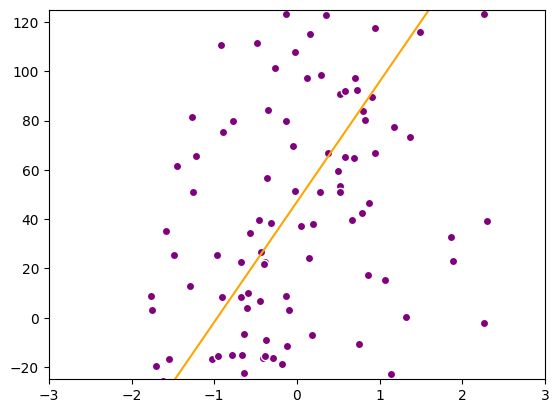

[199/200], loss: 45.01547693073692
[199/200], loss: 93.63252803049035
[199/200], loss: 211.86296667300127
[199/200], loss: 42.01508402850464
[199/200], loss: 78.25532611040923
[199/200], loss: 544.5663668339728
[199/200], loss: 440.44850021157106
[199/200], loss: 58.148052057153514
[199/200], loss: 606.1999704082357
[199/200], loss: 4.4366451795096244
[199/200], loss: 754.8225839705368
[199/200], loss: 28.808440320306797
[199/200], loss: 190.69914666360734
[199/200], loss: 19.784330408228094
[199/200], loss: 225.41716573272475
[199/200], loss: 1.6883886747161012
[199/200], loss: 399.36715448835423
[199/200], loss: 164.74518833830783
[199/200], loss: 0.8571024024094271
[199/200], loss: 17.706603673499295
[199/200], loss: 700.5836215682465
[199/200], loss: 0.9364279971122407
[199/200], loss: 263.58134558718683
[199/200], loss: 176.60273757628497
[199/200], loss: 385.5120946754591
[199/200], loss: 421.5481664049134
[199/200], loss: 279.08904569351677
[199/200], loss: 9.898317359182514
[19

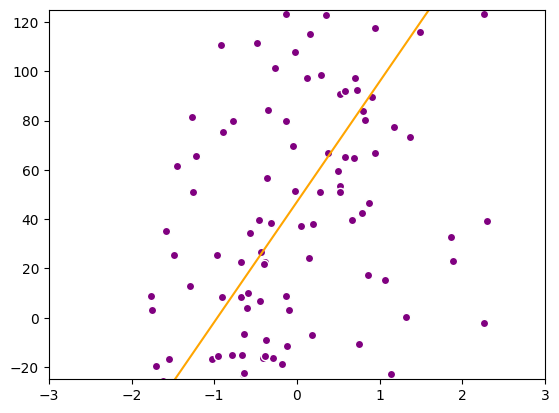

[200/200], loss: 45.01547693073746
[200/200], loss: 93.63252803049035
[200/200], loss: 211.86296667300127
[200/200], loss: 42.01508402850464
[200/200], loss: 78.25532611040941
[200/200], loss: 544.566366833973
[200/200], loss: 440.4485002115713
[200/200], loss: 58.148052057153514
[200/200], loss: 606.1999704082357
[200/200], loss: 4.436645179509667
[200/200], loss: 754.8225839705374
[200/200], loss: 28.808440320306687
[200/200], loss: 190.69914666360748
[200/200], loss: 19.784330408228094
[200/200], loss: 225.41716573272475
[200/200], loss: 1.6883886747161274
[200/200], loss: 399.3671544883544
[200/200], loss: 164.74518833830783
[200/200], loss: 0.8571024024094271
[200/200], loss: 17.706603673499295
[200/200], loss: 700.583621568247
[200/200], loss: 0.9364279971122407
[200/200], loss: 263.58134558718683
[200/200], loss: 176.60273757628482
[200/200], loss: 385.5120946754591
[200/200], loss: 421.5481664049134
[200/200], loss: 279.0890456935171
[200/200], loss: 9.898317359182498
[200/200]

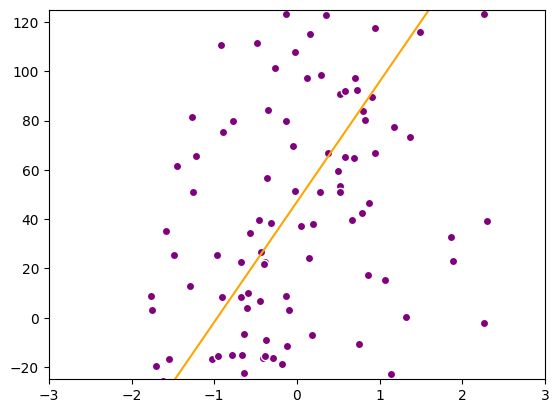

In [ ]:
# for plotting
p_x = np.linspace(-2.5, 2.5, 50)

# stochastic gradient descent
plt.ion()
for epoch in range(Epoch):
  for x, y in zip(X_train, y_train):
    # make hypothesis
    h_x = hypothesis(x, THETA)
    # compute loss
    loss = cost_function(h_x, y)
    # Excecute gradient descent to update parameters
    THETA = update_parameters(THETA, h_x, x, y, lr_sto)

    print("[{0}/{1}], loss: {2}".format(epoch+1, Epoch, loss[0]))

  plt.cla()
  plt.scatter(X_train[:, 1], y_train, c='purple', marker='o', edgecolors='white')
  plt.plot(p_x, THETA[1, 0] * p_x + THETA[0, 0], c='orange')
  plt.ylim((-25, 125))
  plt.xlim((-3, 3))
  plt.pause(0.01)
plt.ioff()
plt.show()

In [ ]:
print(THETA)

[[ 46.96419298]
 [ 48.79587969]
 [100.1452201 ]]
